In [28]:
import re
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.translate import bleu, ribes

from lazyme.fileio import find_files

In [2]:
dfs = []
for filename in sorted(find_files('Translator-HumanParityData/Evaluations', '*-EvalRound*-Subset*.csv')):
    eval_round, eval_subset = re.search(r'EvalRound(.*)-Subset(.*).csv', filename).groups()
    _df = pd.read_csv(filename)
    _df['EvalRound'] = eval_round
    _df['Subset'] = eval_subset
    dfs.append(_df)
    
meta1_df = pd.read_csv(next(find_files('Translator-HumanParityData/Evaluations', '*Meta1*')))
meta1_df['EvalRound'] = '1a-c'
meta1_df['Subset'] = '1'
    
dfs.append(meta1_df)
df = pd.concat(dfs)

In [3]:
df.head()

UserID       SystemID  SegmentID Type  Score     StartTime  \
0  zhoeng2707  Online-B-1710       1187  TGT     81  1.520540e+09   
1  zhoeng2707  Online-A-1710       1187  TGT     97  1.520540e+09   
2  zhoeng2707        Combo-5       1709  CHK     97  1.520540e+09   
3  zhoeng2707        Combo-6       1709  CHK     97  1.520540e+09   
4  zhoeng2707   Reference-PE       1187  TGT    100  1.520540e+09   

        EndTime EvalRound Subset  
0  1.520540e+09        1a      1  
1  1.520540e+09        1a      1  
2  1.520540e+09        1a      1  
3  1.520540e+09        1a      1  
4  1.520540e+09        1a      1

In [4]:
Counter(df['SystemID'])

Counter({'Combo-4': 5898,
         'Combo-5': 5702,
         'Combo-6': 5696,
         'Online-A-1710': 5656,
         'Online-B-1710': 5619,
         'Reference-HT': 5688,
         'Reference-PE': 5644,
         'Reference-WMT': 5616,
         'Sogou': 5655})

In [5]:
Counter(df[df['Score'] >= 100]['SystemID'])

Counter({'Combo-4': 50,
         'Combo-5': 51,
         'Combo-6': 60,
         'Online-A-1710': 27,
         'Online-B-1710': 16,
         'Reference-HT': 35,
         'Reference-PE': 25,
         'Reference-WMT': 37,
         'Sogou': 38})

In [9]:
X = np.array(range(101))
Y = defaultdict(list)

systems = set(df['SystemID'])
for s in systems:
    for _x in X:
        Y[s].append(Counter(df[(df['Score'] == _x)]['SystemID'])[s])

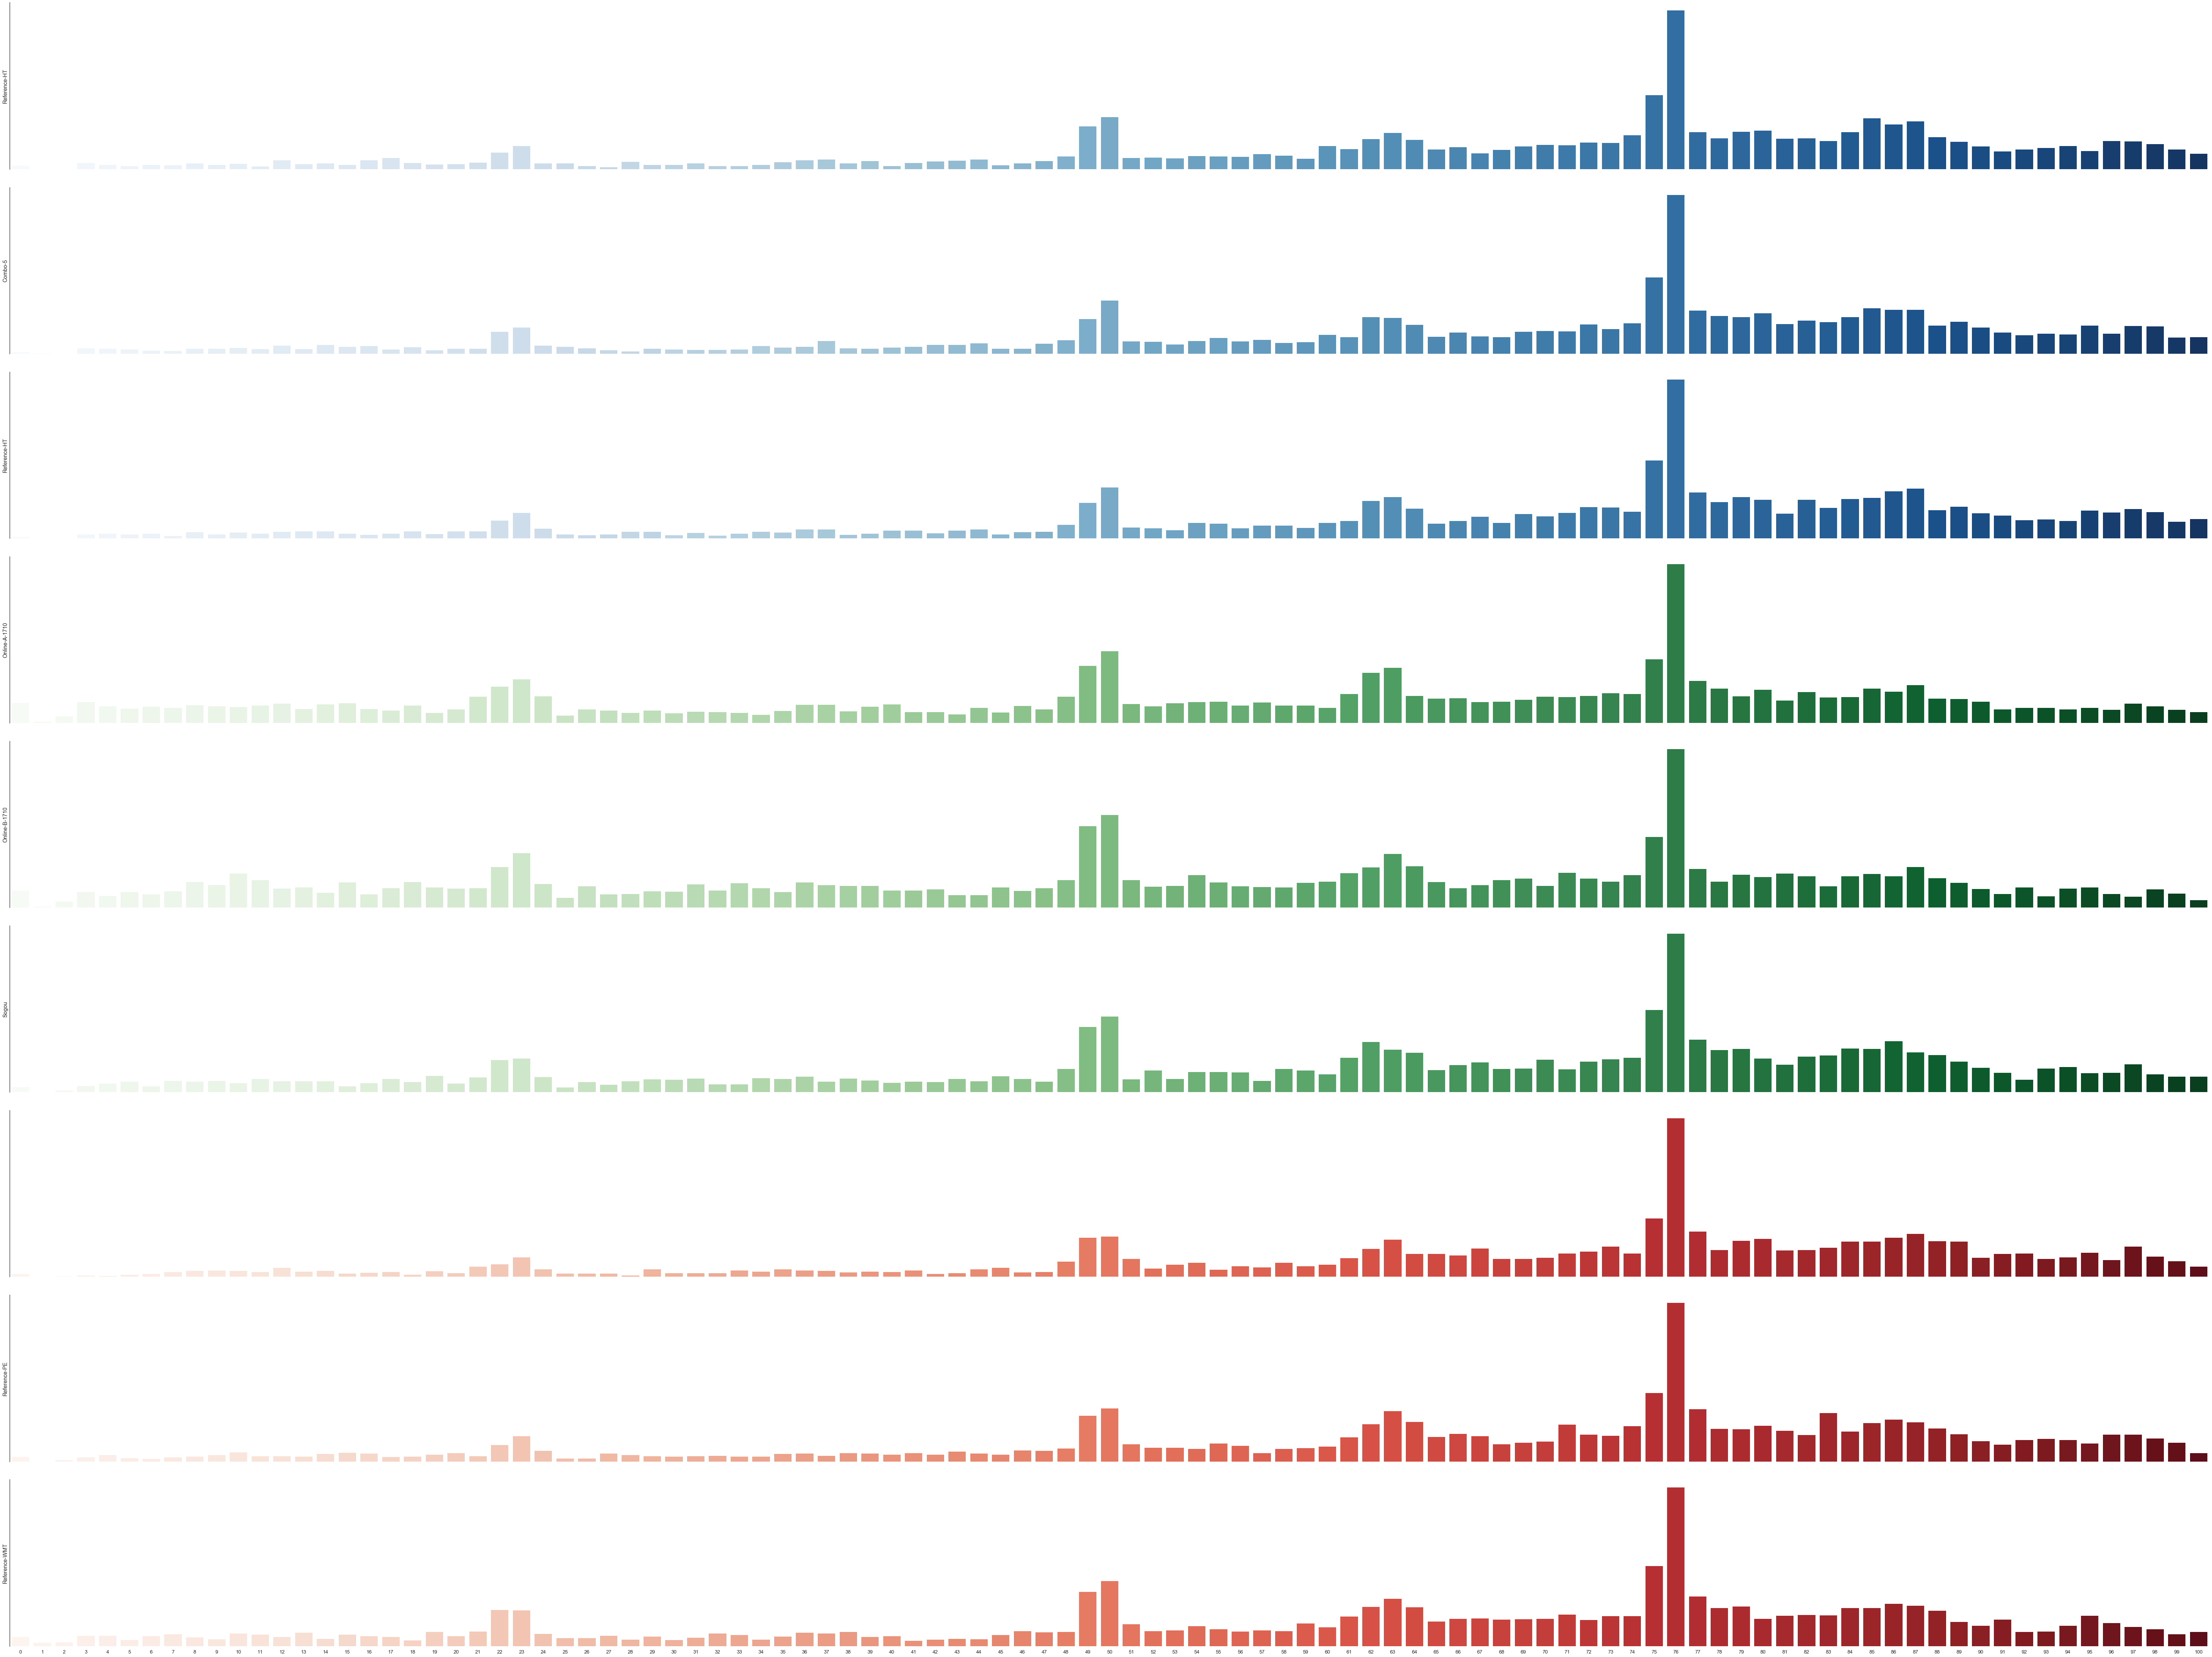

In [42]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, 1, figsize=(80, 60), sharex=True)

# Generate some sequential data
x = X
y1 = Y['Combo-4']
sns.barplot(x, y1, palette="Blues", ax=ax1)
ax1.set_ylabel("Reference-HT")

# Center the data to make it diverging
y2 = Y['Combo-5']
sns.barplot(x, y2, palette="Blues", ax=ax2)
ax2.set_ylabel("Combo-5")


# Randomly reorder the data to make it qualitative
y3 = Y['Combo-6']
sns.barplot(x, y3, palette="Blues", ax=ax3)
ax3.set_ylabel("Combo-6")


# Randomly reorder the data to make it qualitative
y4 = Y['Online-A-1710']
sns.barplot(x, y4, palette="Greens", ax=ax4)
ax4.set_ylabel('Online-A-1710')

# Randomly reorder the data to make it qualitative
y5 = Y['Online-B-1710']
sns.barplot(x, y5, palette="Greens", ax=ax5)
ax5.set_ylabel('Online-B-1710')

# Randomly reorder the data to make it qualitative
y6 = Y['Sogou']
sns.barplot(x, y6, palette="Greens", ax=ax6)
ax6.set_ylabel('Sogou')


# Randomly reorder the data to make it qualitative
y7 = Y['Reference-HT']
sns.barplot(x, y7, palette="Reds", ax=ax7)
ax3.set_ylabel("Reference-HT")


# Randomly reorder the data to make it qualitative
y8 = Y['Reference-PE']
sns.barplot(x, y8, palette="Reds", ax=ax8)
ax8.set_ylabel('Reference-PE')

# Randomly reorder the data to make it qualitative
y9 = Y['Reference-WMT']
sns.barplot(x, y9, palette="Reds", ax=ax9)
ax9.set_ylabel('Reference-WMT')


# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

In [70]:
for (segid, evalround, subset), _df in df.groupby(['SegmentID', 'EvalRound', 'Subset']):
    for systemid, _df_per_system in _df.groupby(['SystemID']):
        print(_df_per_system[['UserID', 'SegmentID', 'EvalRound', 'Subset', 'SystemID', 'Score']])

         UserID  SegmentID EvalRound Subset SystemID  Score
626  zhoeng2710          3        1a      1  Combo-4     94
719  zhoeng2711          3        1a      1  Combo-4     36
812  zhoeng2712          3        1a      1  Combo-4     92
         UserID  SegmentID EvalRound Subset SystemID  Score
627  zhoeng2710          3        1a      1  Combo-5     94
720  zhoeng2711          3        1a      1  Combo-5     36
813  zhoeng2712          3        1a      1  Combo-5     92
         UserID  SegmentID EvalRound Subset SystemID  Score
628  zhoeng2710          3        1a      1  Combo-6     94
721  zhoeng2711          3        1a      1  Combo-6     36
814  zhoeng2712          3        1a      1  Combo-6     92
         UserID  SegmentID EvalRound Subset       SystemID  Score
625  zhoeng2710          3        1a      1  Online-A-1710     80
718  zhoeng2711          3        1a      1  Online-A-1710     23
811  zhoeng2712          3        1a      1  Online-A-1710     70
         UserID 

           UserID  SegmentID EvalRound Subset SystemID  Score
4807   zhoeng2713          4      1a-c      1  Combo-4     56
4903   zhoeng2715          4      1a-c      1  Combo-4     39
4967   zhoeng2714          4      1a-c      1  Combo-4     88
7056   zhoeng2913          4      1a-c      1  Combo-4     76
7152   zhoeng2914          4      1a-c      1  Combo-4     85
7248   zhoeng2915          4      1a-c      1  Combo-4     93
13761  zhoeng2b13          4      1a-c      1  Combo-4     30
13857  zhoeng2b14          4      1a-c      1  Combo-4     82
13953  zhoeng2b15          4      1a-c      1  Combo-4    100
           UserID  SegmentID EvalRound Subset SystemID  Score
4793   zhoeng2713          4      1a-c      1  Combo-5     80
4889   zhoeng2715          4      1a-c      1  Combo-5     56
4953   zhoeng2714          4      1a-c      1  Combo-5     79
7042   zhoeng2913          4      1a-c      1  Combo-5     80
7138   zhoeng2914          4      1a-c      1  Combo-5     79
7234   z

1314  zhoeng2702         10        1a      1  Online-A-1710     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
1184  zhoeng2701         10        1a      1  Online-B-1710     63
1276  zhoeng2703         10        1a      1  Online-B-1710     63
1315  zhoeng2702         10        1a      1  Online-B-1710     64
          UserID  SegmentID EvalRound Subset      SystemID  Score
1134  zhoeng2702         10        1a      1  Reference-HT     76
1180  zhoeng2701         10        1a      1  Reference-HT     92
1226  zhoeng2701         10        1a      1  Reference-HT     70
1272  zhoeng2703         10        1a      1  Reference-HT     65
1311  zhoeng2702         10        1a      1  Reference-HT     76
1355  zhoeng2703         10        1a      1  Reference-HT     67
          UserID  SegmentID EvalRound Subset      SystemID  Score
1185  zhoeng2701         10        1a      1  Reference-PE     63
1277  zhoeng2703         10        1a      1  Reference-PE     63
1316 

1482  zhoeng2c12         11        2c      4  Reference-HT     69
          UserID  SegmentID EvalRound Subset      SystemID  Score
1300  zhoeng2c11         11        2c      4  Reference-PE     50
1390  zhoeng2c10         11        2c      4  Reference-PE     82
1480  zhoeng2c12         11        2c      4  Reference-PE     74
          UserID  SegmentID EvalRound Subset       SystemID  Score
1294  zhoeng2c11         11        2c      4  Reference-WMT     50
1384  zhoeng2c10         11        2c      4  Reference-WMT     91
1474  zhoeng2c12         11        2c      4  Reference-WMT     65
          UserID  SegmentID EvalRound Subset SystemID  Score
1303  zhoeng2c11         11        2c      4    Sogou     89
1393  zhoeng2c10         11        2c      4    Sogou     96
1483  zhoeng2c12         11        2c      4    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
5445  zhoeng2c11         14        2c      4  Combo-4     98
5540  zhoeng2c10         14        2

3250  zhoeng2914         18        1b      1  Combo-5     84
          UserID  SegmentID EvalRound Subset SystemID  Score
3131  zhoeng2915         18        1b      1  Combo-6     29
3161  zhoeng2913         18        1b      1  Combo-6     71
3251  zhoeng2914         18        1b      1  Combo-6     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
3125  zhoeng2915         18        1b      1  Online-A-1710      8
3155  zhoeng2913         18        1b      1  Online-A-1710     19
3245  zhoeng2914         18        1b      1  Online-A-1710      3
          UserID  SegmentID EvalRound Subset       SystemID  Score
3127  zhoeng2915         18        1b      1  Online-B-1710     60
3157  zhoeng2913         18        1b      1  Online-B-1710     50
3204  zhoeng2913         18        1b      1  Online-B-1710     56
3247  zhoeng2914         18        1b      1  Online-B-1710     80
3294  zhoeng2914         18        1b      1  Online-B-1710     79
3326  zhoeng2915         

5550  zhoeng2815         25        2a      2  Reference-HT     87
          UserID  SegmentID EvalRound Subset      SystemID  Score
5294  zhoeng2813         25        2a      2  Reference-PE     39
5347  zhoeng2813         25        2a      2  Reference-PE     29
5378  zhoeng2814         25        2a      2  Reference-PE      4
5431  zhoeng2814         25        2a      2  Reference-PE     23
5479  zhoeng2815         25        2a      2  Reference-PE     51
5549  zhoeng2815         25        2a      2  Reference-PE     81
          UserID  SegmentID EvalRound Subset       SystemID  Score
5351  zhoeng2813         25        2a      2  Reference-WMT     53
5435  zhoeng2814         25        2a      2  Reference-WMT     49
5553  zhoeng2815         25        2a      2  Reference-WMT     39
          UserID  SegmentID EvalRound Subset SystemID  Score
5352  zhoeng2813         25        2a      2    Sogou     53
5436  zhoeng2814         25        2a      2    Sogou     57
5554  zhoeng2815     

          UserID  SegmentID EvalRound Subset SystemID  Score
3424  zhoeng2802         46        2a      2  Combo-5     62
3510  zhoeng2801         46        2a      2  Combo-5     68
3596  zhoeng2803         46        2a      2  Combo-5     66
          UserID  SegmentID EvalRound Subset SystemID  Score
3425  zhoeng2802         46        2a      2  Combo-6     62
3511  zhoeng2801         46        2a      2  Combo-6     68
3597  zhoeng2803         46        2a      2  Combo-6     66
          UserID  SegmentID EvalRound Subset       SystemID  Score
3436  zhoeng2802         46        2a      2  Online-A-1710     62
3522  zhoeng2801         46        2a      2  Online-A-1710     66
3608  zhoeng2803         46        2a      2  Online-A-1710     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
3430  zhoeng2802         46        2a      2  Online-B-1710     76
3516  zhoeng2801         46        2a      2  Online-B-1710     75
3602  zhoeng2803         46        2a      

          UserID  SegmentID EvalRound Subset      SystemID  Score
3619  zhoeng2b10         52        1c      1  Reference-PE     76
3712  zhoeng2b12         52        1c      1  Reference-PE     68
3805  zhoeng2b11         52        1c      1  Reference-PE     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
3621  zhoeng2b10         52        1c      1  Reference-WMT     82
3714  zhoeng2b12         52        1c      1  Reference-WMT     66
3807  zhoeng2b11         52        1c      1  Reference-WMT     28
          UserID  SegmentID EvalRound Subset SystemID  Score
3710  zhoeng2b10         52        1c      1    Sogou     83
3803  zhoeng2b12         52        1c      1    Sogou     75
3896  zhoeng2b11         52        1c      1    Sogou     86
          UserID  SegmentID EvalRound Subset SystemID  Score
4994  zhoeng2a14         55        2b      3  Combo-4     56
5082  zhoeng2a15         55        2b      3  Combo-4     95
5170  zhoeng2a13         55        2b    

12542  zhoeng2b15         78      1a-c      1  Online-B-1710     32
           UserID  SegmentID EvalRound Subset      SystemID  Score
3399   zhoeng2715         78      1a-c      1  Reference-HT     76
3462   zhoeng2713         78      1a-c      1  Reference-HT     56
3583   zhoeng2714         78      1a-c      1  Reference-HT     77
9846   zhoeng2913         78      1a-c      1  Reference-HT     66
9938   zhoeng2914         78      1a-c      1  Reference-HT     80
10030  zhoeng2915         78      1a-c      1  Reference-HT    100
12349  zhoeng2b13         78      1a-c      1  Reference-HT     57
12441  zhoeng2b14         78      1a-c      1  Reference-HT     84
12533  zhoeng2b15         78      1a-c      1  Reference-HT     99
           UserID  SegmentID EvalRound Subset      SystemID  Score
3405   zhoeng2715         78      1a-c      1  Reference-PE     54
3468   zhoeng2713         78      1a-c      1  Reference-PE     45
3589   zhoeng2714         78      1a-c      1  Reference-PE  

4716  zhoeng2803         80        2a      2  Online-B-1710     70
          UserID  SegmentID EvalRound Subset      SystemID  Score
4531  zhoeng2802         80        2a      2  Reference-HT     76
4624  zhoeng2801         80        2a      2  Reference-HT     79
4717  zhoeng2803         80        2a      2  Reference-HT     86
          UserID  SegmentID EvalRound Subset      SystemID  Score
4528  zhoeng2802         80        2a      2  Reference-PE     65
4621  zhoeng2801         80        2a      2  Reference-PE     69
4714  zhoeng2803         80        2a      2  Reference-PE     56
          UserID  SegmentID EvalRound Subset       SystemID  Score
4545  zhoeng2802         80        2a      2  Reference-WMT     37
4638  zhoeng2801         80        2a      2  Reference-WMT     51
4731  zhoeng2803         80        2a      2  Reference-WMT     43
          UserID  SegmentID EvalRound Subset SystemID  Score
4500  zhoeng2802         80        2a      2    Sogou     76
4537  zhoeng280

           UserID  SegmentID EvalRound Subset      SystemID  Score
65     zhoeng2707        101      1a-c      1  Reference-HT     79
158    zhoeng2709        101      1a-c      1  Reference-HT      5
251    zhoeng2708        101      1a-c      1  Reference-HT     34
6548   zhoeng2909        101      1a-c      1  Reference-HT     20
6641   zhoeng2908        101      1a-c      1  Reference-HT     40
6692   zhoeng2907        101      1a-c      1  Reference-HT     80
16030  zhoeng2b07        101      1a-c      1  Reference-HT     20
16123  zhoeng2b09        101      1a-c      1  Reference-HT     12
16216  zhoeng2b08        101      1a-c      1  Reference-HT     45
           UserID  SegmentID EvalRound Subset      SystemID  Score
74     zhoeng2707        101      1a-c      1  Reference-PE     93
167    zhoeng2709        101      1a-c      1  Reference-PE     77
265    zhoeng2708        101      1a-c      1  Reference-PE     83
6464   zhoeng2907        101      1a-c      1  Reference-PE   

5522  zhoeng2911        103        1b      1  Combo-5     37
          UserID  SegmentID EvalRound Subset SystemID  Score
5346  zhoeng2910        103        1b      1  Combo-6     98
5435  zhoeng2912        103        1b      1  Combo-6     81
5524  zhoeng2911        103        1b      1  Combo-6     95
          UserID  SegmentID EvalRound Subset       SystemID  Score
5342  zhoeng2910        103        1b      1  Online-A-1710     98
5431  zhoeng2912        103        1b      1  Online-A-1710     86
5520  zhoeng2911        103        1b      1  Online-A-1710     22
          UserID  SegmentID EvalRound Subset       SystemID  Score
5338  zhoeng2910        103        1b      1  Online-B-1710     75
5427  zhoeng2912        103        1b      1  Online-B-1710     60
5516  zhoeng2911        103        1b      1  Online-B-1710     36
          UserID  SegmentID EvalRound Subset      SystemID  Score
5345  zhoeng2910        103        1b      1  Reference-HT     99
5434  zhoeng2912        103

2486  zhoeng2915        104        1b      1  Reference-WMT     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2305  zhoeng2913        104        1b      1    Sogou     12
2401  zhoeng2914        104        1b      1    Sogou      3
2497  zhoeng2915        104        1b      1    Sogou     19
          UserID  SegmentID EvalRound Subset SystemID  Score
3949  zhoeng2b14        104        1c      1  Combo-4      6
4045  zhoeng2b13        104        1c      1  Combo-4     21
4141  zhoeng2b15        104        1c      1  Combo-4     12
          UserID  SegmentID EvalRound Subset SystemID  Score
3950  zhoeng2b14        104        1c      1  Combo-5      6
4046  zhoeng2b13        104        1c      1  Combo-5     21
4142  zhoeng2b15        104        1c      1  Combo-5     12
          UserID  SegmentID EvalRound Subset SystemID  Score
3951  zhoeng2b14        104        1c      1  Combo-6      6
4047  zhoeng2b13        104        1c      1  Combo-6     21
4143  zhoeng2b15  

          UserID  SegmentID EvalRound Subset      SystemID  Score
2854  zhoeng2707        117        1a      1  Reference-HT     77
2950  zhoeng2709        117        1a      1  Reference-HT     31
3047  zhoeng2708        117        1a      1  Reference-HT     69
          UserID  SegmentID EvalRound Subset      SystemID  Score
2856  zhoeng2707        117        1a      1  Reference-PE     93
2952  zhoeng2709        117        1a      1  Reference-PE     20
3049  zhoeng2708        117        1a      1  Reference-PE     85
          UserID  SegmentID EvalRound Subset       SystemID  Score
2853  zhoeng2707        117        1a      1  Reference-WMT     76
2949  zhoeng2709        117        1a      1  Reference-WMT     19
3046  zhoeng2708        117        1a      1  Reference-WMT     86
          UserID  SegmentID EvalRound Subset SystemID  Score
2848  zhoeng2707        117        1a      1    Sogou     97
2944  zhoeng2709        117        1a      1    Sogou    100
3041  zhoeng2708     

637  zhoeng2a08        121        2b      3  Combo-6     87
         UserID  SegmentID EvalRound Subset       SystemID  Score
337  zhoeng2a07        121        2b      3  Online-A-1710     76
433  zhoeng2a16        121        2b      3  Online-A-1710     89
529  zhoeng2a09        121        2b      3  Online-A-1710     58
636  zhoeng2a08        121        2b      3  Online-A-1710     92
         UserID  SegmentID EvalRound Subset       SystemID  Score
335  zhoeng2a07        121        2b      3  Online-B-1710     55
431  zhoeng2a16        121        2b      3  Online-B-1710     71
527  zhoeng2a09        121        2b      3  Online-B-1710     23
634  zhoeng2a08        121        2b      3  Online-B-1710     87
         UserID  SegmentID EvalRound Subset      SystemID  Score
339  zhoeng2a07        121        2b      3  Reference-HT     50
435  zhoeng2a16        121        2b      3  Reference-HT     86
531  zhoeng2a09        121        2b      3  Reference-HT     10
638  zhoeng2a08     

756  zhoeng2906        128        1b      1  Reference-WMT     23
          UserID  SegmentID EvalRound Subset SystemID  Score
2611  zhoeng2901        128        1b      1    Sogou     48
2694  zhoeng2903        128        1b      1    Sogou     17
2795  zhoeng2902        128        1b      1    Sogou     63
          UserID  SegmentID EvalRound Subset SystemID  Score
4226  zhoeng2b01        128        1c      1  Combo-4     71
4269  zhoeng2b01        128        1c      1  Combo-4     65
4318  zhoeng2b03        128        1c      1  Combo-4     55
4361  zhoeng2b03        128        1c      1  Combo-4     58
4410  zhoeng2b02        128        1c      1  Combo-4     50
4453  zhoeng2b02        128        1c      1  Combo-4     50
          UserID  SegmentID EvalRound Subset SystemID  Score
4227  zhoeng2b01        128        1c      1  Combo-5     71
4270  zhoeng2b01        128        1c      1  Combo-5     65
4319  zhoeng2b03        128        1c      1  Combo-5     55
4362  zhoeng2b03   

2493  zhoeng2b11        130        1c      1  Combo-5     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2316  zhoeng2b10        130        1c      1  Combo-6     91
2405  zhoeng2b12        130        1c      1  Combo-6     72
2494  zhoeng2b11        130        1c      1  Combo-6     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
2311  zhoeng2b10        130        1c      1  Online-A-1710     90
2400  zhoeng2b12        130        1c      1  Online-A-1710     73
2489  zhoeng2b11        130        1c      1  Online-A-1710     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
2310  zhoeng2b10        130        1c      1  Online-B-1710     94
2399  zhoeng2b12        130        1c      1  Online-B-1710     76
2488  zhoeng2b11        130        1c      1  Online-B-1710     90
          UserID  SegmentID EvalRound Subset      SystemID  Score
2321  zhoeng2b10        130        1c      1  Reference-HT     99
2410  zhoeng2b12        130

1253  zhoeng2a08        145        2b      3  Online-B-1710     49
          UserID  SegmentID EvalRound Subset      SystemID  Score
985   zhoeng2a07        145        2b      3  Reference-HT     64
1051  zhoeng2a16        145        2b      3  Reference-HT     82
1146  zhoeng2a09        145        2b      3  Reference-HT     52
1241  zhoeng2a08        145        2b      3  Reference-HT     86
          UserID  SegmentID EvalRound Subset      SystemID  Score
982   zhoeng2a07        145        2b      3  Reference-PE     74
1048  zhoeng2a16        145        2b      3  Reference-PE     86
1143  zhoeng2a09        145        2b      3  Reference-PE     86
1238  zhoeng2a08        145        2b      3  Reference-PE     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
989   zhoeng2a07        145        2b      3  Reference-WMT     67
1055  zhoeng2a16        145        2b      3  Reference-WMT     86
1150  zhoeng2a09        145        2b      3  Reference-WMT     76
1245 

15361  zhoeng2b15        153      1a-c      1  Reference-PE     58
           UserID  SegmentID EvalRound Subset       SystemID  Score
847    zhoeng2714        153      1a-c      1  Reference-WMT     81
973    zhoeng2713        153      1a-c      1  Reference-WMT     89
1071   zhoeng2715        153      1a-c      1  Reference-WMT     40
7917   zhoeng2913        153      1a-c      1  Reference-WMT     73
8013   zhoeng2914        153      1a-c      1  Reference-WMT     79
8109   zhoeng2915        153      1a-c      1  Reference-WMT     97
15168  zhoeng2b14        153      1a-c      1  Reference-WMT     82
15264  zhoeng2b13        153      1a-c      1  Reference-WMT     54
15360  zhoeng2b15        153      1a-c      1  Reference-WMT     86
           UserID  SegmentID EvalRound Subset SystemID  Score
838    zhoeng2714        153      1a-c      1    Sogou     85
964    zhoeng2713        153      1a-c      1    Sogou     55
1062   zhoeng2715        153      1a-c      1    Sogou     71
7908 

3858  zhoeng2703        160        1a      1  Combo-6     55
          UserID  SegmentID EvalRound Subset       SystemID  Score
3667  zhoeng2702        160        1a      1  Online-A-1710     76
3711  zhoeng2702        160        1a      1  Online-A-1710     76
3790  zhoeng2701        160        1a      1  Online-A-1710     76
3834  zhoeng2701        160        1a      1  Online-A-1710     85
3857  zhoeng2703        160        1a      1  Online-A-1710     56
3901  zhoeng2703        160        1a      1  Online-A-1710     59
          UserID  SegmentID EvalRound Subset       SystemID  Score
3660  zhoeng2702        160        1a      1  Online-B-1710     61
3783  zhoeng2701        160        1a      1  Online-B-1710     59
3850  zhoeng2703        160        1a      1  Online-B-1710     47
          UserID  SegmentID EvalRound Subset      SystemID  Score
3664  zhoeng2702        160        1a      1  Reference-HT     64
3787  zhoeng2701        160        1a      1  Reference-HT     62
3854

5960  zhoeng2a13        164        2b      3  Combo-5     56
          UserID  SegmentID EvalRound Subset SystemID  Score
5779  zhoeng2a14        164        2b      3  Combo-6     79
5871  zhoeng2a15        164        2b      3  Combo-6     94
5963  zhoeng2a13        164        2b      3  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
5775  zhoeng2a14        164        2b      3  Online-A-1710     43
5867  zhoeng2a15        164        2b      3  Online-A-1710     45
5959  zhoeng2a13        164        2b      3  Online-A-1710     47
          UserID  SegmentID EvalRound Subset       SystemID  Score
5728  zhoeng2a14        164        2b      3  Online-B-1710     41
5774  zhoeng2a14        164        2b      3  Online-B-1710     18
5820  zhoeng2a15        164        2b      3  Online-B-1710     81
5866  zhoeng2a15        164        2b      3  Online-B-1710     97
5912  zhoeng2a13        164        2b      3  Online-B-1710     30
5958  zhoeng2a13        1

          UserID  SegmentID EvalRound Subset       SystemID  Score
1703  zhoeng2901        171        1b      1  Online-A-1710     77
1794  zhoeng2903        171        1b      1  Online-A-1710     69
1885  zhoeng2902        171        1b      1  Online-A-1710     65
          UserID  SegmentID EvalRound Subset       SystemID  Score
1697  zhoeng2901        171        1b      1  Online-B-1710     79
1788  zhoeng2903        171        1b      1  Online-B-1710     65
1862  zhoeng2902        171        1b      1  Online-B-1710     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
1704  zhoeng2901        171        1b      1  Reference-HT     67
1795  zhoeng2903        171        1b      1  Reference-HT     44
1886  zhoeng2902        171        1b      1  Reference-HT     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
1701  zhoeng2901        171        1b      1  Reference-PE     74
1792  zhoeng2903        171        1b      1  Reference-PE     41
18

          UserID  SegmentID EvalRound Subset SystemID  Score
4517  zhoeng2b05        172        1c      1  Combo-5     71
4619  zhoeng2b04        172        1c      1  Combo-5     82
4730  zhoeng2b06        172        1c      1  Combo-5     23
          UserID  SegmentID EvalRound Subset SystemID  Score
4470  zhoeng2b05        172        1c      1  Combo-6     85
4515  zhoeng2b05        172        1c      1  Combo-6     84
4572  zhoeng2b04        172        1c      1  Combo-6     79
4617  zhoeng2b04        172        1c      1  Combo-6     88
4683  zhoeng2b06        172        1c      1  Combo-6     23
4728  zhoeng2b06        172        1c      1  Combo-6     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
4513  zhoeng2b05        172        1c      1  Online-A-1710     82
4615  zhoeng2b04        172        1c      1  Online-A-1710     90
4726  zhoeng2b06        172        1c      1  Online-A-1710     50
          UserID  SegmentID EvalRound Subset       SystemID  

4955  zhoeng2804        178        2a      2  Reference-WMT     88
          UserID  SegmentID EvalRound Subset SystemID  Score
4809  zhoeng2806        178        2a      2    Sogou     99
4848  zhoeng2805        178        2a      2    Sogou     88
4951  zhoeng2804        178        2a      2    Sogou     24
          UserID  SegmentID EvalRound Subset SystemID  Score
4797  zhoeng2713        179        1a      1  Combo-4     75
4893  zhoeng2715        179        1a      1  Combo-4     80
4957  zhoeng2714        179        1a      1  Combo-4     80
          UserID  SegmentID EvalRound Subset SystemID  Score
4791  zhoeng2713        179        1a      1  Combo-5     46
4846  zhoeng2713        179        1a      1  Combo-5     55
4887  zhoeng2715        179        1a      1  Combo-5     86
4951  zhoeng2714        179        1a      1  Combo-5     78
5006  zhoeng2714        179        1a      1  Combo-5     80
5038  zhoeng2715        179        1a      1  Combo-5     88
          UserID  

1951  zhoeng2a08        180        2b      3  Reference-WMT     89
          UserID  SegmentID EvalRound Subset SystemID  Score
1645  zhoeng2a07        180        2b      3    Sogou     69
1715  zhoeng2a16        180        2b      3    Sogou     88
1819  zhoeng2a09        180        2b      3    Sogou     85
1906  zhoeng2a08        180        2b      3    Sogou     85
         UserID  SegmentID EvalRound Subset SystemID  Score
276  zhoeng2a07        181        2b      3  Combo-4     78
372  zhoeng2a16        181        2b      3  Combo-4     87
468  zhoeng2a09        181        2b      3  Combo-4     97
564  zhoeng2a08        181        2b      3  Combo-4     87
         UserID  SegmentID EvalRound Subset SystemID  Score
277  zhoeng2a07        181        2b      3  Combo-5     78
373  zhoeng2a16        181        2b      3  Combo-5     87
469  zhoeng2a09        181        2b      3  Combo-5     97
565  zhoeng2a08        181        2b      3  Combo-5     87
         UserID  SegmentID E

3182  zhoeng2c13        192        2c      4  Combo-4     31
          UserID  SegmentID EvalRound Subset SystemID  Score
3031  zhoeng2c14        192        2c      4  Combo-5     75
3109  zhoeng2c15        192        2c      4  Combo-5     97
3173  zhoeng2c13        192        2c      4  Combo-5     31
          UserID  SegmentID EvalRound Subset SystemID  Score
3041  zhoeng2c14        192        2c      4  Combo-6     70
3119  zhoeng2c15        192        2c      4  Combo-6     99
3183  zhoeng2c13        192        2c      4  Combo-6     31
          UserID  SegmentID EvalRound Subset       SystemID  Score
3030  zhoeng2c14        192        2c      4  Online-A-1710     70
3108  zhoeng2c15        192        2c      4  Online-A-1710     47
3172  zhoeng2c13        192        2c      4  Online-A-1710     11
          UserID  SegmentID EvalRound Subset       SystemID  Score
3043  zhoeng2c14        192        2c      4  Online-B-1710      5
3121  zhoeng2c15        192        2c      4  Onl

3071  zhoeng2b02        196        1c      1    Sogou     61
         UserID  SegmentID EvalRound Subset SystemID  Score
46   zhoeng2802        198        2a      2  Combo-4     63
138  zhoeng2801        198        2a      2  Combo-4     73
231  zhoeng2803        198        2a      2  Combo-4     67
         UserID  SegmentID EvalRound Subset SystemID  Score
47   zhoeng2802        198        2a      2  Combo-5     63
139  zhoeng2801        198        2a      2  Combo-5     73
232  zhoeng2803        198        2a      2  Combo-5     67
         UserID  SegmentID EvalRound Subset SystemID  Score
52   zhoeng2802        198        2a      2  Combo-6     63
144  zhoeng2801        198        2a      2  Combo-6     74
237  zhoeng2803        198        2a      2  Combo-6     59
         UserID  SegmentID EvalRound Subset       SystemID  Score
7    zhoeng2802        198        2a      2  Online-A-1710     76
51   zhoeng2802        198        2a      2  Online-A-1710     65
99   zhoeng2801      

3912  zhoeng2808        215        2a      2  Combo-5     84
          UserID  SegmentID EvalRound Subset SystemID  Score
3698  zhoeng2807        215        2a      2  Combo-6     12
3799  zhoeng2809        215        2a      2  Combo-6     76
3913  zhoeng2808        215        2a      2  Combo-6     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
3701  zhoeng2807        215        2a      2  Online-A-1710     32
3802  zhoeng2809        215        2a      2  Online-A-1710     55
3916  zhoeng2808        215        2a      2  Online-A-1710     57
          UserID  SegmentID EvalRound Subset       SystemID  Score
1756  zhoeng2805        215        2a      2  Online-B-1710     50
1885  zhoeng2806        215        2a      2  Online-B-1710     76
1942  zhoeng2804        215        2a      2  Online-B-1710      7
          UserID  SegmentID EvalRound Subset      SystemID  Score
1755  zhoeng2805        215        2a      2  Reference-HT     49
1884  zhoeng2806        215

1947  zhoeng2902        223        1b      1  Combo-4     62
          UserID  SegmentID EvalRound Subset SystemID  Score
1766  zhoeng2901        223        1b      1  Combo-5     76
1840  zhoeng2903        223        1b      1  Combo-5     52
1948  zhoeng2902        223        1b      1  Combo-5     62
          UserID  SegmentID EvalRound Subset SystemID  Score
1767  zhoeng2901        223        1b      1  Combo-6     76
1841  zhoeng2903        223        1b      1  Combo-6     52
1949  zhoeng2902        223        1b      1  Combo-6     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
1762  zhoeng2901        223        1b      1  Online-A-1710     85
1836  zhoeng2903        223        1b      1  Online-A-1710     70
1944  zhoeng2902        223        1b      1  Online-A-1710     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
1761  zhoeng2901        223        1b      1  Online-B-1710     66
1835  zhoeng2903        223        1b      1  Onl

12517  zhoeng2b15        227      1a-c      1  Combo-4     97
           UserID  SegmentID EvalRound Subset SystemID  Score
3384   zhoeng2715        227      1a-c      1  Combo-5     84
3447   zhoeng2713        227      1a-c      1  Combo-5     81
3568   zhoeng2714        227      1a-c      1  Combo-5     53
9831   zhoeng2913        227      1a-c      1  Combo-5     51
9923   zhoeng2914        227      1a-c      1  Combo-5     41
10015  zhoeng2915        227      1a-c      1  Combo-5     91
12334  zhoeng2b13        227      1a-c      1  Combo-5     55
12426  zhoeng2b14        227      1a-c      1  Combo-5     74
12518  zhoeng2b15        227      1a-c      1  Combo-5     97
           UserID  SegmentID EvalRound Subset SystemID  Score
3385   zhoeng2715        227      1a-c      1  Combo-6     84
3448   zhoeng2713        227      1a-c      1  Combo-6     81
3569   zhoeng2714        227      1a-c      1  Combo-6     53
9832   zhoeng2913        227      1a-c      1  Combo-6     51
9924   z

15382  zhoeng2b15        228      1a-c      1    Sogou     95
          UserID  SegmentID EvalRound Subset SystemID  Score
2339  zhoeng2913        228        1b      1  Combo-4     75
2435  zhoeng2914        228        1b      1  Combo-4     84
2531  zhoeng2915        228        1b      1  Combo-4     72
          UserID  SegmentID EvalRound Subset SystemID  Score
2340  zhoeng2913        228        1b      1  Combo-5     75
2436  zhoeng2914        228        1b      1  Combo-5     84
2532  zhoeng2915        228        1b      1  Combo-5     72
          UserID  SegmentID EvalRound Subset SystemID  Score
2341  zhoeng2913        228        1b      1  Combo-6     75
2437  zhoeng2914        228        1b      1  Combo-6     84
2533  zhoeng2915        228        1b      1  Combo-6     72
          UserID  SegmentID EvalRound Subset       SystemID  Score
2291  zhoeng2913        228        1b      1  Online-A-1710     35
2342  zhoeng2913        228        1b      1  Online-A-1710     35
2387 

5569  zhoeng2815        242        2a      2  Combo-4     39
          UserID  SegmentID EvalRound Subset SystemID  Score
5452  zhoeng2814        242        2a      2  Combo-5     73
5535  zhoeng2813        242        2a      2  Combo-5     47
5570  zhoeng2815        242        2a      2  Combo-5     39
          UserID  SegmentID EvalRound Subset SystemID  Score
5453  zhoeng2814        242        2a      2  Combo-6     73
5536  zhoeng2813        242        2a      2  Combo-6     47
5571  zhoeng2815        242        2a      2  Combo-6     39
          UserID  SegmentID EvalRound Subset       SystemID  Score
5456  zhoeng2814        242        2a      2  Online-A-1710      3
5539  zhoeng2813        242        2a      2  Online-A-1710     34
5574  zhoeng2815        242        2a      2  Online-A-1710     17
          UserID  SegmentID EvalRound Subset       SystemID  Score
5454  zhoeng2814        242        2a      2  Online-B-1710     69
5537  zhoeng2813        242        2a      2  Onl

           UserID  SegmentID EvalRound Subset SystemID  Score
2068   zhoeng2713        251      1a-c      1  Combo-4     85
2155   zhoeng2714        251      1a-c      1  Combo-4     84
2248   zhoeng2715        251      1a-c      1  Combo-4     78
8749   zhoeng2915        251      1a-c      1  Combo-4     83
8779   zhoeng2913        251      1a-c      1  Combo-4     70
8869   zhoeng2914        251      1a-c      1  Combo-4     81
16557  zhoeng2b14        251      1a-c      1  Combo-4     79
16647  zhoeng2b13        251      1a-c      1  Combo-4     19
16737  zhoeng2b15        251      1a-c      1  Combo-4     90
           UserID  SegmentID EvalRound Subset SystemID  Score
2071   zhoeng2713        251      1a-c      1  Combo-5     87
2158   zhoeng2714        251      1a-c      1  Combo-5     82
2251   zhoeng2715        251      1a-c      1  Combo-5     72
8752   zhoeng2915        251      1a-c      1  Combo-5     82
8782   zhoeng2913        251      1a-c      1  Combo-5     74
8872   z

5692  zhoeng2a11        256        2b      3    Sogou     97
          UserID  SegmentID EvalRound Subset SystemID  Score
3954  zhoeng2704        263        1a      1  Combo-4     84
4049  zhoeng2705        263        1a      1  Combo-4     85
4144  zhoeng2706        263        1a      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3955  zhoeng2704        263        1a      1  Combo-5     84
4050  zhoeng2705        263        1a      1  Combo-5     85
4145  zhoeng2706        263        1a      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3961  zhoeng2704        263        1a      1  Combo-6     60
4056  zhoeng2705        263        1a      1  Combo-6     76
4151  zhoeng2706        263        1a      1  Combo-6     75
          UserID  SegmentID EvalRound Subset       SystemID  Score
3958  zhoeng2704        263        1a      1  Online-A-1710     71
4005  zhoeng2704        263        1a      1  Online-A-1710     45
4053  

264  zhoeng2708        271        1a      1    Sogou     90
           UserID  SegmentID EvalRound Subset SystemID  Score
83     zhoeng2707        271      1a-c      1  Combo-4    100
176    zhoeng2709        271      1a-c      1  Combo-4     73
274    zhoeng2708        271      1a-c      1  Combo-4     85
6473   zhoeng2907        271      1a-c      1  Combo-4     92
6566   zhoeng2909        271      1a-c      1  Combo-4     56
6659   zhoeng2908        271      1a-c      1  Combo-4     86
16048  zhoeng2b07        271      1a-c      1  Combo-4     69
16141  zhoeng2b09        271      1a-c      1  Combo-4     76
16245  zhoeng2b08        271      1a-c      1  Combo-4     90
           UserID  SegmentID EvalRound Subset SystemID  Score
84     zhoeng2707        271      1a-c      1  Combo-5    100
177    zhoeng2709        271      1a-c      1  Combo-5     73
275    zhoeng2708        271      1a-c      1  Combo-5     85
6474   zhoeng2907        271      1a-c      1  Combo-5     92
6567   zho

790  zhoeng2712        272        1a      1  Online-A-1710     68
         UserID  SegmentID EvalRound Subset       SystemID  Score
609  zhoeng2710        272        1a      1  Online-B-1710     84
702  zhoeng2711        272        1a      1  Online-B-1710     75
795  zhoeng2712        272        1a      1  Online-B-1710     92
         UserID  SegmentID EvalRound Subset      SystemID  Score
605  zhoeng2710        272        1a      1  Reference-HT     73
698  zhoeng2711        272        1a      1  Reference-HT     76
791  zhoeng2712        272        1a      1  Reference-HT     76
         UserID  SegmentID EvalRound Subset      SystemID  Score
619  zhoeng2710        272        1a      1  Reference-PE     81
712  zhoeng2711        272        1a      1  Reference-PE     51
805  zhoeng2712        272        1a      1  Reference-PE     68
         UserID  SegmentID EvalRound Subset       SystemID  Score
606  zhoeng2710        272        1a      1  Reference-WMT     50
699  zhoeng2711   

3810  zhoeng2b11        272        1c      1  Reference-WMT     34
          UserID  SegmentID EvalRound Subset SystemID  Score
3629  zhoeng2b10        272        1c      1    Sogou     76
3674  zhoeng2b10        272        1c      1    Sogou     78
3722  zhoeng2b12        272        1c      1    Sogou     76
3767  zhoeng2b12        272        1c      1    Sogou     75
3815  zhoeng2b11        272        1c      1    Sogou     49
3860  zhoeng2b11        272        1c      1    Sogou     62
          UserID  SegmentID EvalRound Subset SystemID  Score
3809  zhoeng2a10        273        2b      3  Combo-4     93
3906  zhoeng2a12        273        2b      3  Combo-4     75
4003  zhoeng2a11        273        2b      3  Combo-4     62
          UserID  SegmentID EvalRound Subset SystemID  Score
3810  zhoeng2a10        273        2b      3  Combo-5     93
3907  zhoeng2a12        273        2b      3  Combo-5     75
4004  zhoeng2a11        273        2b      3  Combo-5     62
          UserID  

11713  zhoeng2b06        278      1a-c      1  Online-A-1710     76
           UserID  SegmentID EvalRound Subset       SystemID  Score
2555   zhoeng2705        278      1a-c      1  Online-B-1710     83
2644   zhoeng2704        278      1a-c      1  Online-B-1710     31
2733   zhoeng2706        278      1a-c      1  Online-B-1710     76
9028   zhoeng2905        278      1a-c      1  Online-B-1710     82
9117   zhoeng2904        278      1a-c      1  Online-B-1710     77
9206   zhoeng2906        278      1a-c      1  Online-B-1710     76
11539  zhoeng2b05        278      1a-c      1  Online-B-1710     80
11628  zhoeng2b04        278      1a-c      1  Online-B-1710     66
11717  zhoeng2b06        278      1a-c      1  Online-B-1710     76
           UserID  SegmentID EvalRound Subset      SystemID  Score
2554   zhoeng2705        278      1a-c      1  Reference-HT     87
2643   zhoeng2704        278      1a-c      1  Reference-HT     40
2732   zhoeng2706        278      1a-c      1  Refe

3037  zhoeng2911        281        1b      1  Combo-5     99
          UserID  SegmentID EvalRound Subset SystemID  Score
2843  zhoeng2910        281        1b      1  Combo-6     89
2890  zhoeng2910        281        1b      1  Combo-6     93
2938  zhoeng2912        281        1b      1  Combo-6     82
2985  zhoeng2912        281        1b      1  Combo-6     75
3033  zhoeng2911        281        1b      1  Combo-6    100
3080  zhoeng2911        281        1b      1  Combo-6    100
          UserID  SegmentID EvalRound Subset       SystemID  Score
2849  zhoeng2910        281        1b      1  Online-A-1710     93
2944  zhoeng2912        281        1b      1  Online-A-1710     88
3039  zhoeng2911        281        1b      1  Online-A-1710     90
          UserID  SegmentID EvalRound Subset       SystemID  Score
2846  zhoeng2910        281        1b      1  Online-B-1710     92
2941  zhoeng2912        281        1b      1  Online-B-1710     76
3036  zhoeng2911        281        1b      

11956  zhoeng2b08        284      1a-c      1  Reference-PE     82
           UserID  SegmentID EvalRound Subset       SystemID  Score
2826   zhoeng2707        284      1a-c      1  Reference-WMT     77
2922   zhoeng2709        284      1a-c      1  Reference-WMT     95
3019   zhoeng2708        284      1a-c      1  Reference-WMT     87
9320   zhoeng2907        284      1a-c      1  Reference-WMT     95
9416   zhoeng2909        284      1a-c      1  Reference-WMT     98
9523   zhoeng2908        284      1a-c      1  Reference-WMT     86
11767  zhoeng2b07        284      1a-c      1  Reference-WMT     98
11863  zhoeng2b09        284      1a-c      1  Reference-WMT     99
11959  zhoeng2b08        284      1a-c      1  Reference-WMT     95
           UserID  SegmentID EvalRound Subset SystemID  Score
2829   zhoeng2707        284      1a-c      1    Sogou     72
2925   zhoeng2709        284      1a-c      1    Sogou     99
3022   zhoeng2708        284      1a-c      1    Sogou     70
9323 

16752  zhoeng2b15        291      1a-c      1  Online-B-1710     11
           UserID  SegmentID EvalRound Subset      SystemID  Score
1992   zhoeng2713        291      1a-c      1  Reference-HT     78
2082   zhoeng2714        291      1a-c      1  Reference-HT     72
2169   zhoeng2715        291      1a-c      1  Reference-HT     63
8793   zhoeng2913        291      1a-c      1  Reference-HT     61
8883   zhoeng2914        291      1a-c      1  Reference-HT     78
8915   zhoeng2915        291      1a-c      1  Reference-HT     95
16571  zhoeng2b14        291      1a-c      1  Reference-HT     73
16661  zhoeng2b13        291      1a-c      1  Reference-HT     34
16751  zhoeng2b15        291      1a-c      1  Reference-HT     92
           UserID  SegmentID EvalRound Subset      SystemID  Score
2007   zhoeng2713        291      1a-c      1  Reference-PE     78
2097   zhoeng2714        291      1a-c      1  Reference-PE     79
2184   zhoeng2715        291      1a-c      1  Reference-PE  

3052  zhoeng2911        296        1b      1  Combo-6     98
          UserID  SegmentID EvalRound Subset       SystemID  Score
2828  zhoeng2910        296        1b      1  Online-A-1710     73
2878  zhoeng2910        296        1b      1  Online-A-1710     75
2923  zhoeng2912        296        1b      1  Online-A-1710     69
2973  zhoeng2912        296        1b      1  Online-A-1710     54
3018  zhoeng2911        296        1b      1  Online-A-1710     63
3068  zhoeng2911        296        1b      1  Online-A-1710     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
2859  zhoeng2910        296        1b      1  Online-B-1710     92
2954  zhoeng2912        296        1b      1  Online-B-1710     84
3049  zhoeng2911        296        1b      1  Online-B-1710     75
          UserID  SegmentID EvalRound Subset      SystemID  Score
2868  zhoeng2910        296        1b      1  Reference-HT     81
2963  zhoeng2912        296        1b      1  Reference-HT     76
3058

2243  zhoeng2b08        299        1c      1  Combo-6     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
2297  zhoeng2b10        299        1c      1  Online-A-1710     76
2386  zhoeng2b12        299        1c      1  Online-A-1710     47
2475  zhoeng2b11        299        1c      1  Online-A-1710     67
          UserID  SegmentID EvalRound Subset       SystemID  Score
2041  zhoeng2b07        299        1c      1  Online-B-1710     82
2137  zhoeng2b09        299        1c      1  Online-B-1710     11
2241  zhoeng2b08        299        1c      1  Online-B-1710     64
          UserID  SegmentID EvalRound Subset      SystemID  Score
2030  zhoeng2b07        299        1c      1  Reference-HT     72
2126  zhoeng2b09        299        1c      1  Reference-HT     64
2230  zhoeng2b08        299        1c      1  Reference-HT     89
          UserID  SegmentID EvalRound Subset      SystemID  Score
2034  zhoeng2b07        299        1c      1  Reference-PE     98
2130  z

495  zhoeng2908        319        1b      1  Reference-PE     67
         UserID  SegmentID EvalRound Subset       SystemID  Score
306  zhoeng2907        319        1b      1  Reference-WMT     96
396  zhoeng2909        319        1b      1  Reference-WMT     17
505  zhoeng2908        319        1b      1  Reference-WMT     71
         UserID  SegmentID EvalRound Subset SystemID  Score
309  zhoeng2907        319        1b      1    Sogou     76
357  zhoeng2909        319        1b      1    Sogou     19
399  zhoeng2909        319        1b      1    Sogou     20
447  zhoeng2908        319        1b      1    Sogou     87
484  zhoeng2907        319        1b      1    Sogou     79
508  zhoeng2908        319        1b      1    Sogou     82
          UserID  SegmentID EvalRound Subset SystemID  Score
3435  zhoeng2b09        319        1c      1  Combo-4     94
3527  zhoeng2b07        319        1c      1  Combo-4     96
3535  zhoeng2b08        319        1c      1  Combo-4     72
       

15638  zhoeng2b02        336      1a-c      1  Reference-PE     62
           UserID  SegmentID EvalRound Subset       SystemID  Score
1143   zhoeng2702        336      1a-c      1  Reference-WMT     76
1235   zhoeng2701        336      1a-c      1  Reference-WMT     49
1364   zhoeng2703        336      1a-c      1  Reference-WMT     76
8190   zhoeng2901        336      1a-c      1  Reference-WMT     64
8273   zhoeng2903        336      1a-c      1  Reference-WMT     70
8374   zhoeng2902        336      1a-c      1  Reference-WMT     76
15453  zhoeng2b01        336      1a-c      1  Reference-WMT     60
15545  zhoeng2b03        336      1a-c      1  Reference-WMT     64
15637  zhoeng2b02        336      1a-c      1  Reference-WMT     63
           UserID  SegmentID EvalRound Subset SystemID  Score
1149   zhoeng2702        336      1a-c      1    Sogou     61
1241   zhoeng2701        336      1a-c      1    Sogou     52
1370   zhoeng2703        336      1a-c      1    Sogou     52
8196 

12588  zhoeng2b15        338      1a-c      1  Online-B-1710     80
           UserID  SegmentID EvalRound Subset      SystemID  Score
3643   zhoeng2702        338      1a-c      1  Reference-HT     76
3749   zhoeng2703        338      1a-c      1  Reference-HT     67
3766   zhoeng2701        338      1a-c      1  Reference-HT     48
10082  zhoeng2901        338      1a-c      1  Reference-HT     76
10177  zhoeng2903        338      1a-c      1  Reference-HT     72
10195  zhoeng2902        338      1a-c      1  Reference-HT     76
12605  zhoeng2b01        338      1a-c      1  Reference-HT     66
12700  zhoeng2b03        338      1a-c      1  Reference-HT     57
12795  zhoeng2b02        338      1a-c      1  Reference-HT     76
           UserID  SegmentID EvalRound Subset      SystemID  Score
3509   zhoeng2715        338      1a-c      1  Reference-PE     77
3538   zhoeng2713        338      1a-c      1  Reference-PE     82
3632   zhoeng2714        338      1a-c      1  Reference-PE  

5337  zhoeng2a02        347        2b      3  Combo-6     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
5194  zhoeng2a01        347        2b      3  Online-A-1710     21
5286  zhoeng2a03        347        2b      3  Online-A-1710     21
5339  zhoeng2a02        347        2b      3  Online-A-1710     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
5199  zhoeng2a01        347        2b      3  Online-B-1710     57
5291  zhoeng2a03        347        2b      3  Online-B-1710     52
5344  zhoeng2a02        347        2b      3  Online-B-1710     63
          UserID  SegmentID EvalRound Subset      SystemID  Score
5191  zhoeng2a01        347        2b      3  Reference-HT     80
5283  zhoeng2a03        347        2b      3  Reference-HT     63
5336  zhoeng2a02        347        2b      3  Reference-HT     62
          UserID  SegmentID EvalRound Subset      SystemID  Score
5196  zhoeng2a01        347        2b      3  Reference-PE     79
5288  z

14224  zhoeng2b02        352      1a-c      1  Reference-PE     76
           UserID  SegmentID EvalRound Subset       SystemID  Score
5106   zhoeng2702        352      1a-c      1  Reference-WMT     63
5197   zhoeng2701        352      1a-c      1  Reference-WMT     38
5288   zhoeng2703        352      1a-c      1  Reference-WMT     67
7350   zhoeng2901        352      1a-c      1  Reference-WMT     79
7424   zhoeng2903        352      1a-c      1  Reference-WMT     53
7532   zhoeng2902        352      1a-c      1  Reference-WMT     64
14049  zhoeng2b01        352      1a-c      1  Reference-WMT     77
14140  zhoeng2b03        352      1a-c      1  Reference-WMT     55
14231  zhoeng2b02        352      1a-c      1  Reference-WMT     61
           UserID  SegmentID EvalRound Subset SystemID  Score
5100   zhoeng2702        352      1a-c      1    Sogou     76
5191   zhoeng2701        352      1a-c      1    Sogou     70
5282   zhoeng2703        352      1a-c      1    Sogou     70
7344 

14512  zhoeng2b06        355      1a-c      1  Reference-PE     23
           UserID  SegmentID EvalRound Subset       SystemID  Score
5346   zhoeng2704        355      1a-c      1  Reference-WMT      4
5499   zhoeng2706        355      1a-c      1  Reference-WMT     76
5591   zhoeng2705        355      1a-c      1  Reference-WMT     23
5649   zhoeng2905        355      1a-c      1  Reference-WMT     65
5741   zhoeng2904        355      1a-c      1  Reference-WMT      6
5833   zhoeng2906        355      1a-c      1  Reference-WMT     49
14323  zhoeng2b05        355      1a-c      1  Reference-WMT     68
14415  zhoeng2b04        355      1a-c      1  Reference-WMT     10
14507  zhoeng2b06        355      1a-c      1  Reference-WMT     21
           UserID  SegmentID EvalRound Subset SystemID  Score
5345   zhoeng2704        355      1a-c      1    Sogou      5
5498   zhoeng2706        355      1a-c      1    Sogou     75
5590   zhoeng2705        355      1a-c      1    Sogou     24
5648 

616  zhoeng2c02        361        2c      4  Online-A-1710     62
         UserID  SegmentID EvalRound Subset       SystemID  Score
322  zhoeng2c17        361        2c      4  Online-B-1710     67
425  zhoeng2c16        361        2c      4  Online-B-1710     49
528  zhoeng2c03        361        2c      4  Online-B-1710     42
631  zhoeng2c02        361        2c      4  Online-B-1710     62
         UserID  SegmentID EvalRound Subset      SystemID  Score
304  zhoeng2c17        361        2c      4  Reference-HT     83
407  zhoeng2c16        361        2c      4  Reference-HT     23
510  zhoeng2c03        361        2c      4  Reference-HT     61
613  zhoeng2c02        361        2c      4  Reference-HT     61
         UserID  SegmentID EvalRound Subset      SystemID  Score
305  zhoeng2c17        361        2c      4  Reference-PE     53
408  zhoeng2c16        361        2c      4  Reference-PE     22
511  zhoeng2c03        361        2c      4  Reference-PE     51
614  zhoeng2c02    

12861  zhoeng2b02        362      1a-c      1  Reference-WMT     63
           UserID  SegmentID EvalRound Subset SystemID  Score
3707   zhoeng2702        362      1a-c      1    Sogou     63
3830   zhoeng2701        362      1a-c      1    Sogou     77
3897   zhoeng2703        362      1a-c      1    Sogou     40
10146  zhoeng2901        362      1a-c      1    Sogou     73
10267  zhoeng2903        362      1a-c      1    Sogou     44
10336  zhoeng2902        362      1a-c      1    Sogou     63
12669  zhoeng2b01        362      1a-c      1    Sogou     81
12764  zhoeng2b03        362      1a-c      1    Sogou     30
12859  zhoeng2b02        362      1a-c      1    Sogou     63
          UserID  SegmentID EvalRound Subset SystemID  Score
4551  zhoeng2901        362        1b      1  Combo-4     68
4672  zhoeng2903        362        1b      1  Combo-4     65
4741  zhoeng2902        362        1b      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
4552  z

2754  zhoeng2902        363        1b      1  Reference-HT     65
          UserID  SegmentID EvalRound Subset      SystemID  Score
2577  zhoeng2901        363        1b      1  Reference-PE     76
2660  zhoeng2903        363        1b      1  Reference-PE     73
2761  zhoeng2902        363        1b      1  Reference-PE     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
2564  zhoeng2901        363        1b      1  Reference-WMT     62
2647  zhoeng2903        363        1b      1  Reference-WMT     74
2748  zhoeng2902        363        1b      1  Reference-WMT     50
          UserID  SegmentID EvalRound Subset SystemID  Score
2569  zhoeng2901        363        1b      1    Sogou     49
2652  zhoeng2903        363        1b      1    Sogou     13
2753  zhoeng2902        363        1b      1    Sogou     50
          UserID  SegmentID EvalRound Subset SystemID  Score
4237  zhoeng2b01        363        1c      1  Combo-4     65
4329  zhoeng2b03        363        1

3146  zhoeng2a11        373        2b      3  Online-A-1710     77
          UserID  SegmentID EvalRound Subset       SystemID  Score
2941  zhoeng2a10        373        2b      3  Online-B-1710     70
3038  zhoeng2a12        373        2b      3  Online-B-1710     50
3135  zhoeng2a11        373        2b      3  Online-B-1710     37
          UserID  SegmentID EvalRound Subset      SystemID  Score
2953  zhoeng2a10        373        2b      3  Reference-HT     87
3050  zhoeng2a12        373        2b      3  Reference-HT     93
3147  zhoeng2a11        373        2b      3  Reference-HT     91
          UserID  SegmentID EvalRound Subset      SystemID  Score
2943  zhoeng2a10        373        2b      3  Reference-PE     97
2999  zhoeng2a10        373        2b      3  Reference-PE     98
3040  zhoeng2a12        373        2b      3  Reference-PE     75
3096  zhoeng2a12        373        2b      3  Reference-PE     50
3137  zhoeng2a11        373        2b      3  Reference-PE     83
3193 

          UserID  SegmentID EvalRound Subset       SystemID  Score
3656  zhoeng2c05        381        2c      4  Online-B-1710     66
3747  zhoeng2c04        381        2c      4  Online-B-1710     29
3838  zhoeng2c06        381        2c      4  Online-B-1710     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
3644  zhoeng2c05        381        2c      4  Reference-HT     85
3735  zhoeng2c04        381        2c      4  Reference-HT     56
3826  zhoeng2c06        381        2c      4  Reference-HT     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
3646  zhoeng2c05        381        2c      4  Reference-PE     82
3737  zhoeng2c04        381        2c      4  Reference-PE     15
3828  zhoeng2c06        381        2c      4  Reference-PE     23
          UserID  SegmentID EvalRound Subset       SystemID  Score
3648  zhoeng2c05        381        2c      4  Reference-WMT     71
3739  zhoeng2c04        381        2c      4  Reference-WMT     16
383

203  zhoeng2803        397        2a      2  Combo-6     26
         UserID  SegmentID EvalRound Subset       SystemID  Score
27   zhoeng2802        397        2a      2  Online-A-1710     76
119  zhoeng2801        397        2a      2  Online-A-1710     75
212  zhoeng2803        397        2a      2  Online-A-1710     50
         UserID  SegmentID EvalRound Subset       SystemID  Score
23   zhoeng2802        397        2a      2  Online-B-1710     76
67   zhoeng2802        397        2a      2  Online-B-1710     76
115  zhoeng2801        397        2a      2  Online-B-1710     78
159  zhoeng2801        397        2a      2  Online-B-1710     67
208  zhoeng2803        397        2a      2  Online-B-1710     70
253  zhoeng2803        397        2a      2  Online-B-1710     75
         UserID  SegmentID EvalRound Subset      SystemID  Score
30   zhoeng2802        397        2a      2  Reference-HT     50
76   zhoeng2802        397        2a      2  Reference-HT     76
122  zhoeng2801    

3038  zhoeng2811        415        2a      2  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
2865  zhoeng2812        415        2a      2  Online-A-1710     76
2954  zhoeng2810        415        2a      2  Online-A-1710     92
3043  zhoeng2811        415        2a      2  Online-A-1710     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
2816  zhoeng2812        415        2a      2  Online-B-1710     85
2862  zhoeng2812        415        2a      2  Online-B-1710     76
2905  zhoeng2810        415        2a      2  Online-B-1710     85
2951  zhoeng2810        415        2a      2  Online-B-1710     74
2994  zhoeng2811        415        2a      2  Online-B-1710     90
3040  zhoeng2811        415        2a      2  Online-B-1710     93
          UserID  SegmentID EvalRound Subset      SystemID  Score
2861  zhoeng2812        415        2a      2  Reference-HT     76
2950  zhoeng2810        415        2a      2  Reference-HT     75
3039

         UserID  SegmentID EvalRound Subset SystemID  Score
621  zhoeng2b07        428        1c      1  Combo-4     96
717  zhoeng2b09        428        1c      1  Combo-4      8
823  zhoeng2b08        428        1c      1  Combo-4     87
         UserID  SegmentID EvalRound Subset SystemID  Score
622  zhoeng2b07        428        1c      1  Combo-5     96
718  zhoeng2b09        428        1c      1  Combo-5      8
824  zhoeng2b08        428        1c      1  Combo-5     87
         UserID  SegmentID EvalRound Subset SystemID  Score
623  zhoeng2b07        428        1c      1  Combo-6     96
719  zhoeng2b09        428        1c      1  Combo-6      8
825  zhoeng2b08        428        1c      1  Combo-6     87
         UserID  SegmentID EvalRound Subset       SystemID  Score
610  zhoeng2b07        428        1c      1  Online-A-1710     98
706  zhoeng2b09        428        1c      1  Online-A-1710      4
812  zhoeng2b08        428        1c      1  Online-A-1710     89
         UserID 

2442  zhoeng2703        441        1a      1    Sogou     67
           UserID  SegmentID EvalRound Subset SystemID  Score
2256   zhoeng2702        441      1a-c      1  Combo-4     64
2348   zhoeng2701        441      1a-c      1  Combo-4     72
2441   zhoeng2703        441      1a-c      1  Combo-4     66
6737   zhoeng2901        441      1a-c      1  Combo-4     68
6829   zhoeng2903        441      1a-c      1  Combo-4     52
6921   zhoeng2902        441      1a-c      1  Combo-4     63
11230  zhoeng2b01        441      1a-c      1  Combo-4     65
11322  zhoeng2b03        441      1a-c      1  Combo-4     60
11414  zhoeng2b02        441      1a-c      1  Combo-4     64
           UserID  SegmentID EvalRound Subset SystemID  Score
2254   zhoeng2702        441      1a-c      1  Combo-5     64
2346   zhoeng2701        441      1a-c      1  Combo-5     60
2438   zhoeng2703        441      1a-c      1  Combo-5     64
2439   zhoeng2703        441      1a-c      1  Combo-5     64
6735   zh

190  zhoeng2c06        450        2c      4    Sogou     23
          UserID  SegmentID EvalRound Subset SystemID  Score
2839  zhoeng2812        456        2a      2  Combo-4     78
2891  zhoeng2812        456        2a      2  Combo-4     77
2928  zhoeng2810        456        2a      2  Combo-4     78
2980  zhoeng2810        456        2a      2  Combo-4     91
3017  zhoeng2811        456        2a      2  Combo-4     76
3069  zhoeng2811        456        2a      2  Combo-4     82
          UserID  SegmentID EvalRound Subset SystemID  Score
2884  zhoeng2812        456        2a      2  Combo-5     75
2973  zhoeng2810        456        2a      2  Combo-5     73
3062  zhoeng2811        456        2a      2  Combo-5     69
          UserID  SegmentID EvalRound Subset SystemID  Score
2885  zhoeng2812        456        2a      2  Combo-6     75
2974  zhoeng2810        456        2a      2  Combo-6     73
3063  zhoeng2811        456        2a      2  Combo-6     69
          UserID  Segment

13378  zhoeng2b08        463      1a-c      1  Reference-HT     89
           UserID  SegmentID EvalRound Subset      SystemID  Score
4235   zhoeng2707        463      1a-c      1  Reference-PE     96
4331   zhoeng2709        463      1a-c      1  Reference-PE     99
4427   zhoeng2708        463      1a-c      1  Reference-PE     83
10725  zhoeng2907        463      1a-c      1  Reference-PE     97
10821  zhoeng2909        463      1a-c      1  Reference-PE     90
10926  zhoeng2908        463      1a-c      1  Reference-PE     85
13185  zhoeng2b07        463      1a-c      1  Reference-PE     95
13281  zhoeng2b09        463      1a-c      1  Reference-PE     93
13377  zhoeng2b08        463      1a-c      1  Reference-PE     86
           UserID  SegmentID EvalRound Subset       SystemID  Score
4226   zhoeng2707        463      1a-c      1  Reference-WMT     97
4322   zhoeng2709        463      1a-c      1  Reference-WMT    100
4418   zhoeng2708        463      1a-c      1  Reference-WM

1895  zhoeng2a08        470        2b      3  Online-B-1710     85
          UserID  SegmentID EvalRound Subset      SystemID  Score
1627  zhoeng2a07        470        2b      3  Reference-HT     82
1670  zhoeng2a07        470        2b      3  Reference-HT     76
1697  zhoeng2a16        470        2b      3  Reference-HT     88
1740  zhoeng2a16        470        2b      3  Reference-HT     89
1801  zhoeng2a09        470        2b      3  Reference-HT     77
1844  zhoeng2a09        470        2b      3  Reference-HT     94
1888  zhoeng2a08        470        2b      3  Reference-HT     85
1931  zhoeng2a08        470        2b      3  Reference-HT     89
          UserID  SegmentID EvalRound Subset      SystemID  Score
1628  zhoeng2a07        470        2b      3  Reference-PE     85
1698  zhoeng2a16        470        2b      3  Reference-PE     88
1802  zhoeng2a09        470        2b      3  Reference-PE     87
1889  zhoeng2a08        470        2b      3  Reference-PE     86
         

5016  zhoeng2b08        474        1c      1  Combo-5     89
          UserID  SegmentID EvalRound Subset SystemID  Score
4824  zhoeng2b07        474        1c      1  Combo-6     95
4917  zhoeng2b09        474        1c      1  Combo-6     96
5010  zhoeng2b08        474        1c      1  Combo-6     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
4829  zhoeng2b07        474        1c      1  Online-A-1710     63
4922  zhoeng2b09        474        1c      1  Online-A-1710     13
5015  zhoeng2b08        474        1c      1  Online-A-1710     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
4815  zhoeng2b07        474        1c      1  Online-B-1710     73
4908  zhoeng2b09        474        1c      1  Online-B-1710     98
5001  zhoeng2b08        474        1c      1  Online-B-1710     85
          UserID  SegmentID EvalRound Subset      SystemID  Score
4772  zhoeng2b07        474        1c      1  Reference-HT     33
4818  zhoeng2b07        474

747  zhoeng2b08        477        1c      1  Combo-5     85
         UserID  SegmentID EvalRound Subset SystemID  Score
556  zhoeng2b07        477        1c      1  Combo-6     63
652  zhoeng2b09        477        1c      1  Combo-6     26
748  zhoeng2b08        477        1c      1  Combo-6     87
         UserID  SegmentID EvalRound Subset       SystemID  Score
544  zhoeng2b07        477        1c      1  Online-A-1710     14
640  zhoeng2b09        477        1c      1  Online-A-1710     19
736  zhoeng2b08        477        1c      1  Online-A-1710     44
         UserID  SegmentID EvalRound Subset       SystemID  Score
550  zhoeng2b07        477        1c      1  Online-B-1710     61
646  zhoeng2b09        477        1c      1  Online-B-1710     70
742  zhoeng2b08        477        1c      1  Online-B-1710     87
         UserID  SegmentID EvalRound Subset      SystemID  Score
549  zhoeng2b07        477        1c      1  Reference-HT     75
600  zhoeng2b07        477        1c      

3556  zhoeng2c17        481        2c      4  Combo-5     96
          UserID  SegmentID EvalRound Subset SystemID  Score
3303  zhoeng2c16        481        2c      4  Combo-6     23
3399  zhoeng2c03        481        2c      4  Combo-6     61
3495  zhoeng2c02        481        2c      4  Combo-6     50
3557  zhoeng2c17        481        2c      4  Combo-6     96
          UserID  SegmentID EvalRound Subset       SystemID  Score
3298  zhoeng2c16        481        2c      4  Online-A-1710      0
3394  zhoeng2c03        481        2c      4  Online-A-1710     17
3490  zhoeng2c02        481        2c      4  Online-A-1710     50
3552  zhoeng2c17        481        2c      4  Online-A-1710     93
          UserID  SegmentID EvalRound Subset       SystemID  Score
3250  zhoeng2c17        481        2c      4  Online-B-1710     69
3295  zhoeng2c16        481        2c      4  Online-B-1710      0
3346  zhoeng2c16        481        2c      4  Online-B-1710      0
3391  zhoeng2c03        481    

15904  zhoeng2b06        490      1a-c      1  Combo-5     75
           UserID  SegmentID EvalRound Subset SystemID  Score
1481   zhoeng2704        490      1a-c      1  Combo-6     86
1584   zhoeng2706        490      1a-c      1  Combo-6     76
1686   zhoeng2705        490      1a-c      1  Combo-6     79
6210   zhoeng2905        490      1a-c      1  Combo-6     79
6312   zhoeng2904        490      1a-c      1  Combo-6     97
6415   zhoeng2906        490      1a-c      1  Combo-6     76
15707  zhoeng2b05        490      1a-c      1  Combo-6     83
15809  zhoeng2b04        490      1a-c      1  Combo-6     70
15920  zhoeng2b06        490      1a-c      1  Combo-6     76
           UserID  SegmentID EvalRound Subset       SystemID  Score
1467   zhoeng2704        490      1a-c      1  Online-A-1710     89
1570   zhoeng2706        490      1a-c      1  Online-A-1710     49
1672   zhoeng2705        490      1a-c      1  Online-A-1710     81
6196   zhoeng2905        490      1a-c      1 

5255  zhoeng2908        494        1b      1  Combo-4     88
          UserID  SegmentID EvalRound Subset SystemID  Score
5064  zhoeng2907        494        1b      1  Combo-5     93
5160  zhoeng2909        494        1b      1  Combo-5     92
5256  zhoeng2908        494        1b      1  Combo-5     88
          UserID  SegmentID EvalRound Subset SystemID  Score
5065  zhoeng2907        494        1b      1  Combo-6     93
5161  zhoeng2909        494        1b      1  Combo-6     92
5257  zhoeng2908        494        1b      1  Combo-6     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
5061  zhoeng2907        494        1b      1  Online-A-1710     97
5157  zhoeng2909        494        1b      1  Online-A-1710     95
5253  zhoeng2908        494        1b      1  Online-A-1710     89
          UserID  SegmentID EvalRound Subset       SystemID  Score
5068  zhoeng2907        494        1b      1  Online-B-1710    100
5164  zhoeng2909        494        1b      1  Onl

229  zhoeng2906        495        1b      1    Sogou     49
          UserID  SegmentID EvalRound Subset SystemID  Score
3115  zhoeng2b05        495        1c      1  Combo-4     82
3161  zhoeng2b05        495        1c      1  Combo-4     84
3207  zhoeng2b04        495        1c      1  Combo-4     60
3253  zhoeng2b04        495        1c      1  Combo-4     17
3299  zhoeng2b06        495        1c      1  Combo-4     50
3345  zhoeng2b06        495        1c      1  Combo-4     49
          UserID  SegmentID EvalRound Subset SystemID  Score
3111  zhoeng2b05        495        1c      1  Combo-5     82
3203  zhoeng2b04        495        1c      1  Combo-5     82
3295  zhoeng2b06        495        1c      1  Combo-5     50
          UserID  SegmentID EvalRound Subset SystemID  Score
3112  zhoeng2b05        495        1c      1  Combo-6     82
3204  zhoeng2b04        495        1c      1  Combo-6     82
3296  zhoeng2b06        495        1c      1  Combo-6     50
          UserID  Segment

248  zhoeng2b02        503        1c      1  Reference-WMT     76
         UserID  SegmentID EvalRound Subset SystemID  Score
53   zhoeng2b01        503        1c      1    Sogou     81
145  zhoeng2b03        503        1c      1    Sogou     21
237  zhoeng2b02        503        1c      1    Sogou     36
          UserID  SegmentID EvalRound Subset SystemID  Score
3368  zhoeng2802        504        2a      2  Combo-4     63
3454  zhoeng2801        504        2a      2  Combo-4     60
3540  zhoeng2803        504        2a      2  Combo-4     64
          UserID  SegmentID EvalRound Subset SystemID  Score
3361  zhoeng2802        504        2a      2  Combo-5     62
3447  zhoeng2801        504        2a      2  Combo-5     66
3533  zhoeng2803        504        2a      2  Combo-5     61
          UserID  SegmentID EvalRound Subset SystemID  Score
3369  zhoeng2802        504        2a      2  Combo-6     63
3455  zhoeng2801        504        2a      2  Combo-6     60
3541  zhoeng2803       

1373  zhoeng2b15        505        1c      1  Reference-HT     61
          UserID  SegmentID EvalRound Subset      SystemID  Score
1188  zhoeng2b13        505        1c      1  Reference-PE     46
1280  zhoeng2b14        505        1c      1  Reference-PE     71
1372  zhoeng2b15        505        1c      1  Reference-PE     95
          UserID  SegmentID EvalRound Subset       SystemID  Score
1191  zhoeng2b13        505        1c      1  Reference-WMT     45
1283  zhoeng2b14        505        1c      1  Reference-WMT     76
1375  zhoeng2b15        505        1c      1  Reference-WMT     84
          UserID  SegmentID EvalRound Subset SystemID  Score
1197  zhoeng2b13        505        1c      1    Sogou     47
1289  zhoeng2b14        505        1c      1    Sogou     38
1381  zhoeng2b15        505        1c      1    Sogou     29
          UserID  SegmentID EvalRound Subset SystemID  Score
5056  zhoeng2702        507        1a      1  Combo-4     76
5105  zhoeng2702        507        1

2792  zhoeng2b15        507        1c      1    Sogou     70
          UserID  SegmentID EvalRound Subset SystemID  Score
3281  zhoeng2c16        511        2c      4  Combo-4     23
3330  zhoeng2c16        511        2c      4  Combo-4     50
3377  zhoeng2c03        511        2c      4  Combo-4     39
3426  zhoeng2c03        511        2c      4  Combo-4     54
3473  zhoeng2c02        511        2c      4  Combo-4     64
3522  zhoeng2c02        511        2c      4  Combo-4     63
3535  zhoeng2c17        511        2c      4  Combo-4     25
3584  zhoeng2c17        511        2c      4  Combo-4     52
          UserID  SegmentID EvalRound Subset SystemID  Score
3325  zhoeng2c16        511        2c      4  Combo-5     49
3421  zhoeng2c03        511        2c      4  Combo-5     65
3517  zhoeng2c02        511        2c      4  Combo-5     62
3579  zhoeng2c17        511        2c      4  Combo-5     60
          UserID  SegmentID EvalRound Subset SystemID  Score
3329  zhoeng2c16        

1362  zhoeng2b15        514        1c      1  Online-A-1710      4
          UserID  SegmentID EvalRound Subset       SystemID  Score
1128  zhoeng2b13        514        1c      1  Online-B-1710     33
1183  zhoeng2b13        514        1c      1  Online-B-1710     72
1220  zhoeng2b14        514        1c      1  Online-B-1710     79
1275  zhoeng2b14        514        1c      1  Online-B-1710     75
1312  zhoeng2b15        514        1c      1  Online-B-1710     30
1367  zhoeng2b15        514        1c      1  Online-B-1710     44
          UserID  SegmentID EvalRound Subset      SystemID  Score
1149  zhoeng2b13        514        1c      1  Reference-HT     53
1187  zhoeng2b13        514        1c      1  Reference-HT     49
1241  zhoeng2b14        514        1c      1  Reference-HT     79
1279  zhoeng2b14        514        1c      1  Reference-HT     77
1333  zhoeng2b15        514        1c      1  Reference-HT     33
1371  zhoeng2b15        514        1c      1  Reference-HT     47
  

2845  zhoeng2a02        517        2b      3  Combo-4     62
          UserID  SegmentID EvalRound Subset SystemID  Score
2662  zhoeng2a01        517        2b      3  Combo-5     80
2754  zhoeng2a03        517        2b      3  Combo-5     55
2846  zhoeng2a02        517        2b      3  Combo-5     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2663  zhoeng2a01        517        2b      3  Combo-6     80
2755  zhoeng2a03        517        2b      3  Combo-6     55
2847  zhoeng2a02        517        2b      3  Combo-6     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
2666  zhoeng2a01        517        2b      3  Online-A-1710     84
2706  zhoeng2a01        517        2b      3  Online-A-1710     56
2758  zhoeng2a03        517        2b      3  Online-A-1710     42
2798  zhoeng2a03        517        2b      3  Online-A-1710     48
2850  zhoeng2a02        517        2b      3  Online-A-1710     62
2890  zhoeng2a02        517        2b      3  Onl

4968  zhoeng2906        520        1b      1  Reference-WMT     49
          UserID  SegmentID EvalRound Subset SystemID  Score
4788  zhoeng2905        520        1b      1    Sogou     69
4835  zhoeng2905        520        1b      1    Sogou     76
4883  zhoeng2904        520        1b      1    Sogou     57
4930  zhoeng2904        520        1b      1    Sogou     75
4978  zhoeng2906        520        1b      1    Sogou     49
5025  zhoeng2906        520        1b      1    Sogou     49
          UserID  SegmentID EvalRound Subset SystemID  Score
1677  zhoeng2b05        520        1c      1  Combo-4     76
1720  zhoeng2b05        520        1c      1  Combo-4     79
1772  zhoeng2b04        520        1c      1  Combo-4     22
1824  zhoeng2b04        520        1c      1  Combo-4     18
1876  zhoeng2b06        520        1c      1  Combo-4     49
1919  zhoeng2b06        520        1c      1  Combo-4     49
          UserID  SegmentID EvalRound Subset SystemID  Score
1682  zhoeng2b05  

1604  zhoeng2705        532        1a      1  Reference-WMT     64
          UserID  SegmentID EvalRound Subset SystemID  Score
1484  zhoeng2704        532        1a      1    Sogou     76
1587  zhoeng2706        532        1a      1    Sogou     22
1689  zhoeng2705        532        1a      1    Sogou     82
           UserID  SegmentID EvalRound Subset SystemID  Score
1492   zhoeng2704        532      1a-c      1  Combo-4      4
1595   zhoeng2706        532      1a-c      1  Combo-4     50
1697   zhoeng2705        532      1a-c      1  Combo-4     60
6221   zhoeng2905        532      1a-c      1  Combo-4     82
6324   zhoeng2904        532      1a-c      1  Combo-4     21
6426   zhoeng2906        532      1a-c      1  Combo-4     23
15718  zhoeng2b05        532      1a-c      1  Combo-4     76
15820  zhoeng2b04        532      1a-c      1  Combo-4     74
15931  zhoeng2b06        532      1a-c      1  Combo-4     23
           UserID  SegmentID EvalRound Subset SystemID  Score
1487   

3004  zhoeng2708        541        1a      1    Sogou     86
           UserID  SegmentID EvalRound Subset SystemID  Score
2797   zhoeng2707        541      1a-c      1  Combo-4     61
2892   zhoeng2709        541      1a-c      1  Combo-4     17
2988   zhoeng2708        541      1a-c      1  Combo-4     56
9290   zhoeng2907        541      1a-c      1  Combo-4     60
9386   zhoeng2909        541      1a-c      1  Combo-4      3
9493   zhoeng2908        541      1a-c      1  Combo-4     56
11833  zhoeng2b09        541      1a-c      1  Combo-4      7
11929  zhoeng2b08        541      1a-c      1  Combo-4     58
11982  zhoeng2b07        541      1a-c      1  Combo-4     59
           UserID  SegmentID EvalRound Subset SystemID  Score
2798   zhoeng2707        541      1a-c      1  Combo-5     61
2893   zhoeng2709        541      1a-c      1  Combo-5     17
2989   zhoeng2708        541      1a-c      1  Combo-5     56
9291   zhoeng2907        541      1a-c      1  Combo-5     60
9387   zh

5718  zhoeng2a11        546        2b      3  Reference-PE     25
          UserID  SegmentID EvalRound Subset       SystemID  Score
5530  zhoeng2a10        546        2b      3  Reference-WMT     81
5621  zhoeng2a12        546        2b      3  Reference-WMT     50
5712  zhoeng2a11        546        2b      3  Reference-WMT     32
          UserID  SegmentID EvalRound Subset SystemID  Score
5535  zhoeng2a10        546        2b      3    Sogou     67
5626  zhoeng2a12        546        2b      3    Sogou     58
5717  zhoeng2a11        546        2b      3    Sogou     23
          UserID  SegmentID EvalRound Subset SystemID  Score
893   zhoeng2715        547        1a      1  Combo-4     91
923   zhoeng2713        547        1a      1  Combo-4     80
1019  zhoeng2714        547        1a      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
894   zhoeng2715        547        1a      1  Combo-5     91
924   zhoeng2713        547        1a      1  Combo-5   

5901  zhoeng2c15        550        2c      4  Reference-HT     78
          UserID  SegmentID EvalRound Subset      SystemID  Score
5699  zhoeng2c13        550        2c      4  Reference-PE     19
5792  zhoeng2c14        550        2c      4  Reference-PE     29
5885  zhoeng2c15        550        2c      4  Reference-PE     51
          UserID  SegmentID EvalRound Subset       SystemID  Score
5713  zhoeng2c13        550        2c      4  Reference-WMT     46
5806  zhoeng2c14        550        2c      4  Reference-WMT     80
5899  zhoeng2c15        550        2c      4  Reference-WMT     97
          UserID  SegmentID EvalRound Subset SystemID  Score
5712  zhoeng2c13        550        2c      4    Sogou     42
5754  zhoeng2c13        550        2c      4    Sogou     52
5805  zhoeng2c14        550        2c      4    Sogou     45
5847  zhoeng2c14        550        2c      4    Sogou      7
5898  zhoeng2c15        550        2c      4    Sogou     44
5940  zhoeng2c15        550        2

4971  zhoeng2906        557        1b      1  Combo-6     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
4779  zhoeng2905        557        1b      1  Online-A-1710     73
4874  zhoeng2904        557        1b      1  Online-A-1710     81
4969  zhoeng2906        557        1b      1  Online-A-1710     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
4771  zhoeng2905        557        1b      1  Online-B-1710     31
4866  zhoeng2904        557        1b      1  Online-B-1710      9
4961  zhoeng2906        557        1b      1  Online-B-1710     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
4769  zhoeng2905        557        1b      1  Reference-HT     62
4864  zhoeng2904        557        1b      1  Reference-HT      9
4959  zhoeng2906        557        1b      1  Reference-HT     51
          UserID  SegmentID EvalRound Subset      SystemID  Score
4776  zhoeng2905        557        1b      1  Reference-PE     40
4871  z

4177  zhoeng2911        566        1b      1  Combo-4     61
          UserID  SegmentID EvalRound Subset SystemID  Score
3943  zhoeng2910        566        1b      1  Combo-5     82
4036  zhoeng2912        566        1b      1  Combo-5     77
4129  zhoeng2911        566        1b      1  Combo-5     95
          UserID  SegmentID EvalRound Subset SystemID  Score
3944  zhoeng2910        566        1b      1  Combo-6     82
4037  zhoeng2912        566        1b      1  Combo-6     77
4130  zhoeng2911        566        1b      1  Combo-6     95
          UserID  SegmentID EvalRound Subset       SystemID  Score
3951  zhoeng2910        566        1b      1  Online-A-1710     99
4044  zhoeng2912        566        1b      1  Online-A-1710     76
4137  zhoeng2911        566        1b      1  Online-A-1710     87
          UserID  SegmentID EvalRound Subset       SystemID  Score
3948  zhoeng2910        566        1b      1  Online-B-1710     98
4041  zhoeng2912        566        1b      1  Onl

          UserID  SegmentID EvalRound Subset      SystemID  Score
1994  zhoeng2910        571        1b      1  Reference-HT     92
2087  zhoeng2912        571        1b      1  Reference-HT     76
2180  zhoeng2911        571        1b      1  Reference-HT     86
          UserID  SegmentID EvalRound Subset      SystemID  Score
1982  zhoeng2910        571        1b      1  Reference-PE     90
2075  zhoeng2912        571        1b      1  Reference-PE     76
2168  zhoeng2911        571        1b      1  Reference-PE     67
          UserID  SegmentID EvalRound Subset       SystemID  Score
1985  zhoeng2910        571        1b      1  Reference-WMT     76
2078  zhoeng2912        571        1b      1  Reference-WMT     75
2171  zhoeng2911        571        1b      1  Reference-WMT     88
          UserID  SegmentID EvalRound Subset SystemID  Score
1989  zhoeng2910        571        1b      1    Sogou     72
2082  zhoeng2912        571        1b      1    Sogou     85
2175  zhoeng2911     

1928  zhoeng2804        587        2a      2  Online-A-1710      8
          UserID  SegmentID EvalRound Subset       SystemID  Score
1745  zhoeng2805        587        2a      2  Online-B-1710     60
1867  zhoeng2806        587        2a      2  Online-B-1710     49
1931  zhoeng2804        587        2a      2  Online-B-1710      7
          UserID  SegmentID EvalRound Subset      SystemID  Score
1746  zhoeng2805        587        2a      2  Reference-HT     84
1870  zhoeng2806        587        2a      2  Reference-HT     76
1932  zhoeng2804        587        2a      2  Reference-HT     17
          UserID  SegmentID EvalRound Subset      SystemID  Score
1753  zhoeng2805        587        2a      2  Reference-PE     61
1879  zhoeng2806        587        2a      2  Reference-PE     49
1939  zhoeng2804        587        2a      2  Reference-PE      7
          UserID  SegmentID EvalRound Subset       SystemID  Score
1754  zhoeng2805        587        2a      2  Reference-WMT     61
188

516  zhoeng2908        590        1b      1    Sogou     66
          UserID  SegmentID EvalRound Subset SystemID  Score
3366  zhoeng2b07        590        1c      1  Combo-4     85
3456  zhoeng2b09        590        1c      1  Combo-4     16
3556  zhoeng2b08        590        1c      1  Combo-4     86
          UserID  SegmentID EvalRound Subset SystemID  Score
3367  zhoeng2b07        590        1c      1  Combo-5     85
3457  zhoeng2b09        590        1c      1  Combo-5     16
3557  zhoeng2b08        590        1c      1  Combo-5     86
          UserID  SegmentID EvalRound Subset SystemID  Score
3368  zhoeng2b07        590        1c      1  Combo-6     85
3458  zhoeng2b09        590        1c      1  Combo-6     16
3558  zhoeng2b08        590        1c      1  Combo-6     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
3373  zhoeng2b07        590        1c      1  Online-A-1710     66
3463  zhoeng2b09        590        1c      1  Online-A-1710     19
3563  z

11988  zhoeng2b07        602      1a-c      1  Reference-PE     77
           UserID  SegmentID EvalRound Subset       SystemID  Score
2849   zhoeng2707        602      1a-c      1  Reference-WMT     62
2945   zhoeng2709        602      1a-c      1  Reference-WMT     37
3042   zhoeng2708        602      1a-c      1  Reference-WMT     55
9247   zhoeng2907        602      1a-c      1  Reference-WMT     26
9343   zhoeng2909        602      1a-c      1  Reference-WMT     55
9439   zhoeng2908        602      1a-c      1  Reference-WMT     54
11790  zhoeng2b07        602      1a-c      1  Reference-WMT     49
11886  zhoeng2b09        602      1a-c      1  Reference-WMT     37
11992  zhoeng2b08        602      1a-c      1  Reference-WMT     52
           UserID  SegmentID EvalRound Subset SystemID  Score
2851   zhoeng2707        602      1a-c      1    Sogou     69
2947   zhoeng2709        602      1a-c      1    Sogou     43
3044   zhoeng2708        602      1a-c      1    Sogou     48
9249 

5156  zhoeng2a13        608        2b      3  Reference-PE     52
          UserID  SegmentID EvalRound Subset       SystemID  Score
4992  zhoeng2a14        608        2b      3  Reference-WMT      8
5080  zhoeng2a15        608        2b      3  Reference-WMT     45
5168  zhoeng2a13        608        2b      3  Reference-WMT     51
          UserID  SegmentID EvalRound Subset SystemID  Score
4989  zhoeng2a14        608        2b      3    Sogou     56
5077  zhoeng2a15        608        2b      3    Sogou     92
5165  zhoeng2a13        608        2b      3    Sogou     47
          UserID  SegmentID EvalRound Subset SystemID  Score
4248  zhoeng2c11        609        2c      4  Combo-4     17
4344  zhoeng2c10        609        2c      4  Combo-4     55
4440  zhoeng2c12        609        2c      4  Combo-4     50
          UserID  SegmentID EvalRound Subset SystemID  Score
4249  zhoeng2c11        609        2c      4  Combo-5     17
4345  zhoeng2c10        609        2c      4  Combo-5   

772  zhoeng2804        624        2a      2  Reference-HT      6
         UserID  SegmentID EvalRound Subset      SystemID  Score
593  zhoeng2805        624        2a      2  Reference-PE     83
633  zhoeng2805        624        2a      2  Reference-PE     85
686  zhoeng2806        624        2a      2  Reference-PE     23
726  zhoeng2806        624        2a      2  Reference-PE     49
779  zhoeng2804        624        2a      2  Reference-PE     36
819  zhoeng2804        624        2a      2  Reference-PE     67
         UserID  SegmentID EvalRound Subset       SystemID  Score
587  zhoeng2805        624        2a      2  Reference-WMT     62
680  zhoeng2806        624        2a      2  Reference-WMT     22
773  zhoeng2804        624        2a      2  Reference-WMT     10
         UserID  SegmentID EvalRound Subset SystemID  Score
592  zhoeng2805        624        2a      2    Sogou     33
685  zhoeng2806        624        2a      2    Sogou     22
778  zhoeng2804        624        2a

1381  zhoeng2703        640        1a      1  Reference-PE     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
1154  zhoeng2702        640        1a      1  Reference-WMT     76
1246  zhoeng2701        640        1a      1  Reference-WMT     75
1375  zhoeng2703        640        1a      1  Reference-WMT     84
          UserID  SegmentID EvalRound Subset SystemID  Score
1153  zhoeng2702        640        1a      1    Sogou     62
1245  zhoeng2701        640        1a      1    Sogou     63
1374  zhoeng2703        640        1a      1    Sogou     22
           UserID  SegmentID EvalRound Subset SystemID  Score
1156   zhoeng2702        640      1a-c      1  Combo-4     62
1248   zhoeng2701        640      1a-c      1  Combo-4     69
1377   zhoeng2703        640      1a-c      1  Combo-4     78
8203   zhoeng2901        640      1a-c      1  Combo-4     61
8286   zhoeng2903        640      1a-c      1  Combo-4     60
8387   zhoeng2902        640      1a-c      1  Com

1282  zhoeng2a16        661        2b      3  Online-A-1710     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
943   zhoeng2a07        661        2b      3  Online-B-1710     54
1104  zhoeng2a09        661        2b      3  Online-B-1710     18
1199  zhoeng2a08        661        2b      3  Online-B-1710     73
1267  zhoeng2a16        661        2b      3  Online-B-1710     71
          UserID  SegmentID EvalRound Subset      SystemID  Score
941   zhoeng2a07        661        2b      3  Reference-HT     81
1102  zhoeng2a09        661        2b      3  Reference-HT    100
1197  zhoeng2a08        661        2b      3  Reference-HT     64
1265  zhoeng2a16        661        2b      3  Reference-HT     84
          UserID  SegmentID EvalRound Subset      SystemID  Score
942   zhoeng2a07        661        2b      3  Reference-PE     58
1103  zhoeng2a09        661        2b      3  Reference-PE     14
1198  zhoeng2a08        661        2b      3  Reference-PE     59
1266

4739  zhoeng2b06        663        1c      1    Sogou     48
          UserID  SegmentID EvalRound Subset SystemID  Score
3211  zhoeng2a14        668        2b      3  Combo-4     79
3306  zhoeng2a15        668        2b      3  Combo-4     98
3401  zhoeng2a13        668        2b      3  Combo-4     44
          UserID  SegmentID EvalRound Subset SystemID  Score
3197  zhoeng2a14        668        2b      3  Combo-5     79
3292  zhoeng2a15        668        2b      3  Combo-5     83
3387  zhoeng2a13        668        2b      3  Combo-5     69
          UserID  SegmentID EvalRound Subset SystemID  Score
3198  zhoeng2a14        668        2b      3  Combo-6     79
3293  zhoeng2a15        668        2b      3  Combo-6     83
3388  zhoeng2a13        668        2b      3  Combo-6     69
          UserID  SegmentID EvalRound Subset       SystemID  Score
3213  zhoeng2a14        668        2b      3  Online-A-1710     77
3308  zhoeng2a15        668        2b      3  Online-A-1710     89
3403  

2775  zhoeng2b15        670        1c      1  Combo-5     92
          UserID  SegmentID EvalRound Subset SystemID  Score
2550  zhoeng2b13        670        1c      1  Combo-6     82
2594  zhoeng2b13        670        1c      1  Combo-6     41
2646  zhoeng2b14        670        1c      1  Combo-6     73
2690  zhoeng2b14        670        1c      1  Combo-6     79
2742  zhoeng2b15        670        1c      1  Combo-6     93
2786  zhoeng2b15        670        1c      1  Combo-6     87
          UserID  SegmentID EvalRound Subset       SystemID  Score
2582  zhoeng2b13        670        1c      1  Online-A-1710      8
2678  zhoeng2b14        670        1c      1  Online-A-1710     14
2774  zhoeng2b15        670        1c      1  Online-A-1710     46
          UserID  SegmentID EvalRound Subset       SystemID  Score
2580  zhoeng2b13        670        1c      1  Online-B-1710     21
2676  zhoeng2b14        670        1c      1  Online-B-1710     13
2772  zhoeng2b15        670        1c      

          UserID  SegmentID EvalRound Subset      SystemID  Score
3163  zhoeng2b05        673        1c      1  Reference-PE     87
3255  zhoeng2b04        673        1c      1  Reference-PE      7
3347  zhoeng2b06        673        1c      1  Reference-PE     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
3157  zhoeng2b05        673        1c      1  Reference-WMT     27
3249  zhoeng2b04        673        1c      1  Reference-WMT     15
3341  zhoeng2b06        673        1c      1  Reference-WMT     48
          UserID  SegmentID EvalRound Subset SystemID  Score
3434  zhoeng2b09        673        1c      1    Sogou     16
3526  zhoeng2b07        673        1c      1    Sogou     61
3534  zhoeng2b08        673        1c      1    Sogou     86
         UserID  SegmentID EvalRound Subset SystemID  Score
555  zhoeng2710        674        1a      1  Combo-4     92
648  zhoeng2711        674        1a      1  Combo-4     86
741  zhoeng2712        674        1a      1 

2204  zhoeng2715        679        1a      1  Online-A-1710     56
          UserID  SegmentID EvalRound Subset       SystemID  Score
2030  zhoeng2713        679        1a      1  Online-B-1710     34
2120  zhoeng2714        679        1a      1  Online-B-1710      9
2207  zhoeng2715        679        1a      1  Online-B-1710     52
          UserID  SegmentID EvalRound Subset      SystemID  Score
2019  zhoeng2713        679        1a      1  Reference-HT     89
2065  zhoeng2713        679        1a      1  Reference-HT     95
2109  zhoeng2714        679        1a      1  Reference-HT     61
2152  zhoeng2714        679        1a      1  Reference-HT     74
2196  zhoeng2715        679        1a      1  Reference-HT     99
2245  zhoeng2715        679        1a      1  Reference-HT     97
          UserID  SegmentID EvalRound Subset      SystemID  Score
2034  zhoeng2713        679        1a      1  Reference-PE     75
2124  zhoeng2714        679        1a      1  Reference-PE      6
2214 

13642  zhoeng2b11        681      1a-c      1  Combo-4     24
           UserID  SegmentID EvalRound Subset SystemID  Score
4545   zhoeng2710        681      1a-c      1  Combo-5     63
4634   zhoeng2711        681      1a-c      1  Combo-5     40
4723   zhoeng2712        681      1a-c      1  Combo-5     77
10984  zhoeng2910        681      1a-c      1  Combo-5     41
11073  zhoeng2912        681      1a-c      1  Combo-5     76
11162  zhoeng2911        681      1a-c      1  Combo-5     42
13459  zhoeng2b10        681      1a-c      1  Combo-5     40
13548  zhoeng2b12        681      1a-c      1  Combo-5     72
13637  zhoeng2b11        681      1a-c      1  Combo-5     40
           UserID  SegmentID EvalRound Subset SystemID  Score
4546   zhoeng2710        681      1a-c      1  Combo-6     63
4635   zhoeng2711        681      1a-c      1  Combo-6     40
4724   zhoeng2712        681      1a-c      1  Combo-6     77
10985  zhoeng2910        681      1a-c      1  Combo-6     41
11074  z

12293  zhoeng2b11        683      1a-c      1  Combo-4     75
           UserID  SegmentID EvalRound Subset SystemID  Score
3103   zhoeng2710        683      1a-c      1  Combo-5     92
3196   zhoeng2711        683      1a-c      1  Combo-5     37
3289   zhoeng2712        683      1a-c      1  Combo-5     89
9534   zhoeng2910        683      1a-c      1  Combo-5     82
9627   zhoeng2912        683      1a-c      1  Combo-5     76
9720   zhoeng2911        683      1a-c      1  Combo-5     76
12108  zhoeng2b10        683      1a-c      1  Combo-5     87
12201  zhoeng2b12        683      1a-c      1  Combo-5     75
12294  zhoeng2b11        683      1a-c      1  Combo-5     75
           UserID  SegmentID EvalRound Subset SystemID  Score
3104   zhoeng2710        683      1a-c      1  Combo-6     92
3197   zhoeng2711        683      1a-c      1  Combo-6     37
3290   zhoeng2712        683      1a-c      1  Combo-6     89
9535   zhoeng2910        683      1a-c      1  Combo-6     82
9628   z

4093  zhoeng2c08        694        2c      4  Combo-5     89
          UserID  SegmentID EvalRound Subset SystemID  Score
3906  zhoeng2c09        694        2c      4  Combo-6     22
4000  zhoeng2c07        694        2c      4  Combo-6     85
4094  zhoeng2c08        694        2c      4  Combo-6     89
          UserID  SegmentID EvalRound Subset       SystemID  Score
3671  zhoeng2c05        694        2c      4  Online-A-1710     58
3762  zhoeng2c04        694        2c      4  Online-A-1710     37
3853  zhoeng2c06        694        2c      4  Online-A-1710     22
          UserID  SegmentID EvalRound Subset       SystemID  Score
3914  zhoeng2c09        694        2c      4  Online-B-1710     77
4008  zhoeng2c07        694        2c      4  Online-B-1710     81
4102  zhoeng2c08        694        2c      4  Online-B-1710     88
          UserID  SegmentID EvalRound Subset      SystemID  Score
3910  zhoeng2c09        694        2c      4  Reference-HT      7
4004  zhoeng2c07        694

2043  zhoeng2c02        712        2c      4  Combo-4     63
          UserID  SegmentID EvalRound Subset SystemID  Score
1534  zhoeng2c13        712        2c      4  Combo-5     47
1580  zhoeng2c13        712        2c      4  Combo-5     26
1626  zhoeng2c14        712        2c      4  Combo-5     54
1672  zhoeng2c14        712        2c      4  Combo-5     54
1718  zhoeng2c15        712        2c      4  Combo-5     41
1764  zhoeng2c15        712        2c      4  Combo-5     49
          UserID  SegmentID EvalRound Subset SystemID  Score
1581  zhoeng2c13        712        2c      4  Combo-6     51
1673  zhoeng2c14        712        2c      4  Combo-6     46
1765  zhoeng2c15        712        2c      4  Combo-6     45
          UserID  SegmentID EvalRound Subset       SystemID  Score
1585  zhoeng2c13        712        2c      4  Online-A-1710     29
1677  zhoeng2c14        712        2c      4  Online-A-1710     10
1769  zhoeng2c15        712        2c      4  Online-A-1710     20


11708  zhoeng2b06        718      1a-c      1  Reference-PE     23
           UserID  SegmentID EvalRound Subset       SystemID  Score
2589   zhoeng2705        718      1a-c      1  Reference-WMT     22
2678   zhoeng2704        718      1a-c      1  Reference-WMT     17
2767   zhoeng2706        718      1a-c      1  Reference-WMT     50
8973   zhoeng2905        718      1a-c      1  Reference-WMT     49
9062   zhoeng2904        718      1a-c      1  Reference-WMT     12
9151   zhoeng2906        718      1a-c      1  Reference-WMT     23
11484  zhoeng2b05        718      1a-c      1  Reference-WMT     62
11568  zhoeng2b04        718      1a-c      1  Reference-WMT     49
11662  zhoeng2b06        718      1a-c      1  Reference-WMT     23
           UserID  SegmentID EvalRound Subset SystemID  Score
2595   zhoeng2705        718      1a-c      1    Sogou     32
2684   zhoeng2704        718      1a-c      1    Sogou      9
2773   zhoeng2706        718      1a-c      1    Sogou     49
8979 

2201  zhoeng2811        727        2a      2  Combo-5     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2066  zhoeng2812        727        2a      2  Combo-6     50
2111  zhoeng2810        727        2a      2  Combo-6     63
2202  zhoeng2811        727        2a      2  Combo-6     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
1945  zhoeng2812        727        2a      2  Online-A-1710     35
2115  zhoeng2810        727        2a      2  Online-A-1710     65
2206  zhoeng2811        727        2a      2  Online-A-1710     23
          UserID  SegmentID EvalRound Subset       SystemID  Score
2064  zhoeng2812        727        2a      2  Online-B-1710     50
2109  zhoeng2810        727        2a      2  Online-B-1710     67
2200  zhoeng2811        727        2a      2  Online-B-1710     21
          UserID  SegmentID EvalRound Subset      SystemID  Score
1954  zhoeng2812        727        2a      2  Reference-HT     68
2124  zhoeng2810        727

2799  zhoeng2803        730        2a      2  Combo-4     66
          UserID  SegmentID EvalRound Subset SystemID  Score
2610  zhoeng2802        730        2a      2  Combo-5     64
2702  zhoeng2801        730        2a      2  Combo-5     64
2795  zhoeng2803        730        2a      2  Combo-5     70
          UserID  SegmentID EvalRound Subset SystemID  Score
2611  zhoeng2802        730        2a      2  Combo-6     64
2703  zhoeng2801        730        2a      2  Combo-6     64
2796  zhoeng2803        730        2a      2  Combo-6     70
          UserID  SegmentID EvalRound Subset       SystemID  Score
2613  zhoeng2802        730        2a      2  Online-A-1710     76
2705  zhoeng2801        730        2a      2  Online-A-1710     69
2798  zhoeng2803        730        2a      2  Online-A-1710     21
          UserID  SegmentID EvalRound Subset       SystemID  Score
2602  zhoeng2802        730        2a      2  Online-B-1710     63
2694  zhoeng2801        730        2a      2  Onl

5324  zhoeng2b11        731        1c      1    Sogou     43
          UserID  SegmentID EvalRound Subset SystemID  Score
5756  zhoeng2c13        733        2c      4  Combo-4     80
5849  zhoeng2c14        733        2c      4  Combo-4     69
5942  zhoeng2c15        733        2c      4  Combo-4     81
          UserID  SegmentID EvalRound Subset SystemID  Score
5714  zhoeng2c13        733        2c      4  Combo-5     76
5759  zhoeng2c13        733        2c      4  Combo-5     83
5807  zhoeng2c14        733        2c      4  Combo-5     68
5852  zhoeng2c14        733        2c      4  Combo-5     60
5900  zhoeng2c15        733        2c      4  Combo-5     74
5945  zhoeng2c15        733        2c      4  Combo-5     89
          UserID  SegmentID EvalRound Subset SystemID  Score
5744  zhoeng2c13        733        2c      4  Combo-6     55
5837  zhoeng2c14        733        2c      4  Combo-6     71
5930  zhoeng2c15        733        2c      4  Combo-6     82
          UserID  Segmen

4451  zhoeng2915        736        1b      1  Online-A-1710     40
          UserID  SegmentID EvalRound Subset       SystemID  Score
4262  zhoeng2913        736        1b      1  Online-B-1710     44
4354  zhoeng2914        736        1b      1  Online-B-1710     79
4446  zhoeng2915        736        1b      1  Online-B-1710     80
          UserID  SegmentID EvalRound Subset      SystemID  Score
4257  zhoeng2913        736        1b      1  Reference-HT     69
4349  zhoeng2914        736        1b      1  Reference-HT     82
4441  zhoeng2915        736        1b      1  Reference-HT     77
          UserID  SegmentID EvalRound Subset      SystemID  Score
4216  zhoeng2913        736        1b      1  Reference-PE     47
4264  zhoeng2913        736        1b      1  Reference-PE     41
4308  zhoeng2914        736        1b      1  Reference-PE     83
4356  zhoeng2914        736        1b      1  Reference-PE     78
4400  zhoeng2915        736        1b      1  Reference-PE     95
4448 

13158  zhoeng2b06        744      1a-c      1  Combo-5     24
           UserID  SegmentID EvalRound Subset SystemID  Score
4012   zhoeng2704        744      1a-c      1  Combo-6     28
4107   zhoeng2705        744      1a-c      1  Combo-6     51
4202   zhoeng2706        744      1a-c      1  Combo-6     75
10403  zhoeng2905        744      1a-c      1  Combo-6     75
10498  zhoeng2904        744      1a-c      1  Combo-6     13
10593  zhoeng2906        744      1a-c      1  Combo-6     23
12905  zhoeng2b05        744      1a-c      1  Combo-6     72
13009  zhoeng2b04        744      1a-c      1  Combo-6     13
13104  zhoeng2b06        744      1a-c      1  Combo-6     23
           UserID  SegmentID EvalRound Subset       SystemID  Score
4014   zhoeng2704        744      1a-c      1  Online-A-1710     14
4109   zhoeng2705        744      1a-c      1  Online-A-1710     61
4204   zhoeng2706        744      1a-c      1  Online-A-1710     50
10405  zhoeng2905        744      1a-c      1 

1653  zhoeng2808        749        2a      2    Sogou     90
          UserID  SegmentID EvalRound Subset SystemID  Score
901   zhoeng2715        750        1a      1  Combo-4     57
931   zhoeng2713        750        1a      1  Combo-4     60
1027  zhoeng2714        750        1a      1  Combo-4     40
          UserID  SegmentID EvalRound Subset SystemID  Score
899   zhoeng2715        750        1a      1  Combo-5     62
929   zhoeng2713        750        1a      1  Combo-5     65
1025  zhoeng2714        750        1a      1  Combo-5     44
          UserID  SegmentID EvalRound Subset SystemID  Score
900   zhoeng2715        750        1a      1  Combo-6     62
930   zhoeng2713        750        1a      1  Combo-6     65
1026  zhoeng2714        750        1a      1  Combo-6     44
          UserID  SegmentID EvalRound Subset       SystemID  Score
888   zhoeng2714        750        1a      1  Online-A-1710     11
1014  zhoeng2713        750        1a      1  Online-A-1710     22
1112  

1946  zhoeng2a08        755        2b      3  Reference-HT     81
          UserID  SegmentID EvalRound Subset      SystemID  Score
1756  zhoeng2a16        755        2b      3  Reference-PE     87
1773  zhoeng2a07        755        2b      3  Reference-PE     36
1860  zhoeng2a09        755        2b      3  Reference-PE     83
1947  zhoeng2a08        755        2b      3  Reference-PE     81
          UserID  SegmentID EvalRound Subset       SystemID  Score
1748  zhoeng2a16        755        2b      3  Reference-WMT     86
1765  zhoeng2a07        755        2b      3  Reference-WMT     24
1852  zhoeng2a09        755        2b      3  Reference-WMT     68
1939  zhoeng2a08        755        2b      3  Reference-WMT     78
          UserID  SegmentID EvalRound Subset SystemID  Score
1754  zhoeng2a16        755        2b      3    Sogou     90
1771  zhoeng2a07        755        2b      3    Sogou     55
1858  zhoeng2a09        755        2b      3    Sogou     17
1945  zhoeng2a08        7

4405  zhoeng2b02        758        1c      1  Combo-6     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
4223  zhoeng2b01        758        1c      1  Online-A-1710     79
4268  zhoeng2b01        758        1c      1  Online-A-1710     81
4315  zhoeng2b03        758        1c      1  Online-A-1710     67
4360  zhoeng2b03        758        1c      1  Online-A-1710     73
4407  zhoeng2b02        758        1c      1  Online-A-1710     63
4452  zhoeng2b02        758        1c      1  Online-A-1710     61
          UserID  SegmentID EvalRound Subset       SystemID  Score
4217  zhoeng2b01        758        1c      1  Online-B-1710     72
4309  zhoeng2b03        758        1c      1  Online-B-1710     38
4401  zhoeng2b02        758        1c      1  Online-B-1710     63
          UserID  SegmentID EvalRound Subset      SystemID  Score
4215  zhoeng2b01        758        1c      1  Reference-HT     59
4307  zhoeng2b03        758        1c      1  Reference-HT     73
4399

3027  zhoeng2911        766        1b      1  Combo-5     62
          UserID  SegmentID EvalRound Subset SystemID  Score
2838  zhoeng2910        766        1b      1  Combo-6     86
2933  zhoeng2912        766        1b      1  Combo-6     76
3028  zhoeng2911        766        1b      1  Combo-6     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
2834  zhoeng2910        766        1b      1  Online-A-1710     82
2929  zhoeng2912        766        1b      1  Online-A-1710     76
3024  zhoeng2911        766        1b      1  Online-A-1710     68
          UserID  SegmentID EvalRound Subset       SystemID  Score
2836  zhoeng2910        766        1b      1  Online-B-1710     71
2931  zhoeng2912        766        1b      1  Online-B-1710     77
3026  zhoeng2911        766        1b      1  Online-B-1710     68
          UserID  SegmentID EvalRound Subset      SystemID  Score
2840  zhoeng2910        766        1b      1  Reference-HT     99
2935  zhoeng2912        766

15629  zhoeng2b02        770      1a-c      1    Sogou     62
          UserID  SegmentID EvalRound Subset SystemID  Score
2585  zhoeng2901        770        1b      1  Combo-4     50
2668  zhoeng2903        770        1b      1  Combo-4     68
2769  zhoeng2902        770        1b      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
2586  zhoeng2901        770        1b      1  Combo-5     50
2669  zhoeng2903        770        1b      1  Combo-5     68
2770  zhoeng2902        770        1b      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
2587  zhoeng2901        770        1b      1  Combo-6     50
2670  zhoeng2903        770        1b      1  Combo-6     68
2771  zhoeng2902        770        1b      1  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
2584  zhoeng2901        770        1b      1  Online-A-1710     55
2667  zhoeng2903        770        1b      1  Online-A-1710     27
2768 

3327  zhoeng2814        777        2a      2    Sogou     10
          UserID  SegmentID EvalRound Subset SystemID  Score
4978  zhoeng2a14        781        2b      3  Combo-4      4
5066  zhoeng2a15        781        2b      3  Combo-4     54
5154  zhoeng2a13        781        2b      3  Combo-4     27
          UserID  SegmentID EvalRound Subset SystemID  Score
4979  zhoeng2a14        781        2b      3  Combo-5      4
5067  zhoeng2a15        781        2b      3  Combo-5     54
5155  zhoeng2a13        781        2b      3  Combo-5     27
          UserID  SegmentID EvalRound Subset SystemID  Score
4981  zhoeng2a14        781        2b      3  Combo-6     73
5069  zhoeng2a15        781        2b      3  Combo-6     12
5157  zhoeng2a13        781        2b      3  Combo-6     20
          UserID  SegmentID EvalRound Subset       SystemID  Score
4967  zhoeng2a14        781        2b      3  Online-A-1710      3
5055  zhoeng2a15        781        2b      3  Online-A-1710      9
5143  

2997  zhoeng2b02        783        1c      1    Sogou     61
          UserID  SegmentID EvalRound Subset SystemID  Score
3945  zhoeng2c09        789        2c      4  Combo-4     73
4039  zhoeng2c07        789        2c      4  Combo-4     90
4133  zhoeng2c08        789        2c      4  Combo-4     86
          UserID  SegmentID EvalRound Subset SystemID  Score
3934  zhoeng2c09        789        2c      4  Combo-5     48
4028  zhoeng2c07        789        2c      4  Combo-5     87
4122  zhoeng2c08        789        2c      4  Combo-5     88
          UserID  SegmentID EvalRound Subset SystemID  Score
3947  zhoeng2c09        789        2c      4  Combo-6     82
4041  zhoeng2c07        789        2c      4  Combo-6     86
4135  zhoeng2c08        789        2c      4  Combo-6     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
3954  zhoeng2c09        789        2c      4  Online-A-1710     28
4048  zhoeng2c07        789        2c      4  Online-A-1710     86
4142  

5565  zhoeng2b15        790        1c      1  Reference-WMT     98
          UserID  SegmentID EvalRound Subset SystemID  Score
5399  zhoeng2b14        790        1c      1    Sogou     75
5489  zhoeng2b13        790        1c      1    Sogou     28
5579  zhoeng2b15        790        1c      1    Sogou     95
          UserID  SegmentID EvalRound Subset SystemID  Score
3370  zhoeng2802        793        2a      2  Combo-4     76
3419  zhoeng2802        793        2a      2  Combo-4     76
3456  zhoeng2801        793        2a      2  Combo-4     76
3505  zhoeng2801        793        2a      2  Combo-4     77
3542  zhoeng2803        793        2a      2  Combo-4     79
3591  zhoeng2803        793        2a      2  Combo-4     79
          UserID  SegmentID EvalRound Subset SystemID  Score
3371  zhoeng2802        793        2a      2  Combo-5     76
3420  zhoeng2802        793        2a      2  Combo-5     76
3457  zhoeng2801        793        2a      2  Combo-5     76
3506  zhoeng2801  

          UserID  SegmentID EvalRound Subset       SystemID  Score
3242  zhoeng2a14        805        2b      3  Online-A-1710     46
3337  zhoeng2a15        805        2b      3  Online-A-1710     44
3432  zhoeng2a13        805        2b      3  Online-A-1710     45
          UserID  SegmentID EvalRound Subset       SystemID  Score
3248  zhoeng2a14        805        2b      3  Online-B-1710     79
3343  zhoeng2a15        805        2b      3  Online-B-1710     79
3438  zhoeng2a13        805        2b      3  Online-B-1710     37
          UserID  SegmentID EvalRound Subset      SystemID  Score
3240  zhoeng2a14        805        2b      3  Reference-HT     81
3335  zhoeng2a15        805        2b      3  Reference-HT     84
3430  zhoeng2a13        805        2b      3  Reference-HT     74
          UserID  SegmentID EvalRound Subset      SystemID  Score
3243  zhoeng2a14        805        2b      3  Reference-PE     80
3338  zhoeng2a15        805        2b      3  Reference-PE     80
34

          UserID  SegmentID EvalRound Subset SystemID  Score
1464  zhoeng2913        808        1b      1    Sogou     43
1560  zhoeng2914        808        1b      1    Sogou     64
1656  zhoeng2915        808        1b      1    Sogou     48
          UserID  SegmentID EvalRound Subset SystemID  Score
2560  zhoeng2b13        808        1c      1  Combo-4     47
2656  zhoeng2b14        808        1c      1  Combo-4     64
2752  zhoeng2b15        808        1c      1  Combo-4     81
          UserID  SegmentID EvalRound Subset SystemID  Score
2561  zhoeng2b13        808        1c      1  Combo-5     47
2657  zhoeng2b14        808        1c      1  Combo-5     64
2753  zhoeng2b15        808        1c      1  Combo-5     81
          UserID  SegmentID EvalRound Subset SystemID  Score
2562  zhoeng2b13        808        1c      1  Combo-6     47
2658  zhoeng2b14        808        1c      1  Combo-6     64
2754  zhoeng2b15        808        1c      1  Combo-6     81
          UserID  Segmen

           UserID  SegmentID EvalRound Subset      SystemID  Score
3156   zhoeng2710        813      1a-c      1  Reference-HT     97
3249   zhoeng2711        813      1a-c      1  Reference-HT     76
3342   zhoeng2712        813      1a-c      1  Reference-HT     67
9587   zhoeng2910        813      1a-c      1  Reference-HT     98
9680   zhoeng2912        813      1a-c      1  Reference-HT     75
9773   zhoeng2911        813      1a-c      1  Reference-HT     66
12068  zhoeng2b10        813      1a-c      1  Reference-HT     97
12161  zhoeng2b12        813      1a-c      1  Reference-HT     69
12254  zhoeng2b11        813      1a-c      1  Reference-HT     88
           UserID  SegmentID EvalRound Subset      SystemID  Score
3165   zhoeng2710        813      1a-c      1  Reference-PE     83
3258   zhoeng2711        813      1a-c      1  Reference-PE     91
3351   zhoeng2712        813      1a-c      1  Reference-PE     76
9596   zhoeng2910        813      1a-c      1  Reference-PE   

          UserID  SegmentID EvalRound Subset SystemID  Score
3568  zhoeng2a01        817        2b      3  Combo-6     82
3665  zhoeng2a03        817        2b      3  Combo-6     35
3762  zhoeng2a02        817        2b      3  Combo-6     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
3482  zhoeng2a01        817        2b      3  Online-A-1710     87
3579  zhoeng2a03        817        2b      3  Online-A-1710     11
3676  zhoeng2a02        817        2b      3  Online-A-1710     36
          UserID  SegmentID EvalRound Subset       SystemID  Score
3577  zhoeng2a01        817        2b      3  Online-B-1710     61
3674  zhoeng2a03        817        2b      3  Online-B-1710     70
3771  zhoeng2a02        817        2b      3  Online-B-1710     62
          UserID  SegmentID EvalRound Subset      SystemID  Score
3574  zhoeng2a01        817        2b      3  Reference-HT     75
3671  zhoeng2a03        817        2b      3  Reference-HT     73
3768  zhoeng2a02      

4191  zhoeng2706        831        1a      1  Online-A-1710      0
          UserID  SegmentID EvalRound Subset       SystemID  Score
4004  zhoeng2704        831        1a      1  Online-B-1710      8
4099  zhoeng2705        831        1a      1  Online-B-1710     75
4194  zhoeng2706        831        1a      1  Online-B-1710     22
          UserID  SegmentID EvalRound Subset      SystemID  Score
3998  zhoeng2704        831        1a      1  Reference-HT     51
4093  zhoeng2705        831        1a      1  Reference-HT     82
4188  zhoeng2706        831        1a      1  Reference-HT     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
4003  zhoeng2704        831        1a      1  Reference-PE     27
4098  zhoeng2705        831        1a      1  Reference-PE     85
4193  zhoeng2706        831        1a      1  Reference-PE     75
          UserID  SegmentID EvalRound Subset       SystemID  Score
4002  zhoeng2704        831        1a      1  Reference-WMT      9
409

          UserID  SegmentID EvalRound Subset       SystemID  Score
1690  zhoeng2b05        831        1c      1  Online-A-1710     15
1785  zhoeng2b04        831        1c      1  Online-A-1710      8
1889  zhoeng2b06        831        1c      1  Online-A-1710     23
          UserID  SegmentID EvalRound Subset       SystemID  Score
1693  zhoeng2b05        831        1c      1  Online-B-1710     82
1797  zhoeng2b04        831        1c      1  Online-B-1710     81
1892  zhoeng2b06        831        1c      1  Online-B-1710     22
          UserID  SegmentID EvalRound Subset      SystemID  Score
1687  zhoeng2b05        831        1c      1  Reference-HT     82
1782  zhoeng2b04        831        1c      1  Reference-HT     17
1886  zhoeng2b06        831        1c      1  Reference-HT     75
          UserID  SegmentID EvalRound Subset      SystemID  Score
1692  zhoeng2b05        831        1c      1  Reference-PE     85
1796  zhoeng2b04        831        1c      1  Reference-PE     70
18

          UserID  SegmentID EvalRound Subset       SystemID  Score
2697  zhoeng2a01        850        2b      3  Online-A-1710     63
2789  zhoeng2a03        850        2b      3  Online-A-1710     47
2881  zhoeng2a02        850        2b      3  Online-A-1710     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
2703  zhoeng2a01        850        2b      3  Reference-HT     71
2795  zhoeng2a03        850        2b      3  Reference-HT     77
2887  zhoeng2a02        850        2b      3  Reference-HT     63
          UserID  SegmentID EvalRound Subset      SystemID  Score
2652  zhoeng2a01        850        2b      3  Reference-PE     60
2702  zhoeng2a01        850        2b      3  Reference-PE     64
2744  zhoeng2a03        850        2b      3  Reference-PE     76
2794  zhoeng2a03        850        2b      3  Reference-PE     64
2836  zhoeng2a02        850        2b      3  Reference-PE     63
2886  zhoeng2a02        850        2b      3  Reference-PE     50
      

          UserID  SegmentID EvalRound Subset SystemID  Score
880   zhoeng2b10        856        1c      1  Combo-4     92
973   zhoeng2b12        856        1c      1  Combo-4     75
1066  zhoeng2b11        856        1c      1  Combo-4     94
          UserID  SegmentID EvalRound Subset SystemID  Score
882   zhoeng2b10        856        1c      1  Combo-5     92
975   zhoeng2b12        856        1c      1  Combo-5     82
1068  zhoeng2b11        856        1c      1  Combo-5     98
          UserID  SegmentID EvalRound Subset SystemID  Score
874   zhoeng2b10        856        1c      1  Combo-6     75
967   zhoeng2b12        856        1c      1  Combo-6     71
1060  zhoeng2b11        856        1c      1  Combo-6     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
869   zhoeng2b10        856        1c      1  Online-A-1710     23
962   zhoeng2b12        856        1c      1  Online-A-1710     49
1055  zhoeng2b11        856        1c      1  Online-A-1710     50


5241  zhoeng2808        862        2a      2    Sogou     83
         UserID  SegmentID EvalRound Subset SystemID  Score
577  zhoeng2710        863        1a      1  Combo-4     50
629  zhoeng2710        863        1a      1  Combo-4     24
670  zhoeng2711        863        1a      1  Combo-4     13
722  zhoeng2711        863        1a      1  Combo-4     30
763  zhoeng2712        863        1a      1  Combo-4     34
815  zhoeng2712        863        1a      1  Combo-4     50
         UserID  SegmentID EvalRound Subset SystemID  Score
578  zhoeng2710        863        1a      1  Combo-5     50
630  zhoeng2710        863        1a      1  Combo-5     24
671  zhoeng2711        863        1a      1  Combo-5     13
723  zhoeng2711        863        1a      1  Combo-5     30
764  zhoeng2712        863        1a      1  Combo-5     34
816  zhoeng2712        863        1a      1  Combo-5     50
         UserID  SegmentID EvalRound Subset SystemID  Score
579  zhoeng2710        863        1a   

1737  zhoeng2c15        865        2c      4  Combo-4     64
          UserID  SegmentID EvalRound Subset SystemID  Score
1554  zhoeng2c13        865        2c      4  Combo-5     28
1646  zhoeng2c14        865        2c      4  Combo-5     59
1738  zhoeng2c15        865        2c      4  Combo-5     64
          UserID  SegmentID EvalRound Subset SystemID  Score
1555  zhoeng2c13        865        2c      4  Combo-6     28
1647  zhoeng2c14        865        2c      4  Combo-6     59
1739  zhoeng2c15        865        2c      4  Combo-6     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
1496  zhoeng2c13        865        2c      4  Online-A-1710     58
1548  zhoeng2c13        865        2c      4  Online-A-1710     89
1588  zhoeng2c14        865        2c      4  Online-A-1710     73
1640  zhoeng2c14        865        2c      4  Online-A-1710     73
1680  zhoeng2c15        865        2c      4  Online-A-1710     85
1732  zhoeng2c15        865        2c      4  Onl

1658  zhoeng2915        868        1b      1    Sogou     84
          UserID  SegmentID EvalRound Subset SystemID  Score
2522  zhoeng2b13        868        1c      1  Combo-4     80
2576  zhoeng2b13        868        1c      1  Combo-4     84
2618  zhoeng2b14        868        1c      1  Combo-4     71
2672  zhoeng2b14        868        1c      1  Combo-4     71
2714  zhoeng2b15        868        1c      1  Combo-4     82
2768  zhoeng2b15        868        1c      1  Combo-4     80
          UserID  SegmentID EvalRound Subset SystemID  Score
2523  zhoeng2b13        868        1c      1  Combo-5     80
2577  zhoeng2b13        868        1c      1  Combo-5     84
2619  zhoeng2b14        868        1c      1  Combo-5     71
2673  zhoeng2b14        868        1c      1  Combo-5     71
2715  zhoeng2b15        868        1c      1  Combo-5     82
2769  zhoeng2b15        868        1c      1  Combo-5     80
          UserID  SegmentID EvalRound Subset SystemID  Score
2524  zhoeng2b13        

15598  zhoeng2b02        872      1a-c      1  Reference-HT     76
           UserID  SegmentID EvalRound Subset      SystemID  Score
1197   zhoeng2701        872      1a-c      1  Reference-PE     89
1289   zhoeng2703        872      1a-c      1  Reference-PE     77
1328   zhoeng2702        872      1a-c      1  Reference-PE     62
8152   zhoeng2901        872      1a-c      1  Reference-PE     81
8235   zhoeng2903        872      1a-c      1  Reference-PE     74
8336   zhoeng2902        872      1a-c      1  Reference-PE     61
15415  zhoeng2b01        872      1a-c      1  Reference-PE     80
15507  zhoeng2b03        872      1a-c      1  Reference-PE     74
15599  zhoeng2b02        872      1a-c      1  Reference-PE     76
           UserID  SegmentID EvalRound Subset       SystemID  Score
1190   zhoeng2701        872      1a-c      1  Reference-WMT     59
1282   zhoeng2703        872      1a-c      1  Reference-WMT     47
1321   zhoeng2702        872      1a-c      1  Reference-WM

11746  zhoeng2b06        876      1a-c      1  Combo-6     49
           UserID  SegmentID EvalRound Subset       SystemID  Score
2582   zhoeng2705        876      1a-c      1  Online-A-1710     39
2671   zhoeng2704        876      1a-c      1  Online-A-1710     93
2760   zhoeng2706        876      1a-c      1  Online-A-1710     76
9055   zhoeng2905        876      1a-c      1  Online-A-1710     61
9144   zhoeng2904        876      1a-c      1  Online-A-1710     61
9233   zhoeng2906        876      1a-c      1  Online-A-1710     76
11561  zhoeng2b05        876      1a-c      1  Online-A-1710     71
11655  zhoeng2b04        876      1a-c      1  Online-A-1710     44
11744  zhoeng2b06        876      1a-c      1  Online-A-1710     76
           UserID  SegmentID EvalRound Subset       SystemID  Score
2800   zhoeng2707        876      1a-c      1  Online-B-1710     80
2895   zhoeng2709        876      1a-c      1  Online-B-1710     73
2991   zhoeng2708        876      1a-c      1  Online-

          UserID  SegmentID EvalRound Subset SystemID  Score
1418  zhoeng2913        880        1b      1  Combo-4     26
1514  zhoeng2914        880        1b      1  Combo-4     73
1610  zhoeng2915        880        1b      1  Combo-4     94
          UserID  SegmentID EvalRound Subset SystemID  Score
1412  zhoeng2913        880        1b      1  Combo-5     30
1508  zhoeng2914        880        1b      1  Combo-5     69
1604  zhoeng2915        880        1b      1  Combo-5     66
          UserID  SegmentID EvalRound Subset SystemID  Score
1422  zhoeng2913        880        1b      1  Combo-6     36
1472  zhoeng2913        880        1b      1  Combo-6     25
1518  zhoeng2914        880        1b      1  Combo-6     68
1568  zhoeng2914        880        1b      1  Combo-6     72
1614  zhoeng2915        880        1b      1  Combo-6     79
1664  zhoeng2915        880        1b      1  Combo-6     66
          UserID  SegmentID EvalRound Subset       SystemID  Score
1413  zhoeng2913  

266  zhoeng2b02        884        1c      1  Online-A-1710     63
         UserID  SegmentID EvalRound Subset       SystemID  Score
86   zhoeng2b01        884        1c      1  Online-B-1710     40
178  zhoeng2b03        884        1c      1  Online-B-1710     17
270  zhoeng2b02        884        1c      1  Online-B-1710     37
         UserID  SegmentID EvalRound Subset      SystemID  Score
88   zhoeng2b01        884        1c      1  Reference-HT     75
180  zhoeng2b03        884        1c      1  Reference-HT     60
272  zhoeng2b02        884        1c      1  Reference-HT     62
         UserID  SegmentID EvalRound Subset      SystemID  Score
76   zhoeng2b01        884        1c      1  Reference-PE     80
168  zhoeng2b03        884        1c      1  Reference-PE     48
260  zhoeng2b02        884        1c      1  Reference-PE     76
         UserID  SegmentID EvalRound Subset       SystemID  Score
68   zhoeng2b01        884        1c      1  Reference-WMT     75
160  zhoeng2b03   

3550  zhoeng2714        900        1a      1  Combo-4     81
          UserID  SegmentID EvalRound Subset SystemID  Score
3364  zhoeng2715        900        1a      1  Combo-5     92
3427  zhoeng2713        900        1a      1  Combo-5     70
3548  zhoeng2714        900        1a      1  Combo-5     80
          UserID  SegmentID EvalRound Subset SystemID  Score
3365  zhoeng2715        900        1a      1  Combo-6     92
3428  zhoeng2713        900        1a      1  Combo-6     70
3549  zhoeng2714        900        1a      1  Combo-6     80
          UserID  SegmentID EvalRound Subset       SystemID  Score
3372  zhoeng2715        900        1a      1  Online-A-1710     94
3435  zhoeng2713        900        1a      1  Online-A-1710     86
3556  zhoeng2714        900        1a      1  Online-A-1710     58
          UserID  SegmentID EvalRound Subset       SystemID  Score
3087  zhoeng2710        900        1a      1  Online-B-1710     98
3180  zhoeng2711        900        1a      1  Onl

1075  zhoeng2b11        900        1c      1  Reference-PE    100
          UserID  SegmentID EvalRound Subset       SystemID  Score
1113  zhoeng2b13        900        1c      1  Reference-WMT     21
1159  zhoeng2b13        900        1c      1  Reference-WMT     31
1205  zhoeng2b14        900        1c      1  Reference-WMT     79
1251  zhoeng2b14        900        1c      1  Reference-WMT     79
1297  zhoeng2b15        900        1c      1  Reference-WMT     94
1343  zhoeng2b15        900        1c      1  Reference-WMT     92
          UserID  SegmentID EvalRound Subset SystemID  Score
1119  zhoeng2b13        900        1c      1    Sogou     72
1211  zhoeng2b14        900        1c      1    Sogou     79
1303  zhoeng2b15        900        1c      1    Sogou     81
          UserID  SegmentID EvalRound Subset SystemID  Score
2839  zhoeng2707        902        1a      1  Combo-4     97
2935  zhoeng2709        902        1a      1  Combo-4     98
3032  zhoeng2708        902        1a 

757  zhoeng2b08        902        1c      1  Online-B-1710     87
         UserID  SegmentID EvalRound Subset      SystemID  Score
577  zhoeng2b07        902        1c      1  Reference-HT     70
628  zhoeng2b07        902        1c      1  Reference-HT     77
673  zhoeng2b09        902        1c      1  Reference-HT     62
724  zhoeng2b09        902        1c      1  Reference-HT     52
769  zhoeng2b08        902        1c      1  Reference-HT     86
830  zhoeng2b08        902        1c      1  Reference-HT     94
         UserID  SegmentID EvalRound Subset      SystemID  Score
574  zhoeng2b07        902        1c      1  Reference-PE     49
670  zhoeng2b09        902        1c      1  Reference-PE     55
766  zhoeng2b08        902        1c      1  Reference-PE     86
         UserID  SegmentID EvalRound Subset       SystemID  Score
569  zhoeng2b07        902        1c      1  Reference-WMT     87
609  zhoeng2b07        902        1c      1  Reference-WMT     78
665  zhoeng2b09      

4875  zhoeng2a11        915        2b      3  Combo-5     87
          UserID  SegmentID EvalRound Subset SystemID  Score
4635  zhoeng2a10        915        2b      3  Combo-6     96
4686  zhoeng2a10        915        2b      3  Combo-6     99
4730  zhoeng2a12        915        2b      3  Combo-6     71
4781  zhoeng2a12        915        2b      3  Combo-6     69
4825  zhoeng2a11        915        2b      3  Combo-6     58
4876  zhoeng2a11        915        2b      3  Combo-6     60
          UserID  SegmentID EvalRound Subset       SystemID  Score
4688  zhoeng2a10        915        2b      3  Online-A-1710     58
4783  zhoeng2a12        915        2b      3  Online-A-1710     49
4878  zhoeng2a11        915        2b      3  Online-A-1710     38
          UserID  SegmentID EvalRound Subset       SystemID  Score
4693  zhoeng2a10        915        2b      3  Online-B-1710     43
4788  zhoeng2a12        915        2b      3  Online-B-1710     65
4883  zhoeng2a11        915        2b      

5245  zhoeng2b11        916        1c      1  Reference-WMT     71
          UserID  SegmentID EvalRound Subset SystemID  Score
5051  zhoeng2b10        916        1c      1    Sogou     94
5146  zhoeng2b12        916        1c      1    Sogou     74
5241  zhoeng2b11        916        1c      1    Sogou     91
         UserID  SegmentID EvalRound Subset SystemID  Score
720  zhoeng2c05        921        2c      4  Combo-4     63
816  zhoeng2c04        921        2c      4  Combo-4     26
912  zhoeng2c06        921        2c      4  Combo-4     49
         UserID  SegmentID EvalRound Subset SystemID  Score
721  zhoeng2c05        921        2c      4  Combo-5     63
817  zhoeng2c04        921        2c      4  Combo-5     26
913  zhoeng2c06        921        2c      4  Combo-5     49
         UserID  SegmentID EvalRound Subset SystemID  Score
728  zhoeng2c05        921        2c      4  Combo-6     66
824  zhoeng2c04        921        2c      4  Combo-6     31
920  zhoeng2c06        921   

2385  zhoeng2c06        934        2c      4  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
2211  zhoeng2c05        934        2c      4  Combo-5     80
2305  zhoeng2c04        934        2c      4  Combo-5     13
2399  zhoeng2c06        934        2c      4  Combo-5     23
          UserID  SegmentID EvalRound Subset SystemID  Score
2199  zhoeng2c05        934        2c      4  Combo-6     81
2293  zhoeng2c04        934        2c      4  Combo-6     78
2387  zhoeng2c06        934        2c      4  Combo-6     77
          UserID  SegmentID EvalRound Subset       SystemID  Score
2208  zhoeng2c05        934        2c      4  Online-A-1710     51
2302  zhoeng2c04        934        2c      4  Online-A-1710     49
2396  zhoeng2c06        934        2c      4  Online-A-1710     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
2158  zhoeng2c05        934        2c      4  Online-B-1710     47
2205  zhoeng2c05        934        2c      4  Onl

4116  zhoeng2b15        935        1c      1  Online-B-1710     71
          UserID  SegmentID EvalRound Subset      SystemID  Score
3925  zhoeng2b14        935        1c      1  Reference-HT     75
4021  zhoeng2b13        935        1c      1  Reference-HT     45
4117  zhoeng2b15        935        1c      1  Reference-HT     58
          UserID  SegmentID EvalRound Subset      SystemID  Score
3935  zhoeng2b14        935        1c      1  Reference-PE     77
4031  zhoeng2b13        935        1c      1  Reference-PE     73
4127  zhoeng2b15        935        1c      1  Reference-PE     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
3936  zhoeng2b14        935        1c      1  Reference-WMT     78
4032  zhoeng2b13        935        1c      1  Reference-WMT     55
4128  zhoeng2b15        935        1c      1  Reference-WMT     78
          UserID  SegmentID EvalRound Subset SystemID  Score
3931  zhoeng2b14        935        1c      1    Sogou     80
4027  zhoeng2b1

841  zhoeng2a04        949        2b      3  Combo-5     16
         UserID  SegmentID EvalRound Subset SystemID  Score
658  zhoeng2a05        949        2b      3  Combo-6     48
777  zhoeng2a06        949        2b      3  Combo-6     22
849  zhoeng2a04        949        2b      3  Combo-6     10
         UserID  SegmentID EvalRound Subset       SystemID  Score
767  zhoeng2a06        949        2b      3  Online-A-1710     23
812  zhoeng2a05        949        2b      3  Online-A-1710     38
839  zhoeng2a04        949        2b      3  Online-A-1710     12
         UserID  SegmentID EvalRound Subset       SystemID  Score
660  zhoeng2a05        949        2b      3  Online-B-1710     32
779  zhoeng2a06        949        2b      3  Online-B-1710     49
851  zhoeng2a04        949        2b      3  Online-B-1710     13
         UserID  SegmentID EvalRound Subset      SystemID  Score
655  zhoeng2a05        949        2b      3  Reference-HT     76
701  zhoeng2a05        949        2b      

3832  zhoeng2808        955        2a      2  Online-B-1710     48
          UserID  SegmentID EvalRound Subset      SystemID  Score
3626  zhoeng2807        955        2a      2  Reference-HT     97
3727  zhoeng2809        955        2a      2  Reference-HT     93
3828  zhoeng2808        955        2a      2  Reference-HT     86
          UserID  SegmentID EvalRound Subset      SystemID  Score
3625  zhoeng2807        955        2a      2  Reference-PE     78
3726  zhoeng2809        955        2a      2  Reference-PE     36
3827  zhoeng2808        955        2a      2  Reference-PE     85
          UserID  SegmentID EvalRound Subset       SystemID  Score
3629  zhoeng2807        955        2a      2  Reference-WMT      3
3730  zhoeng2809        955        2a      2  Reference-WMT     23
3831  zhoeng2808        955        2a      2  Reference-WMT     24
          UserID  SegmentID EvalRound Subset SystemID  Score
3628  zhoeng2807        955        2a      2    Sogou     76
3729  zhoeng280

16453  zhoeng2b11        961      1a-c      1  Reference-WMT      7
           UserID  SegmentID EvalRound Subset SystemID  Score
1787   zhoeng2710        961      1a-c      1    Sogou     95
1882   zhoeng2711        961      1a-c      1    Sogou     86
1977   zhoeng2712        961      1a-c      1    Sogou     90
8503   zhoeng2910        961      1a-c      1    Sogou     82
8598   zhoeng2912        961      1a-c      1    Sogou     76
8693   zhoeng2911        961      1a-c      1    Sogou     76
16272  zhoeng2b10        961      1a-c      1    Sogou     88
16367  zhoeng2b12        961      1a-c      1    Sogou     77
16462  zhoeng2b11        961      1a-c      1    Sogou     73
          UserID  SegmentID EvalRound Subset SystemID  Score
2906  zhoeng2910        961        1b      1  Combo-4     80
3001  zhoeng2912        961        1b      1  Combo-4     76
3096  zhoeng2911        961        1b      1  Combo-4     49
          UserID  SegmentID EvalRound Subset SystemID  Score
2898  z

13709  zhoeng2b11        968      1a-c      1    Sogou     13
          UserID  SegmentID EvalRound Subset SystemID  Score
5355  zhoeng2910        968        1b      1  Combo-4     76
5444  zhoeng2912        968        1b      1  Combo-4     64
5533  zhoeng2911        968        1b      1  Combo-4     63
          UserID  SegmentID EvalRound Subset SystemID  Score
5361  zhoeng2910        968        1b      1  Combo-5     76
5450  zhoeng2912        968        1b      1  Combo-5     55
5539  zhoeng2911        968        1b      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
5362  zhoeng2910        968        1b      1  Combo-6     76
5451  zhoeng2912        968        1b      1  Combo-6     55
5540  zhoeng2911        968        1b      1  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
5357  zhoeng2910        968        1b      1  Online-A-1710     44
5446  zhoeng2912        968        1b      1  Online-A-1710     69
5535 

892  zhoeng2a06        972        2b      3  Online-B-1710     49
         UserID  SegmentID EvalRound Subset      SystemID  Score
662  zhoeng2a05        972        2b      3  Reference-HT     23
714  zhoeng2a04        972        2b      3  Reference-HT     10
739  zhoeng2a06        972        2b      3  Reference-HT     21
784  zhoeng2a05        972        2b      3  Reference-HT     63
853  zhoeng2a04        972        2b      3  Reference-HT     16
888  zhoeng2a06        972        2b      3  Reference-HT     23
         UserID  SegmentID EvalRound Subset      SystemID  Score
667  zhoeng2a05        972        2b      3  Reference-PE     69
858  zhoeng2a04        972        2b      3  Reference-PE     19
893  zhoeng2a06        972        2b      3  Reference-PE     50
         UserID  SegmentID EvalRound Subset       SystemID  Score
668  zhoeng2a05        972        2b      3  Reference-WMT      8
859  zhoeng2a04        972        2b      3  Reference-WMT      8
894  zhoeng2a06      

2496  zhoeng2814        980        2a      2  Combo-4     78
          UserID  SegmentID EvalRound Subset SystemID  Score
2242  zhoeng2813        980        2a      2  Combo-5     42
2286  zhoeng2813        980        2a      2  Combo-5     48
2345  zhoeng2815        980        2a      2  Combo-5     81
2389  zhoeng2815        980        2a      2  Combo-5     80
2448  zhoeng2814        980        2a      2  Combo-5     73
2492  zhoeng2814        980        2a      2  Combo-5     78
          UserID  SegmentID EvalRound Subset SystemID  Score
2291  zhoeng2813        980        2a      2  Combo-6     45
2394  zhoeng2815        980        2a      2  Combo-6     81
2497  zhoeng2814        980        2a      2  Combo-6     78
          UserID  SegmentID EvalRound Subset       SystemID  Score
2293  zhoeng2813        980        2a      2  Online-A-1710      8
2396  zhoeng2815        980        2a      2  Online-A-1710     40
2499  zhoeng2814        980        2a      2  Online-A-1710     12


          UserID  SegmentID EvalRound Subset       SystemID  Score
5361  zhoeng2b14        981        1c      1  Online-B-1710      4
5403  zhoeng2b14        981        1c      1  Online-B-1710      6
5451  zhoeng2b13        981        1c      1  Online-B-1710     15
5493  zhoeng2b13        981        1c      1  Online-B-1710     16
5541  zhoeng2b15        981        1c      1  Online-B-1710     10
5583  zhoeng2b15        981        1c      1  Online-B-1710      3
          UserID  SegmentID EvalRound Subset      SystemID  Score
5358  zhoeng2b14        981        1c      1  Reference-HT     69
5448  zhoeng2b13        981        1c      1  Reference-HT     59
5538  zhoeng2b15        981        1c      1  Reference-HT     83
          UserID  SegmentID EvalRound Subset      SystemID  Score
5362  zhoeng2b14        981        1c      1  Reference-PE     67
5452  zhoeng2b13        981        1c      1  Reference-PE     30
5542  zhoeng2b15        981        1c      1  Reference-PE     61
   

465  zhoeng2908        992        1b      1  Combo-4     85
         UserID  SegmentID EvalRound Subset SystemID  Score
287  zhoeng2907        992        1b      1  Combo-5     77
377  zhoeng2909        992        1b      1  Combo-5     71
467  zhoeng2908        992        1b      1  Combo-5     81
         UserID  SegmentID EvalRound Subset SystemID  Score
291  zhoeng2907        992        1b      1  Combo-6     79
381  zhoeng2909        992        1b      1  Combo-6     72
471  zhoeng2908        992        1b      1  Combo-6     86
         UserID  SegmentID EvalRound Subset       SystemID  Score
278  zhoeng2907        992        1b      1  Online-A-1710     31
368  zhoeng2909        992        1b      1  Online-A-1710     15
458  zhoeng2908        992        1b      1  Online-A-1710     78
         UserID  SegmentID EvalRound Subset       SystemID  Score
279  zhoeng2907        992        1b      1  Online-B-1710     28
369  zhoeng2909        992        1b      1  Online-B-1710      

2783  zhoeng2706        998        1a      1  Reference-WMT     49
          UserID  SegmentID EvalRound Subset SystemID  Score
2614  zhoeng2705        998        1a      1    Sogou     85
2703  zhoeng2704        998        1a      1    Sogou     75
2792  zhoeng2706        998        1a      1    Sogou     76
           UserID  SegmentID EvalRound Subset SystemID  Score
2606   zhoeng2705        998      1a-c      1  Combo-4     60
2695   zhoeng2704        998      1a-c      1  Combo-4     10
2784   zhoeng2706        998      1a-c      1  Combo-4     76
8990   zhoeng2905        998      1a-c      1  Combo-4     84
9079   zhoeng2904        998      1a-c      1  Combo-4     35
9168   zhoeng2906        998      1a-c      1  Combo-4     50
11501  zhoeng2b05        998      1a-c      1  Combo-4     66
11585  zhoeng2b04        998      1a-c      1  Combo-4     25
11679  zhoeng2b06        998      1a-c      1  Combo-4     76
           UserID  SegmentID EvalRound Subset SystemID  Score
2607   

          UserID  SegmentID EvalRound Subset       SystemID  Score
3387  zhoeng2905        998        1b      1  Reference-WMT     72
3476  zhoeng2904        998        1b      1  Reference-WMT     22
3565  zhoeng2906        998        1b      1  Reference-WMT     50
          UserID  SegmentID EvalRound Subset SystemID  Score
3396  zhoeng2905        998        1b      1    Sogou     83
3485  zhoeng2904        998        1b      1    Sogou     77
3574  zhoeng2906        998        1b      1    Sogou     49
         UserID  SegmentID EvalRound Subset SystemID  Score
297  zhoeng2b05        998        1c      1  Combo-4     66
381  zhoeng2b04        998        1c      1  Combo-4     25
475  zhoeng2b06        998        1c      1  Combo-4     76
         UserID  SegmentID EvalRound Subset SystemID  Score
298  zhoeng2b05        998        1c      1  Combo-5     66
382  zhoeng2b04        998        1c      1  Combo-5     25
476  zhoeng2b06        998        1c      1  Combo-5     76
        

14522  zhoeng2b06       1005      1a-c      1  Online-A-1710     50
           UserID  SegmentID EvalRound Subset       SystemID  Score
5408   zhoeng2706       1005      1a-c      1  Online-B-1710     49
5478   zhoeng2704       1005      1a-c      1  Online-B-1710      6
5561   zhoeng2705       1005      1a-c      1  Online-B-1710     36
5619   zhoeng2905       1005      1a-c      1  Online-B-1710     31
5705   zhoeng2904       1005      1a-c      1  Online-B-1710     15
5803   zhoeng2906       1005      1a-c      1  Online-B-1710     50
14293  zhoeng2b05       1005      1a-c      1  Online-B-1710     46
14385  zhoeng2b04       1005      1a-c      1  Online-B-1710     18
14477  zhoeng2b06       1005      1a-c      1  Online-B-1710     49
           UserID  SegmentID EvalRound Subset      SystemID  Score
5406   zhoeng2706       1005      1a-c      1  Reference-HT     49
5476   zhoeng2704       1005      1a-c      1  Reference-HT     50
5559   zhoeng2705       1005      1a-c      1  Refe

4430  zhoeng2814       1013        2a      2  Reference-WMT     72
          UserID  SegmentID EvalRound Subset SystemID  Score
4236  zhoeng2813       1013        2a      2    Sogou     29
4331  zhoeng2815       1013        2a      2    Sogou     50
4426  zhoeng2814       1013        2a      2    Sogou     10
          UserID  SegmentID EvalRound Subset SystemID  Score
3260  zhoeng2a14       1014        2b      3  Combo-4     37
3355  zhoeng2a15       1014        2b      3  Combo-4     81
3450  zhoeng2a13       1014        2b      3  Combo-4     67
          UserID  SegmentID EvalRound Subset SystemID  Score
3261  zhoeng2a14       1014        2b      3  Combo-5     37
3356  zhoeng2a15       1014        2b      3  Combo-5     81
3451  zhoeng2a13       1014        2b      3  Combo-5     67
          UserID  SegmentID EvalRound Subset SystemID  Score
3262  zhoeng2a14       1014        2b      3  Combo-6     37
3357  zhoeng2a15       1014        2b      3  Combo-6     81
3452  zhoeng2a13  

3866  zhoeng2703       1019        1a      1  Online-B-1710     74
          UserID  SegmentID EvalRound Subset      SystemID  Score
3670  zhoeng2702       1019        1a      1  Reference-HT     63
3793  zhoeng2701       1019        1a      1  Reference-HT     72
3860  zhoeng2703       1019        1a      1  Reference-HT     70
          UserID  SegmentID EvalRound Subset      SystemID  Score
3671  zhoeng2702       1019        1a      1  Reference-PE     76
3794  zhoeng2701       1019        1a      1  Reference-PE     65
3861  zhoeng2703       1019        1a      1  Reference-PE     71
          UserID  SegmentID EvalRound Subset       SystemID  Score
3675  zhoeng2702       1019        1a      1  Reference-WMT     76
3798  zhoeng2701       1019        1a      1  Reference-WMT     75
3865  zhoeng2703       1019        1a      1  Reference-WMT     72
          UserID  SegmentID EvalRound Subset SystemID  Score
3669  zhoeng2702       1019        1a      1    Sogou     64
3792  zhoeng270

2205  zhoeng2a06       1022        2b      3  Combo-5     49
          UserID  SegmentID EvalRound Subset SystemID  Score
1961  zhoeng2a05       1022        2b      3  Combo-6     82
2012  zhoeng2a05       1022        2b      3  Combo-6     83
2058  zhoeng2a04       1022        2b      3  Combo-6     15
2109  zhoeng2a04       1022        2b      3  Combo-6     18
2155  zhoeng2a06       1022        2b      3  Combo-6     50
2206  zhoeng2a06       1022        2b      3  Combo-6     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
2004  zhoeng2a05       1022        2b      3  Online-A-1710     75
2101  zhoeng2a04       1022        2b      3  Online-A-1710     15
2198  zhoeng2a06       1022        2b      3  Online-A-1710     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
2018  zhoeng2a05       1022        2b      3  Online-B-1710     66
2115  zhoeng2a04       1022        2b      3  Online-B-1710     17
2212  zhoeng2a06       1022        2b      

3280  zhoeng2814       1035        2a      2  Reference-WMT     20
          UserID  SegmentID EvalRound Subset SystemID  Score
3095  zhoeng2813       1035        2a      2    Sogou     31
3192  zhoeng2815       1035        2a      2    Sogou     60
3289  zhoeng2814       1035        2a      2    Sogou     62
         UserID  SegmentID EvalRound Subset SystemID  Score
276  zhoeng2c17       1038        2c      4  Combo-4     98
328  zhoeng2c17       1038        2c      4  Combo-4     97
379  zhoeng2c16       1038        2c      4  Combo-4     23
431  zhoeng2c16       1038        2c      4  Combo-4     50
482  zhoeng2c03       1038        2c      4  Combo-4     64
534  zhoeng2c03       1038        2c      4  Combo-4     68
585  zhoeng2c02       1038        2c      4  Combo-4     76
637  zhoeng2c02       1038        2c      4  Combo-4     76
         UserID  SegmentID EvalRound Subset SystemID  Score
277  zhoeng2c17       1038        2c      4  Combo-5     98
329  zhoeng2c17       1038   

588  zhoeng2c02       1048        2c      4  Reference-HT     76
         UserID  SegmentID EvalRound Subset      SystemID  Score
286  zhoeng2c17       1048        2c      4  Reference-PE     82
389  zhoeng2c16       1048        2c      4  Reference-PE     50
492  zhoeng2c03       1048        2c      4  Reference-PE     57
595  zhoeng2c02       1048        2c      4  Reference-PE     62
         UserID  SegmentID EvalRound Subset       SystemID  Score
275  zhoeng2c17       1048        2c      4  Reference-WMT     78
378  zhoeng2c16       1048        2c      4  Reference-WMT     50
481  zhoeng2c03       1048        2c      4  Reference-WMT     55
584  zhoeng2c02       1048        2c      4  Reference-WMT     61
         UserID  SegmentID EvalRound Subset SystemID  Score
278  zhoeng2c17       1048        2c      4    Sogou     73
381  zhoeng2c16       1048        2c      4    Sogou     50
484  zhoeng2c03       1048        2c      4    Sogou     54
587  zhoeng2c02       1048        2c    

1678  zhoeng2915       1052        1b      1  Combo-6     92
          UserID  SegmentID EvalRound Subset       SystemID  Score
1487  zhoeng2913       1052        1b      1  Online-A-1710     19
1583  zhoeng2914       1052        1b      1  Online-A-1710      4
1679  zhoeng2915       1052        1b      1  Online-A-1710      8
          UserID  SegmentID EvalRound Subset       SystemID  Score
1489  zhoeng2913       1052        1b      1  Online-B-1710     26
1585  zhoeng2914       1052        1b      1  Online-B-1710      6
1681  zhoeng2915       1052        1b      1  Online-B-1710     75
          UserID  SegmentID EvalRound Subset      SystemID  Score
1496  zhoeng2913       1052        1b      1  Reference-HT     40
1592  zhoeng2914       1052        1b      1  Reference-HT      9
1688  zhoeng2915       1052        1b      1  Reference-HT     73
          UserID  SegmentID EvalRound Subset      SystemID  Score
1495  zhoeng2913       1052        1b      1  Reference-PE     42
1591  z

4458  zhoeng2915       1060        1b      1  Combo-5     54
          UserID  SegmentID EvalRound Subset SystemID  Score
4275  zhoeng2913       1060        1b      1  Combo-6     47
4367  zhoeng2914       1060        1b      1  Combo-6     79
4459  zhoeng2915       1060        1b      1  Combo-6     54
          UserID  SegmentID EvalRound Subset       SystemID  Score
4272  zhoeng2913       1060        1b      1  Online-A-1710     47
4364  zhoeng2914       1060        1b      1  Online-A-1710     79
4456  zhoeng2915       1060        1b      1  Online-A-1710     54
          UserID  SegmentID EvalRound Subset       SystemID  Score
4268  zhoeng2913       1060        1b      1  Online-B-1710     26
4360  zhoeng2914       1060        1b      1  Online-B-1710     81
4452  zhoeng2915       1060        1b      1  Online-B-1710     11
          UserID  SegmentID EvalRound Subset      SystemID  Score
4278  zhoeng2913       1060        1b      1  Reference-HT     64
4370  zhoeng2914       1060

14528  zhoeng2b06       1063      1a-c      1  Reference-WMT     23
           UserID  SegmentID EvalRound Subset SystemID  Score
5336   zhoeng2704       1063      1a-c      1    Sogou      4
5379   zhoeng2706       1063      1a-c      1    Sogou     23
5449   zhoeng2704       1063      1a-c      1    Sogou      5
5489   zhoeng2706       1063      1a-c      1    Sogou      0
5532   zhoeng2705       1063      1a-c      1    Sogou     50
5581   zhoeng2705       1063      1a-c      1    Sogou     34
5639   zhoeng2905       1063      1a-c      1    Sogou     14
5676   zhoeng2905       1063      1a-c      1    Sogou     18
5731   zhoeng2904       1063      1a-c      1    Sogou      6
5774   zhoeng2904       1063      1a-c      1    Sogou      8
5823   zhoeng2906       1063      1a-c      1    Sogou     23
5866   zhoeng2906       1063      1a-c      1    Sogou     49
14313  zhoeng2b05       1063      1a-c      1    Sogou     32
14356  zhoeng2b05       1063      1a-c      1    Sogou     21
14

3458  zhoeng2a13       1078        2b      3  Online-A-1710     26
          UserID  SegmentID EvalRound Subset       SystemID  Score
3265  zhoeng2a14       1078        2b      3  Online-B-1710      5
3360  zhoeng2a15       1078        2b      3  Online-B-1710     46
3455  zhoeng2a13       1078        2b      3  Online-B-1710     61
          UserID  SegmentID EvalRound Subset      SystemID  Score
3263  zhoeng2a14       1078        2b      3  Reference-HT     77
3358  zhoeng2a15       1078        2b      3  Reference-HT     69
3453  zhoeng2a13       1078        2b      3  Reference-HT     48
          UserID  SegmentID EvalRound Subset      SystemID  Score
3279  zhoeng2a14       1078        2b      3  Reference-PE      9
3374  zhoeng2a15       1078        2b      3  Reference-PE     74
3469  zhoeng2a13       1078        2b      3  Reference-PE     66
          UserID  SegmentID EvalRound Subset       SystemID  Score
3266  zhoeng2a14       1078        2b      3  Reference-WMT     35
336

224  zhoeng2708       1104        1a      1  Combo-5     86
         UserID  SegmentID EvalRound Subset SystemID  Score
39   zhoeng2707       1104        1a      1  Combo-6     85
132  zhoeng2709       1104        1a      1  Combo-6     97
225  zhoeng2708       1104        1a      1  Combo-6     86
         UserID  SegmentID EvalRound Subset       SystemID  Score
36   zhoeng2707       1104        1a      1  Online-A-1710     90
86   zhoeng2707       1104        1a      1  Online-A-1710     94
129  zhoeng2709       1104        1a      1  Online-A-1710     96
179  zhoeng2709       1104        1a      1  Online-A-1710     80
222  zhoeng2708       1104        1a      1  Online-A-1710     87
277  zhoeng2708       1104        1a      1  Online-A-1710     88
         UserID  SegmentID EvalRound Subset       SystemID  Score
51   zhoeng2707       1104        1a      1  Online-B-1710     24
144  zhoeng2709       1104        1a      1  Online-B-1710     31
237  zhoeng2708       1104        1a    

2666  zhoeng2c08       1106        2c      4  Combo-5     84
          UserID  SegmentID EvalRound Subset SystemID  Score
2449  zhoeng2c09       1106        2c      4  Combo-6     97
2501  zhoeng2c09       1106        2c      4  Combo-6     96
2538  zhoeng2c07       1106        2c      4  Combo-6     84
2590  zhoeng2c07       1106        2c      4  Combo-6     87
2627  zhoeng2c08       1106        2c      4  Combo-6     87
2679  zhoeng2c08       1106        2c      4  Combo-6     89
          UserID  SegmentID EvalRound Subset       SystemID  Score
2492  zhoeng2c09       1106        2c      4  Online-A-1710     12
2581  zhoeng2c07       1106        2c      4  Online-A-1710     47
2670  zhoeng2c08       1106        2c      4  Online-A-1710     87
          UserID  SegmentID EvalRound Subset       SystemID  Score
2486  zhoeng2c09       1106        2c      4  Online-B-1710     10
2575  zhoeng2c07       1106        2c      4  Online-B-1710     56
2664  zhoeng2c08       1106        2c      

5499  zhoeng2815       1126        2a      2  Reference-WMT     36
          UserID  SegmentID EvalRound Subset SystemID  Score
5319  zhoeng2813       1126        2a      2    Sogou     33
5403  zhoeng2814       1126        2a      2    Sogou     79
5504  zhoeng2815       1126        2a      2    Sogou     81
         UserID  SegmentID EvalRound Subset SystemID  Score
33   zhoeng2a05       1127        2b      3  Combo-4     85
83   zhoeng2a04       1127        2b      3  Combo-4     87
173  zhoeng2a06       1127        2b      3  Combo-4     49
         UserID  SegmentID EvalRound Subset SystemID  Score
34   zhoeng2a05       1127        2b      3  Combo-5     85
84   zhoeng2a04       1127        2b      3  Combo-5     87
174  zhoeng2a06       1127        2b      3  Combo-5     49
         UserID  SegmentID EvalRound Subset SystemID  Score
35   zhoeng2a05       1127        2b      3  Combo-6     85
85   zhoeng2a04       1127        2b      3  Combo-6     87
175  zhoeng2a06       1127   

203  zhoeng2708       1132        1a      1  Reference-HT     91
         UserID  SegmentID EvalRound Subset      SystemID  Score
21   zhoeng2707       1132        1a      1  Reference-PE     92
114  zhoeng2709       1132        1a      1  Reference-PE     20
207  zhoeng2708       1132        1a      1  Reference-PE     87
         UserID  SegmentID EvalRound Subset       SystemID  Score
23   zhoeng2707       1132        1a      1  Reference-WMT    100
116  zhoeng2709       1132        1a      1  Reference-WMT     82
209  zhoeng2708       1132        1a      1  Reference-WMT     90
         UserID  SegmentID EvalRound Subset SystemID  Score
9    zhoeng2707       1132        1a      1    Sogou     99
102  zhoeng2709       1132        1a      1    Sogou     72
195  zhoeng2708       1132        1a      1    Sogou     86
           UserID  SegmentID EvalRound Subset SystemID  Score
18     zhoeng2707       1132      1a-c      1  Combo-4     98
60     zhoeng2707       1132      1a-c      1  

2193  zhoeng2715       1136        1a      1  Combo-5     71
          UserID  SegmentID EvalRound Subset SystemID  Score
2017  zhoeng2713       1136        1a      1  Combo-6     36
2107  zhoeng2714       1136        1a      1  Combo-6      8
2194  zhoeng2715       1136        1a      1  Combo-6     71
          UserID  SegmentID EvalRound Subset       SystemID  Score
2003  zhoeng2713       1136        1a      1  Online-A-1710     43
2093  zhoeng2714       1136        1a      1  Online-A-1710     46
2180  zhoeng2715       1136        1a      1  Online-A-1710     71
          UserID  SegmentID EvalRound Subset       SystemID  Score
2014  zhoeng2713       1136        1a      1  Online-B-1710     47
2104  zhoeng2714       1136        1a      1  Online-B-1710      9
2191  zhoeng2715       1136        1a      1  Online-B-1710     69
          UserID  SegmentID EvalRound Subset      SystemID  Score
2012  zhoeng2713       1136        1a      1  Reference-HT     71
2102  zhoeng2714       1136

1559  zhoeng2a06       1137        2b      3    Sogou     75
          UserID  SegmentID EvalRound Subset SystemID  Score
4222  zhoeng2813       1141        2a      2  Combo-4     28
4317  zhoeng2815       1141        2a      2  Combo-4     65
4412  zhoeng2814       1141        2a      2  Combo-4     57
          UserID  SegmentID EvalRound Subset SystemID  Score
4219  zhoeng2813       1141        2a      2  Combo-5     73
4314  zhoeng2815       1141        2a      2  Combo-5     88
4409  zhoeng2814       1141        2a      2  Combo-5     79
          UserID  SegmentID EvalRound Subset SystemID  Score
3961  zhoeng2812       1141        2a      2  Combo-6     76
4007  zhoeng2812       1141        2a      2  Combo-6     76
4049  zhoeng2810       1141        2a      2  Combo-6     76
4095  zhoeng2810       1141        2a      2  Combo-6     84
4137  zhoeng2811       1141        2a      2  Combo-6     37
4183  zhoeng2811       1141        2a      2  Combo-6     23
          UserID  Segmen

          UserID  SegmentID EvalRound Subset       SystemID  Score
1211  zhoeng2805       1148        2a      2  Online-B-1710     68
1281  zhoeng2806       1148        2a      2  Online-B-1710     76
1302  zhoeng2804       1148        2a      2  Online-B-1710     73
          UserID  SegmentID EvalRound Subset      SystemID  Score
1207  zhoeng2805       1148        2a      2  Reference-HT     87
1276  zhoeng2806       1148        2a      2  Reference-HT     76
1292  zhoeng2804       1148        2a      2  Reference-HT     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
1205  zhoeng2805       1148        2a      2  Reference-PE     75
1274  zhoeng2806       1148        2a      2  Reference-PE     75
1290  zhoeng2804       1148        2a      2  Reference-PE     77
          UserID  SegmentID EvalRound Subset       SystemID  Score
1212  zhoeng2805       1148        2a      2  Reference-WMT     73
1283  zhoeng2806       1148        2a      2  Reference-WMT     76
130

5591  zhoeng2815       1158        2a      2  Reference-HT     45
          UserID  SegmentID EvalRound Subset      SystemID  Score
5328  zhoeng2813       1158        2a      2  Reference-PE     49
5364  zhoeng2813       1158        2a      2  Reference-PE     55
5412  zhoeng2814       1158        2a      2  Reference-PE     65
5465  zhoeng2814       1158        2a      2  Reference-PE     77
5513  zhoeng2815       1158        2a      2  Reference-PE      4
5583  zhoeng2815       1158        2a      2  Reference-PE     38
          UserID  SegmentID EvalRound Subset       SystemID  Score
5293  zhoeng2813       1158        2a      2  Reference-WMT     51
5377  zhoeng2814       1158        2a      2  Reference-WMT      6
5478  zhoeng2815       1158        2a      2  Reference-WMT      3
          UserID  SegmentID EvalRound Subset SystemID  Score
5368  zhoeng2813       1158        2a      2    Sogou     68
5469  zhoeng2814       1158        2a      2    Sogou     11
5587  zhoeng2815     

13356  zhoeng2b08       1164      1a-c      1  Combo-4     87
           UserID  SegmentID EvalRound Subset SystemID  Score
4215   zhoeng2707       1164      1a-c      1  Combo-5     52
4311   zhoeng2709       1164      1a-c      1  Combo-5     16
4407   zhoeng2708       1164      1a-c      1  Combo-5     87
10705  zhoeng2907       1164      1a-c      1  Combo-5     20
10801  zhoeng2909       1164      1a-c      1  Combo-5     29
10906  zhoeng2908       1164      1a-c      1  Combo-5     28
13165  zhoeng2b07       1164      1a-c      1  Combo-5     59
13261  zhoeng2b09       1164      1a-c      1  Combo-5     14
13357  zhoeng2b08       1164      1a-c      1  Combo-5     87
           UserID  SegmentID EvalRound Subset SystemID  Score
4216   zhoeng2707       1164      1a-c      1  Combo-6     52
4312   zhoeng2709       1164      1a-c      1  Combo-6     16
4408   zhoeng2708       1164      1a-c      1  Combo-6     87
10706  zhoeng2907       1164      1a-c      1  Combo-6     20
10802  z

2163  zhoeng2b08       1164        1c      1  Online-B-1710     82
          UserID  SegmentID EvalRound Subset      SystemID  Score
1970  zhoeng2b07       1164        1c      1  Reference-HT     77
2066  zhoeng2b09       1164        1c      1  Reference-HT     96
2162  zhoeng2b08       1164        1c      1  Reference-HT     85
          UserID  SegmentID EvalRound Subset      SystemID  Score
1969  zhoeng2b07       1164        1c      1  Reference-PE     78
2065  zhoeng2b09       1164        1c      1  Reference-PE     73
2161  zhoeng2b08       1164        1c      1  Reference-PE     83
          UserID  SegmentID EvalRound Subset       SystemID  Score
1965  zhoeng2b07       1164        1c      1  Reference-WMT     95
2061  zhoeng2b09       1164        1c      1  Reference-WMT     96
2157  zhoeng2b08       1164        1c      1  Reference-WMT     86
          UserID  SegmentID EvalRound Subset SystemID  Score
1968  zhoeng2b07       1164        1c      1    Sogou     97
2064  zhoeng2b0

          UserID  SegmentID EvalRound Subset       SystemID  Score
866   zhoeng2b10       1180        1c      1  Online-A-1710     49
959   zhoeng2b12       1180        1c      1  Online-A-1710     25
1052  zhoeng2b11       1180        1c      1  Online-A-1710     11
          UserID  SegmentID EvalRound Subset       SystemID  Score
852   zhoeng2b10       1180        1c      1  Online-B-1710     33
945   zhoeng2b12       1180        1c      1  Online-B-1710     25
1038  zhoeng2b11       1180        1c      1  Online-B-1710      5
          UserID  SegmentID EvalRound Subset      SystemID  Score
850   zhoeng2b10       1180        1c      1  Reference-HT     97
943   zhoeng2b12       1180        1c      1  Reference-HT     24
1036  zhoeng2b11       1180        1c      1  Reference-HT     91
          UserID  SegmentID EvalRound Subset      SystemID  Score
853   zhoeng2b10       1180        1c      1  Reference-PE     62
946   zhoeng2b12       1180        1c      1  Reference-PE     56
10

15959  zhoeng2b06       1187      1a-c      1  Reference-HT     77
           UserID  SegmentID EvalRound Subset      SystemID  Score
4      zhoeng2707       1187      1a-c      1  Reference-PE    100
92     zhoeng2709       1187      1a-c      1  Reference-PE     88
185    zhoeng2708       1187      1a-c      1  Reference-PE     85
6482   zhoeng2907       1187      1a-c      1  Reference-PE     91
6575   zhoeng2909       1187      1a-c      1  Reference-PE     84
6668   zhoeng2908       1187      1a-c      1  Reference-PE     93
16057  zhoeng2b09       1187      1a-c      1  Reference-PE     98
16150  zhoeng2b08       1187      1a-c      1  Reference-PE     87
16236  zhoeng2b07       1187      1a-c      1  Reference-PE     99
           UserID  SegmentID EvalRound Subset       SystemID  Score
96     zhoeng2709       1187      1a-c      1  Reference-WMT    100
189    zhoeng2708       1187      1a-c      1  Reference-WMT     81
255    zhoeng2707       1187      1a-c      1  Reference-WM

          UserID  SegmentID EvalRound Subset       SystemID  Score
2268  zhoeng2a16       1190        2b      3  Reference-WMT     85
2317  zhoeng2a16       1190        2b      3  Reference-WMT     86
2364  zhoeng2a07       1190        2b      3  Reference-WMT     79
2413  zhoeng2a07       1190        2b      3  Reference-WMT     47
2460  zhoeng2a09       1190        2b      3  Reference-WMT     94
2509  zhoeng2a09       1190        2b      3  Reference-WMT     76
2556  zhoeng2a08       1190        2b      3  Reference-WMT     79
2605  zhoeng2a08       1190        2b      3  Reference-WMT     88
          UserID  SegmentID EvalRound Subset SystemID  Score
2266  zhoeng2a16       1190        2b      3    Sogou     69
2362  zhoeng2a07       1190        2b      3    Sogou     53
2458  zhoeng2a09       1190        2b      3    Sogou     19
2554  zhoeng2a08       1190        2b      3    Sogou     84
          UserID  SegmentID EvalRound Subset SystemID  Score
4777  zhoeng2805       1202    

3879  zhoeng2908       1205        1b      1  Combo-6     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
3677  zhoeng2907       1205        1b      1  Online-A-1710     77
3773  zhoeng2909       1205        1b      1  Online-A-1710      8
3880  zhoeng2908       1205        1b      1  Online-A-1710     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
3672  zhoeng2907       1205        1b      1  Online-B-1710     77
3717  zhoeng2907       1205        1b      1  Online-B-1710     75
3768  zhoeng2909       1205        1b      1  Online-B-1710     16
3813  zhoeng2909       1205        1b      1  Online-B-1710     10
3875  zhoeng2908       1205        1b      1  Online-B-1710     86
3920  zhoeng2908       1205        1b      1  Online-B-1710     90
          UserID  SegmentID EvalRound Subset      SystemID  Score
3667  zhoeng2907       1205        1b      1  Reference-HT     96
3763  zhoeng2909       1205        1b      1  Reference-HT     93
3870

          UserID  SegmentID EvalRound Subset SystemID  Score
2257  zhoeng2813       1209        2a      2    Sogou     48
2360  zhoeng2815       1209        2a      2    Sogou     84
2463  zhoeng2814       1209        2a      2    Sogou     66
          UserID  SegmentID EvalRound Subset SystemID  Score
2287  zhoeng2702       1210        1a      1  Combo-4     76
2379  zhoeng2701       1210        1a      1  Combo-4     65
2472  zhoeng2703       1210        1a      1  Combo-4     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2288  zhoeng2702       1210        1a      1  Combo-5     76
2380  zhoeng2701       1210        1a      1  Combo-5     65
2473  zhoeng2703       1210        1a      1  Combo-5     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2277  zhoeng2702       1210        1a      1  Combo-6     76
2369  zhoeng2701       1210        1a      1  Combo-6     78
2462  zhoeng2703       1210        1a      1  Combo-6     48
          UserID  Segmen

1307  zhoeng2702       1212        1a      1  Reference-WMT     76
          UserID  SegmentID EvalRound Subset SystemID  Score
1172  zhoeng2701       1212        1a      1    Sogou     67
1264  zhoeng2703       1212        1a      1    Sogou     22
1303  zhoeng2702       1212        1a      1    Sogou     76
           UserID  SegmentID EvalRound Subset SystemID  Score
1129   zhoeng2702       1212      1a-c      1  Combo-4     76
1178   zhoeng2701       1212      1a-c      1  Combo-4     73
1221   zhoeng2701       1212      1a-c      1  Combo-4     54
1270   zhoeng2703       1212      1a-c      1  Combo-4     76
1309   zhoeng2702       1212      1a-c      1  Combo-4     50
1350   zhoeng2703       1212      1a-c      1  Combo-4     72
8176   zhoeng2901       1212      1a-c      1  Combo-4     73
8259   zhoeng2903       1212      1a-c      1  Combo-4     76
8308   zhoeng2903       1212      1a-c      1  Combo-4     71
8317   zhoeng2901       1212      1a-c      1  Combo-4     62
8360   

2195  zhoeng2a06       1216        2b      3  Online-B-1710     50
          UserID  SegmentID EvalRound Subset      SystemID  Score
1993  zhoeng2a05       1216        2b      3  Reference-HT     80
2090  zhoeng2a04       1216        2b      3  Reference-HT     13
2187  zhoeng2a06       1216        2b      3  Reference-HT     50
          UserID  SegmentID EvalRound Subset      SystemID  Score
1992  zhoeng2a05       1216        2b      3  Reference-PE     83
2089  zhoeng2a04       1216        2b      3  Reference-PE     31
2186  zhoeng2a06       1216        2b      3  Reference-PE     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
2000  zhoeng2a05       1216        2b      3  Reference-WMT     69
2097  zhoeng2a04       1216        2b      3  Reference-WMT     22
2194  zhoeng2a06       1216        2b      3  Reference-WMT     23
          UserID  SegmentID EvalRound Subset SystemID  Score
1994  zhoeng2a05       1216        2b      3    Sogou     82
2091  zhoeng2a0

1666  zhoeng2705       1231        1a      1  Combo-6     82
          UserID  SegmentID EvalRound Subset       SystemID  Score
1455  zhoeng2704       1231        1a      1  Online-A-1710     10
1557  zhoeng2706       1231        1a      1  Online-A-1710     75
1660  zhoeng2705       1231        1a      1  Online-A-1710     51
          UserID  SegmentID EvalRound Subset       SystemID  Score
1454  zhoeng2704       1231        1a      1  Online-B-1710     10
1556  zhoeng2706       1231        1a      1  Online-B-1710     50
1659  zhoeng2705       1231        1a      1  Online-B-1710     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
1460  zhoeng2704       1231        1a      1  Reference-HT     13
1563  zhoeng2706       1231        1a      1  Reference-HT     49
1665  zhoeng2705       1231        1a      1  Reference-HT     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
1466  zhoeng2704       1231        1a      1  Reference-PE     50
1569  z

13405  zhoeng2b08       1232      1a-c      1  Combo-6     86
           UserID  SegmentID EvalRound Subset       SystemID  Score
4261   zhoeng2707       1232      1a-c      1  Online-A-1710     42
4357   zhoeng2709       1232      1a-c      1  Online-A-1710     78
4461   zhoeng2708       1232      1a-c      1  Online-A-1710     83
10655  zhoeng2907       1232      1a-c      1  Online-A-1710     48
10751  zhoeng2909       1232      1a-c      1  Online-A-1710     67
10847  zhoeng2908       1232      1a-c      1  Online-A-1710     82
13211  zhoeng2b07       1232      1a-c      1  Online-A-1710     53
13307  zhoeng2b09       1232      1a-c      1  Online-A-1710     38
13411  zhoeng2b08       1232      1a-c      1  Online-A-1710     88
           UserID  SegmentID EvalRound Subset       SystemID  Score
4265   zhoeng2707       1232      1a-c      1  Online-B-1710     50
4361   zhoeng2709       1232      1a-c      1  Online-B-1710     19
4465   zhoeng2708       1232      1a-c      1  Online-

436  zhoeng2708       1238        1a      1  Online-A-1710     36
         UserID  SegmentID EvalRound Subset       SystemID  Score
301  zhoeng2707       1238        1a      1  Online-B-1710     50
358  zhoeng2709       1238        1a      1  Online-B-1710     27
448  zhoeng2708       1238        1a      1  Online-B-1710     82
         UserID  SegmentID EvalRound Subset      SystemID  Score
303  zhoeng2707       1238        1a      1  Reference-HT     95
360  zhoeng2709       1238        1a      1  Reference-HT     16
450  zhoeng2708       1238        1a      1  Reference-HT     87
         UserID  SegmentID EvalRound Subset      SystemID  Score
305  zhoeng2707       1238        1a      1  Reference-PE     50
362  zhoeng2709       1238        1a      1  Reference-PE     55
452  zhoeng2708       1238        1a      1  Reference-PE     84
         UserID  SegmentID EvalRound Subset       SystemID  Score
292  zhoeng2707       1238        1a      1  Reference-WMT     11
349  zhoeng2709   

1037  zhoeng2714       1239        1a      1    Sogou      4
           UserID  SegmentID EvalRound Subset SystemID  Score
860    zhoeng2714       1239      1a-c      1  Combo-4     17
912    zhoeng2715       1239      1a-c      1  Combo-4     36
942    zhoeng2713       1239      1a-c      1  Combo-4     38
986    zhoeng2713       1239      1a-c      1  Combo-4     25
1038   zhoeng2714       1239      1a-c      1  Combo-4     25
1084   zhoeng2715       1239      1a-c      1  Combo-4     80
7886   zhoeng2913       1239      1a-c      1  Combo-4     27
7930   zhoeng2913       1239      1a-c      1  Combo-4     28
7982   zhoeng2914       1239      1a-c      1  Combo-4     15
8026   zhoeng2914       1239      1a-c      1  Combo-4     12
8078   zhoeng2915       1239      1a-c      1  Combo-4     46
8122   zhoeng2915       1239      1a-c      1  Combo-4     14
15137  zhoeng2b14       1239      1a-c      1  Combo-4     21
15181  zhoeng2b14       1239      1a-c      1  Combo-4      5
15233  zh

          UserID  SegmentID EvalRound Subset SystemID  Score
3934  zhoeng2b14       1239        1c      1  Combo-5     21
3978  zhoeng2b14       1239        1c      1  Combo-5      5
4030  zhoeng2b13       1239        1c      1  Combo-5     16
4074  zhoeng2b13       1239        1c      1  Combo-5     18
4126  zhoeng2b15       1239        1c      1  Combo-5     29
4170  zhoeng2b15       1239        1c      1  Combo-5     14
          UserID  SegmentID EvalRound Subset SystemID  Score
3937  zhoeng2b14       1239        1c      1  Combo-6     19
4033  zhoeng2b13       1239        1c      1  Combo-6     18
4129  zhoeng2b15       1239        1c      1  Combo-6     21
          UserID  SegmentID EvalRound Subset       SystemID  Score
3926  zhoeng2b14       1239        1c      1  Online-A-1710      3
4022  zhoeng2b13       1239        1c      1  Online-A-1710     11
4118  zhoeng2b15       1239        1c      1  Online-A-1710     16
          UserID  SegmentID EvalRound Subset       SystemID  

          UserID  SegmentID EvalRound Subset      SystemID  Score
991   zhoeng2c09       1253        2c      4  Reference-PE     76
1079  zhoeng2c07       1253        2c      4  Reference-PE     83
1167  zhoeng2c08       1253        2c      4  Reference-PE     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
990   zhoeng2c09       1253        2c      4  Reference-WMT     95
1078  zhoeng2c07       1253        2c      4  Reference-WMT     86
1166  zhoeng2c08       1253        2c      4  Reference-WMT     85
          UserID  SegmentID EvalRound Subset SystemID  Score
996   zhoeng2c09       1253        2c      4    Sogou     74
1084  zhoeng2c07       1253        2c      4    Sogou     86
1172  zhoeng2c08       1253        2c      4    Sogou     82
         UserID  SegmentID EvalRound Subset SystemID  Score
380  zhoeng2709       1262        1a      1  Combo-4     86
470  zhoeng2708       1262        1a      1  Combo-4     80
515  zhoeng2707       1262        1a      1 

5332  zhoeng2a02       1269        2b      3  Online-A-1710     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
5181  zhoeng2a01       1269        2b      3  Online-B-1710     56
5273  zhoeng2a03       1269        2b      3  Online-B-1710     30
5326  zhoeng2a02       1269        2b      3  Online-B-1710     50
          UserID  SegmentID EvalRound Subset      SystemID  Score
5184  zhoeng2a01       1269        2b      3  Reference-HT     65
5276  zhoeng2a03       1269        2b      3  Reference-HT     52
5329  zhoeng2a02       1269        2b      3  Reference-HT     63
          UserID  SegmentID EvalRound Subset      SystemID  Score
5186  zhoeng2a01       1269        2b      3  Reference-PE     72
5231  zhoeng2a01       1269        2b      3  Reference-PE     69
5278  zhoeng2a03       1269        2b      3  Reference-PE     60
5331  zhoeng2a02       1269        2b      3  Reference-PE     62
5373  zhoeng2a03       1269        2b      3  Reference-PE     59
5415 

          UserID  SegmentID EvalRound Subset      SystemID  Score
2908  zhoeng2a10       1276        2b      3  Reference-PE     79
3005  zhoeng2a12       1276        2b      3  Reference-PE     74
3102  zhoeng2a11       1276        2b      3  Reference-PE     37
         UserID  SegmentID EvalRound Subset       SystemID  Score
364  zhoeng2a16       1276        2b      3  Reference-WMT     87
460  zhoeng2a09       1276        2b      3  Reference-WMT      7
556  zhoeng2a08       1276        2b      3  Reference-WMT     87
577  zhoeng2a07       1276        2b      3  Reference-WMT     52
         UserID  SegmentID EvalRound Subset SystemID  Score
365  zhoeng2a16       1276        2b      3    Sogou     64
461  zhoeng2a09       1276        2b      3    Sogou     10
557  zhoeng2a08       1276        2b      3    Sogou     46
578  zhoeng2a07       1276        2b      3    Sogou     64
          UserID  SegmentID EvalRound Subset SystemID  Score
1671  zhoeng2805       1278        2a      2 

1576  zhoeng2b02       1279        1c      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
1477  zhoeng2b01       1279        1c      1  Combo-6     78
1572  zhoeng2b03       1279        1c      1  Combo-6     60
1667  zhoeng2b02       1279        1c      1  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
1389  zhoeng2b01       1279        1c      1  Online-A-1710     22
1484  zhoeng2b03       1279        1c      1  Online-A-1710     42
1579  zhoeng2b02       1279        1c      1  Online-A-1710     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
1479  zhoeng2b01       1279        1c      1  Online-B-1710     67
1574  zhoeng2b03       1279        1c      1  Online-B-1710     37
1669  zhoeng2b02       1279        1c      1  Online-B-1710     63
          UserID  SegmentID EvalRound Subset      SystemID  Score
1480  zhoeng2b01       1279        1c      1  Reference-HT     53
1575  zhoeng2b03       1279

2605  zhoeng2c08       1287        2c      4  Combo-5     85
          UserID  SegmentID EvalRound Subset SystemID  Score
2414  zhoeng2c09       1287        2c      4  Combo-6     12
2457  zhoeng2c09       1287        2c      4  Combo-6     17
2503  zhoeng2c07       1287        2c      4  Combo-6     78
2546  zhoeng2c07       1287        2c      4  Combo-6     82
2592  zhoeng2c08       1287        2c      4  Combo-6     84
2635  zhoeng2c08       1287        2c      4  Combo-6     69
          UserID  SegmentID EvalRound Subset       SystemID  Score
2421  zhoeng2c09       1287        2c      4  Online-A-1710     16
2510  zhoeng2c07       1287        2c      4  Online-A-1710     72
2599  zhoeng2c08       1287        2c      4  Online-A-1710     60
          UserID  SegmentID EvalRound Subset       SystemID  Score
2418  zhoeng2c09       1287        2c      4  Online-B-1710     13
2507  zhoeng2c07       1287        2c      4  Online-B-1710     71
2596  zhoeng2c08       1287        2c      

          UserID  SegmentID EvalRound Subset       SystemID  Score
3692  zhoeng2702       1297        1a      1  Online-A-1710     76
3815  zhoeng2701       1297        1a      1  Online-A-1710     71
3882  zhoeng2703       1297        1a      1  Online-A-1710     48
          UserID  SegmentID EvalRound Subset       SystemID  Score
3696  zhoeng2702       1297        1a      1  Online-B-1710     61
3819  zhoeng2701       1297        1a      1  Online-B-1710     59
3886  zhoeng2703       1297        1a      1  Online-B-1710     15
          UserID  SegmentID EvalRound Subset      SystemID  Score
3687  zhoeng2702       1297        1a      1  Reference-HT     64
3810  zhoeng2701       1297        1a      1  Reference-HT     64
3877  zhoeng2703       1297        1a      1  Reference-HT     77
          UserID  SegmentID EvalRound Subset      SystemID  Score
3686  zhoeng2702       1297        1a      1  Reference-PE     64
3809  zhoeng2701       1297        1a      1  Reference-PE     76
38

          UserID  SegmentID EvalRound Subset SystemID  Score
3926  zhoeng2c09       1304        2c      4  Combo-6     95
3973  zhoeng2c09       1304        2c      4  Combo-6     94
4020  zhoeng2c07       1304        2c      4  Combo-6     84
4067  zhoeng2c07       1304        2c      4  Combo-6     88
4114  zhoeng2c08       1304        2c      4  Combo-6     88
4161  zhoeng2c08       1304        2c      4  Combo-6     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
3988  zhoeng2c09       1304        2c      4  Online-A-1710     96
4082  zhoeng2c07       1304        2c      4  Online-A-1710     86
4176  zhoeng2c08       1304        2c      4  Online-A-1710     85
          UserID  SegmentID EvalRound Subset       SystemID  Score
3978  zhoeng2c09       1304        2c      4  Online-B-1710     86
4072  zhoeng2c07       1304        2c      4  Online-B-1710     89
4166  zhoeng2c08       1304        2c      4  Online-B-1710     89
          UserID  SegmentID EvalRound

5556  zhoeng2705       1316        1a      1  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
5405  zhoeng2706       1316        1a      1  Online-A-1710      0
5475  zhoeng2704       1316        1a      1  Online-A-1710      1
5558  zhoeng2705       1316        1a      1  Online-A-1710     24
          UserID  SegmentID EvalRound Subset       SystemID  Score
5355  zhoeng2704       1316        1a      1  Online-B-1710      5
5396  zhoeng2706       1316        1a      1  Online-B-1710      0
5466  zhoeng2704       1316        1a      1  Online-B-1710      0
5508  zhoeng2706       1316        1a      1  Online-B-1710      0
5549  zhoeng2705       1316        1a      1  Online-B-1710     12
5600  zhoeng2705       1316        1a      1  Online-B-1710     10
          UserID  SegmentID EvalRound Subset      SystemID  Score
5399  zhoeng2706       1316        1a      1  Reference-HT     75
5469  zhoeng2704       1316        1a      1  Reference-HT     70
5552

257  zhoeng2a06       1317        2b      3  Reference-WMT     77
         UserID  SegmentID EvalRound Subset SystemID  Score
125  zhoeng2a04       1317        2b      3    Sogou     11
222  zhoeng2a05       1317        2b      3    Sogou     68
255  zhoeng2a06       1317        2b      3    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
4676  zhoeng2a10       1318        2b      3  Combo-4     76
4771  zhoeng2a12       1318        2b      3  Combo-4     77
4866  zhoeng2a11       1318        2b      3  Combo-4     66
          UserID  SegmentID EvalRound Subset SystemID  Score
4677  zhoeng2a10       1318        2b      3  Combo-5     76
4772  zhoeng2a12       1318        2b      3  Combo-5     77
4867  zhoeng2a11       1318        2b      3  Combo-5     66
          UserID  SegmentID EvalRound Subset SystemID  Score
4678  zhoeng2a10       1318        2b      3  Combo-6     87
4773  zhoeng2a12       1318        2b      3  Combo-6     77
4868  zhoeng2a11       

          UserID  SegmentID EvalRound Subset SystemID  Score
4214  zhoeng2c11       1327        2c      4  Combo-4     50
4310  zhoeng2c10       1327        2c      4  Combo-4     92
4406  zhoeng2c12       1327        2c      4  Combo-4     77
          UserID  SegmentID EvalRound Subset SystemID  Score
4215  zhoeng2c11       1327        2c      4  Combo-5     50
4311  zhoeng2c10       1327        2c      4  Combo-5     92
4407  zhoeng2c12       1327        2c      4  Combo-5     77
          UserID  SegmentID EvalRound Subset SystemID  Score
4216  zhoeng2c11       1327        2c      4  Combo-6     50
4312  zhoeng2c10       1327        2c      4  Combo-6     92
4408  zhoeng2c12       1327        2c      4  Combo-6     77
          UserID  SegmentID EvalRound Subset       SystemID  Score
4212  zhoeng2c11       1327        2c      4  Online-A-1710     76
4308  zhoeng2c10       1327        2c      4  Online-A-1710     98
4404  zhoeng2c12       1327        2c      4  Online-A-1710     76


           UserID  SegmentID EvalRound Subset SystemID  Score
1450   zhoeng2704       1337      1a-c      1  Combo-4     87
1552   zhoeng2706       1337      1a-c      1  Combo-4     50
1655   zhoeng2705       1337      1a-c      1  Combo-4     80
6179   zhoeng2905       1337      1a-c      1  Combo-4     84
6281   zhoeng2904       1337      1a-c      1  Combo-4     61
6384   zhoeng2906       1337      1a-c      1  Combo-4     77
15676  zhoeng2b05       1337      1a-c      1  Combo-4     80
15778  zhoeng2b04       1337      1a-c      1  Combo-4     78
15889  zhoeng2b06       1337      1a-c      1  Combo-4     76
           UserID  SegmentID EvalRound Subset SystemID  Score
1451   zhoeng2704       1337      1a-c      1  Combo-5     87
1553   zhoeng2706       1337      1a-c      1  Combo-5     50
1656   zhoeng2705       1337      1a-c      1  Combo-5     80
6180   zhoeng2905       1337      1a-c      1  Combo-5     84
6282   zhoeng2904       1337      1a-c      1  Combo-5     61
6385   z

           UserID  SegmentID EvalRound Subset SystemID  Score
4230   zhoeng2707       1338      1a-c      1  Combo-6     96
4282   zhoeng2707       1338      1a-c      1  Combo-6     98
4326   zhoeng2709       1338      1a-c      1  Combo-6    100
4378   zhoeng2709       1338      1a-c      1  Combo-6     95
4422   zhoeng2708       1338      1a-c      1  Combo-6     90
4482   zhoeng2708       1338      1a-c      1  Combo-6     84
10676  zhoeng2907       1338      1a-c      1  Combo-6     96
10720  zhoeng2907       1338      1a-c      1  Combo-6     97
10772  zhoeng2909       1338      1a-c      1  Combo-6     97
10816  zhoeng2909       1338      1a-c      1  Combo-6     97
10868  zhoeng2908       1338      1a-c      1  Combo-6     85
10921  zhoeng2908       1338      1a-c      1  Combo-6     84
13180  zhoeng2b07       1338      1a-c      1  Combo-6     97
13232  zhoeng2b07       1338      1a-c      1  Combo-6     73
13276  zhoeng2b09       1338      1a-c      1  Combo-6     91
13328  z

2717  zhoeng2706       1344        1a      1    Sogou     76
           UserID  SegmentID EvalRound Subset SystemID  Score
2537   zhoeng2705       1344      1a-c      1  Combo-4     85
2626   zhoeng2704       1344      1a-c      1  Combo-4     10
2715   zhoeng2706       1344      1a-c      1  Combo-4     76
9010   zhoeng2905       1344      1a-c      1  Combo-4     87
9099   zhoeng2904       1344      1a-c      1  Combo-4     12
9188   zhoeng2906       1344      1a-c      1  Combo-4     76
11521  zhoeng2b05       1344      1a-c      1  Combo-4     85
11610  zhoeng2b04       1344      1a-c      1  Combo-4     16
11699  zhoeng2b06       1344      1a-c      1  Combo-4     50
           UserID  SegmentID EvalRound Subset SystemID  Score
2538   zhoeng2705       1344      1a-c      1  Combo-5     84
2627   zhoeng2704       1344      1a-c      1  Combo-5      7
2716   zhoeng2706       1344      1a-c      1  Combo-5     76
9011   zhoeng2905       1344      1a-c      1  Combo-5     85
9100   zh

11477  zhoeng2b02       1345      1a-c      1  Reference-HT     76
           UserID  SegmentID EvalRound Subset      SystemID  Score
2269   zhoeng2702       1345      1a-c      1  Reference-PE     63
2314   zhoeng2702       1345      1a-c      1  Reference-PE     76
2361   zhoeng2701       1345      1a-c      1  Reference-PE     71
2406   zhoeng2701       1345      1a-c      1  Reference-PE     77
2454   zhoeng2703       1345      1a-c      1  Reference-PE     31
2499   zhoeng2703       1345      1a-c      1  Reference-PE     76
6750   zhoeng2901       1345      1a-c      1  Reference-PE     64
6795   zhoeng2901       1345      1a-c      1  Reference-PE     73
6842   zhoeng2903       1345      1a-c      1  Reference-PE     54
6887   zhoeng2903       1345      1a-c      1  Reference-PE     53
6934   zhoeng2902       1345      1a-c      1  Reference-PE     76
6979   zhoeng2902       1345      1a-c      1  Reference-PE     64
11243  zhoeng2b01       1345      1a-c      1  Reference-PE   

5008  zhoeng2906       1346        1b      1  Combo-6     75
          UserID  SegmentID EvalRound Subset       SystemID  Score
4809  zhoeng2905       1346        1b      1  Online-A-1710     14
4904  zhoeng2904       1346        1b      1  Online-A-1710      8
4999  zhoeng2906       1346        1b      1  Online-A-1710     77
          UserID  SegmentID EvalRound Subset       SystemID  Score
4764  zhoeng2905       1346        1b      1  Online-B-1710     75
4815  zhoeng2905       1346        1b      1  Online-B-1710     87
4859  zhoeng2904       1346        1b      1  Online-B-1710     22
4910  zhoeng2904       1346        1b      1  Online-B-1710     35
4954  zhoeng2906       1346        1b      1  Online-B-1710     76
5005  zhoeng2906       1346        1b      1  Online-B-1710     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
4810  zhoeng2905       1346        1b      1  Reference-HT     80
4905  zhoeng2904       1346        1b      1  Reference-HT     63
5000

1912  zhoeng2902       1349        1b      1  Reference-WMT     76
          UserID  SegmentID EvalRound Subset SystemID  Score
1723  zhoeng2901       1349        1b      1    Sogou     79
1814  zhoeng2903       1349        1b      1    Sogou     41
1905  zhoeng2902       1349        1b      1    Sogou     63
          UserID  SegmentID EvalRound Subset SystemID  Score
2834  zhoeng2b01       1349        1c      1  Combo-4     83
2925  zhoeng2b03       1349        1c      1  Combo-4     57
3016  zhoeng2b02       1349        1c      1  Combo-4     62
          UserID  SegmentID EvalRound Subset SystemID  Score
2835  zhoeng2b01       1349        1c      1  Combo-5     83
2926  zhoeng2b03       1349        1c      1  Combo-5     57
3017  zhoeng2b02       1349        1c      1  Combo-5     62
          UserID  SegmentID EvalRound Subset SystemID  Score
2836  zhoeng2b01       1349        1c      1  Combo-6     83
2927  zhoeng2b03       1349        1c      1  Combo-6     57
3018  zhoeng2b02  

4200  zhoeng2911       1358        1b      1  Online-A-1710     69
          UserID  SegmentID EvalRound Subset       SystemID  Score
3970  zhoeng2910       1358        1b      1  Online-B-1710     51
4063  zhoeng2912       1358        1b      1  Online-B-1710     78
4156  zhoeng2911       1358        1b      1  Online-B-1710     39
          UserID  SegmentID EvalRound Subset      SystemID  Score
3961  zhoeng2910       1358        1b      1  Reference-HT     72
4054  zhoeng2912       1358        1b      1  Reference-HT     76
4147  zhoeng2911       1358        1b      1  Reference-HT    100
          UserID  SegmentID EvalRound Subset      SystemID  Score
3962  zhoeng2910       1358        1b      1  Reference-PE     99
4055  zhoeng2912       1358        1b      1  Reference-PE     76
4148  zhoeng2911       1358        1b      1  Reference-PE     37
          UserID  SegmentID EvalRound Subset       SystemID  Score
3960  zhoeng2910       1358        1b      1  Reference-WMT     94
405

606  zhoeng2c02       1365        2c      4  Combo-4     50
         UserID  SegmentID EvalRound Subset SystemID  Score
298  zhoeng2c17       1365        2c      4  Combo-5     98
401  zhoeng2c16       1365        2c      4  Combo-5      0
504  zhoeng2c03       1365        2c      4  Combo-5     64
607  zhoeng2c02       1365        2c      4  Combo-5     50
         UserID  SegmentID EvalRound Subset SystemID  Score
299  zhoeng2c17       1365        2c      4  Combo-6     98
402  zhoeng2c16       1365        2c      4  Combo-6      0
505  zhoeng2c03       1365        2c      4  Combo-6     64
608  zhoeng2c02       1365        2c      4  Combo-6     50
         UserID  SegmentID EvalRound Subset       SystemID  Score
301  zhoeng2c17       1365        2c      4  Online-A-1710     95
404  zhoeng2c16       1365        2c      4  Online-A-1710      0
507  zhoeng2c03       1365        2c      4  Online-A-1710     64
610  zhoeng2c02       1365        2c      4  Online-A-1710     50
         U

2741  zhoeng2706       1380        1a      1  Reference-PE     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
2562  zhoeng2705       1380        1a      1  Reference-WMT     66
2651  zhoeng2704       1380        1a      1  Reference-WMT     27
2740  zhoeng2706       1380        1a      1  Reference-WMT     50
          UserID  SegmentID EvalRound Subset SystemID  Score
2573  zhoeng2705       1380        1a      1    Sogou     47
2662  zhoeng2704       1380        1a      1    Sogou      7
2751  zhoeng2706       1380        1a      1    Sogou     50
           UserID  SegmentID EvalRound Subset SystemID  Score
2560   zhoeng2705       1380      1a-c      1  Combo-4     58
2611   zhoeng2705       1380      1a-c      1  Combo-4     76
2649   zhoeng2704       1380      1a-c      1  Combo-4     37
2700   zhoeng2704       1380      1a-c      1  Combo-4     47
2738   zhoeng2706       1380      1a-c      1  Combo-4     49
2789   zhoeng2706       1380      1a-c      1  Com

1080  zhoeng2715       1385        1a      1  Reference-HT     84
          UserID  SegmentID EvalRound Subset      SystemID  Score
843   zhoeng2714       1385        1a      1  Reference-PE     33
969   zhoeng2713       1385        1a      1  Reference-PE     46
1067  zhoeng2715       1385        1a      1  Reference-PE     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
854   zhoeng2714       1385        1a      1  Reference-WMT      9
980   zhoeng2713       1385        1a      1  Reference-WMT     22
1078  zhoeng2715       1385        1a      1  Reference-WMT     42
          UserID  SegmentID EvalRound Subset SystemID  Score
852   zhoeng2714       1385        1a      1    Sogou     66
898   zhoeng2715       1385        1a      1    Sogou     88
928   zhoeng2713       1385        1a      1    Sogou     68
978   zhoeng2713       1385        1a      1    Sogou     46
1024  zhoeng2714       1385        1a      1    Sogou     61
1076  zhoeng2715       1385        1

2203  zhoeng2a06       1389        2b      3  Combo-6     77
          UserID  SegmentID EvalRound Subset       SystemID  Score
1995  zhoeng2a05       1389        2b      3  Online-A-1710     28
2046  zhoeng2a05       1389        2b      3  Online-A-1710     24
2092  zhoeng2a04       1389        2b      3  Online-A-1710      6
2143  zhoeng2a04       1389        2b      3  Online-A-1710      6
2189  zhoeng2a06       1389        2b      3  Online-A-1710     48
2240  zhoeng2a06       1389        2b      3  Online-A-1710     24
          UserID  SegmentID EvalRound Subset       SystemID  Score
1997  zhoeng2a05       1389        2b      3  Online-B-1710     80
2094  zhoeng2a04       1389        2b      3  Online-B-1710     45
2191  zhoeng2a06       1389        2b      3  Online-B-1710     99
          UserID  SegmentID EvalRound Subset      SystemID  Score
2005  zhoeng2a05       1389        2b      3  Reference-HT     82
2102  zhoeng2a04       1389        2b      3  Reference-HT     67
2199

2473  zhoeng2b11       1391        1c      1  Combo-4     97
          UserID  SegmentID EvalRound Subset SystemID  Score
2331  zhoeng2b10       1391        1c      1  Combo-5     91
2420  zhoeng2b12       1391        1c      1  Combo-5     77
2509  zhoeng2b11       1391        1c      1  Combo-5     96
          UserID  SegmentID EvalRound Subset SystemID  Score
2249  zhoeng2b10       1391        1c      1  Combo-6     76
2296  zhoeng2b10       1391        1c      1  Combo-6     78
2338  zhoeng2b12       1391        1c      1  Combo-6     71
2385  zhoeng2b12       1391        1c      1  Combo-6     76
2427  zhoeng2b11       1391        1c      1  Combo-6     93
2474  zhoeng2b11       1391        1c      1  Combo-6     97
          UserID  SegmentID EvalRound Subset       SystemID  Score
2329  zhoeng2b10       1391        1c      1  Online-A-1710     92
2418  zhoeng2b12       1391        1c      1  Online-A-1710     71
2507  zhoeng2b11       1391        1c      1  Online-A-1710     37


2717  zhoeng2803       1407        2a      2  Combo-5     48
          UserID  SegmentID EvalRound Subset SystemID  Score
2534  zhoeng2802       1407        2a      2  Combo-6     62
2626  zhoeng2801       1407        2a      2  Combo-6     48
2718  zhoeng2803       1407        2a      2  Combo-6     48
          UserID  SegmentID EvalRound Subset       SystemID  Score
2527  zhoeng2802       1407        2a      2  Online-A-1710     62
2619  zhoeng2801       1407        2a      2  Online-A-1710     66
2711  zhoeng2803       1407        2a      2  Online-A-1710     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
2531  zhoeng2802       1407        2a      2  Online-B-1710     76
2623  zhoeng2801       1407        2a      2  Online-B-1710     68
2715  zhoeng2803       1407        2a      2  Online-B-1710     57
          UserID  SegmentID EvalRound Subset      SystemID  Score
2526  zhoeng2802       1407        2a      2  Reference-HT     76
2618  zhoeng2801       1407

2171  zhoeng2a06       1428        2b      3  Online-A-1710      0
          UserID  SegmentID EvalRound Subset       SystemID  Score
1982  zhoeng2a05       1428        2b      3  Online-B-1710     19
2079  zhoeng2a04       1428        2b      3  Online-B-1710      5
2176  zhoeng2a06       1428        2b      3  Online-B-1710      0
          UserID  SegmentID EvalRound Subset      SystemID  Score
1987  zhoeng2a05       1428        2b      3  Reference-HT     65
2084  zhoeng2a04       1428        2b      3  Reference-HT     14
2181  zhoeng2a06       1428        2b      3  Reference-HT     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
1986  zhoeng2a05       1428        2b      3  Reference-PE     86
2083  zhoeng2a04       1428        2b      3  Reference-PE     81
2180  zhoeng2a06       1428        2b      3  Reference-PE     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
1980  zhoeng2a05       1428        2b      3  Reference-WMT     83
207

5449  zhoeng2a02       1437        2b      3  Combo-5     23
          UserID  SegmentID EvalRound Subset SystemID  Score
5262  zhoeng2a01       1437        2b      3  Combo-6     71
5404  zhoeng2a03       1437        2b      3  Combo-6     54
5446  zhoeng2a02       1437        2b      3  Combo-6     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
5177  zhoeng2a01       1437        2b      3  Online-A-1710     75
5269  zhoeng2a03       1437        2b      3  Online-A-1710     48
5322  zhoeng2a02       1437        2b      3  Online-A-1710     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
5183  zhoeng2a01       1437        2b      3  Online-B-1710     54
5228  zhoeng2a01       1437        2b      3  Online-B-1710     73
5275  zhoeng2a03       1437        2b      3  Online-B-1710      5
5328  zhoeng2a02       1437        2b      3  Online-B-1710     11
5370  zhoeng2a03       1437        2b      3  Online-B-1710      2
5412  zhoeng2a02       14

12835  zhoeng2b02       1453      1a-c      1    Sogou     36
          UserID  SegmentID EvalRound Subset SystemID  Score
4518  zhoeng2901       1453        1b      1  Combo-4     72
4566  zhoeng2901       1453        1b      1  Combo-4     82
4584  zhoeng2903       1453        1b      1  Combo-4     53
4639  zhoeng2903       1453        1b      1  Combo-4     59
4708  zhoeng2902       1453        1b      1  Combo-4     63
4756  zhoeng2902       1453        1b      1  Combo-4     62
          UserID  SegmentID EvalRound Subset SystemID  Score
4514  zhoeng2901       1453        1b      1  Combo-5     74
4635  zhoeng2903       1453        1b      1  Combo-5     55
4704  zhoeng2902       1453        1b      1  Combo-5     50
          UserID  SegmentID EvalRound Subset SystemID  Score
4519  zhoeng2901       1453        1b      1  Combo-6     72
4567  zhoeng2901       1453        1b      1  Combo-6     82
4585  zhoeng2903       1453        1b      1  Combo-6     53
4640  zhoeng2903       

190  zhoeng2a05       1467        2b      3  Combo-6     76
         UserID  SegmentID EvalRound Subset       SystemID  Score
38   zhoeng2a05       1467        2b      3  Online-A-1710     24
88   zhoeng2a04       1467        2b      3  Online-A-1710      8
178  zhoeng2a06       1467        2b      3  Online-A-1710     76
         UserID  SegmentID EvalRound Subset       SystemID  Score
95   zhoeng2a04       1467        2b      3  Online-B-1710     82
185  zhoeng2a06       1467        2b      3  Online-B-1710     76
192  zhoeng2a05       1467        2b      3  Online-B-1710     82
         UserID  SegmentID EvalRound Subset      SystemID  Score
36   zhoeng2a05       1467        2b      3  Reference-HT     72
49   zhoeng2a05       1467        2b      3  Reference-HT     73
86   zhoeng2a04       1467        2b      3  Reference-HT     86
139  zhoeng2a04       1467        2b      3  Reference-HT     51
176  zhoeng2a06       1467        2b      3  Reference-HT     98
269  zhoeng2a06       

146  zhoeng2c06       1479        2c      4  Online-A-1710     22
         UserID  SegmentID EvalRound Subset       SystemID  Score
7    zhoeng2c05       1479        2c      4  Online-B-1710     49
63   zhoeng2c04       1479        2c      4  Online-B-1710     31
148  zhoeng2c06       1479        2c      4  Online-B-1710     23
         UserID  SegmentID EvalRound Subset      SystemID  Score
53   zhoeng2c05       1479        2c      4  Reference-HT     64
138  zhoeng2c04       1479        2c      4  Reference-HT     25
258  zhoeng2c06       1479        2c      4  Reference-HT     22
         UserID  SegmentID EvalRound Subset      SystemID  Score
8    zhoeng2c05       1479        2c      4  Reference-PE     61
64   zhoeng2c04       1479        2c      4  Reference-PE     34
149  zhoeng2c06       1479        2c      4  Reference-PE     23
         UserID  SegmentID EvalRound Subset       SystemID  Score
10   zhoeng2c05       1479        2c      4  Reference-WMT     52
182  zhoeng2c04   

2511  zhoeng2814       1485        2a      2  Combo-6     12
          UserID  SegmentID EvalRound Subset       SystemID  Score
2313  zhoeng2813       1485        2a      2  Online-A-1710     59
2416  zhoeng2815       1485        2a      2  Online-A-1710     56
2519  zhoeng2814       1485        2a      2  Online-A-1710     17
          UserID  SegmentID EvalRound Subset       SystemID  Score
2300  zhoeng2813       1485        2a      2  Online-B-1710     45
2403  zhoeng2815       1485        2a      2  Online-B-1710     89
2506  zhoeng2814       1485        2a      2  Online-B-1710     17
          UserID  SegmentID EvalRound Subset      SystemID  Score
2311  zhoeng2813       1485        2a      2  Reference-HT      8
2414  zhoeng2815       1485        2a      2  Reference-HT     66
2517  zhoeng2814       1485        2a      2  Reference-HT      9
          UserID  SegmentID EvalRound Subset      SystemID  Score
2254  zhoeng2813       1485        2a      2  Reference-PE     45
2306  z

4670  zhoeng2b06       1486        1c      1  Reference-WMT     76
          UserID  SegmentID EvalRound Subset SystemID  Score
4507  zhoeng2b05       1486        1c      1    Sogou     54
4554  zhoeng2b04       1486        1c      1    Sogou     80
4609  zhoeng2b04       1486        1c      1    Sogou     88
4634  zhoeng2b05       1486        1c      1    Sogou     72
4665  zhoeng2b06       1486        1c      1    Sogou     77
4720  zhoeng2b06       1486        1c      1    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
1422  zhoeng2807       1487        2a      2  Combo-4     94
1513  zhoeng2809       1487        2a      2  Combo-4     83
1605  zhoeng2808       1487        2a      2  Combo-4     88
          UserID  SegmentID EvalRound Subset SystemID  Score
1423  zhoeng2807       1487        2a      2  Combo-5     94
1514  zhoeng2809       1487        2a      2  Combo-5     83
1606  zhoeng2808       1487        2a      2  Combo-5     88
          UserID  

1910  zhoeng2902       1491        1b      1    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
2821  zhoeng2b01       1491        1c      1  Combo-4     86
2869  zhoeng2b01       1491        1c      1  Combo-4     83
2912  zhoeng2b03       1491        1c      1  Combo-4     70
2960  zhoeng2b03       1491        1c      1  Combo-4     69
3003  zhoeng2b02       1491        1c      1  Combo-4     76
3051  zhoeng2b02       1491        1c      1  Combo-4     62
          UserID  SegmentID EvalRound Subset SystemID  Score
2819  zhoeng2b01       1491        1c      1  Combo-5     83
2910  zhoeng2b03       1491        1c      1  Combo-5     72
3001  zhoeng2b02       1491        1c      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
2822  zhoeng2b01       1491        1c      1  Combo-6     86
2870  zhoeng2b01       1491        1c      1  Combo-6     83
2913  zhoeng2b03       1491        1c      1  Combo-6     70
2961  zhoeng2b03       1

2115  zhoeng2c02       1506        2c      4  Combo-5     50
          UserID  SegmentID EvalRound Subset SystemID  Score
1804  zhoeng2c17       1506        2c      4  Combo-6     41
1846  zhoeng2c17       1506        2c      4  Combo-6     67
1894  zhoeng2c16       1506        2c      4  Combo-6     23
1936  zhoeng2c16       1506        2c      4  Combo-6     23
1984  zhoeng2c03       1506        2c      4  Combo-6     39
2026  zhoeng2c03       1506        2c      4  Combo-6     42
2074  zhoeng2c02       1506        2c      4  Combo-6     50
2116  zhoeng2c02       1506        2c      4  Combo-6     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
1799  zhoeng2c17       1506        2c      4  Online-A-1710     92
1889  zhoeng2c16       1506        2c      4  Online-A-1710     22
1979  zhoeng2c03       1506        2c      4  Online-A-1710     40
2069  zhoeng2c02       1506        2c      4  Online-A-1710     50
          UserID  SegmentID EvalRound Subset       Syst

4734  zhoeng2712       1521        1a      1  Combo-6     70
          UserID  SegmentID EvalRound Subset       SystemID  Score
4557  zhoeng2710       1521        1a      1  Online-A-1710     58
4646  zhoeng2711       1521        1a      1  Online-A-1710     34
4735  zhoeng2712       1521        1a      1  Online-A-1710     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
4559  zhoeng2710       1521        1a      1  Online-B-1710     71
4648  zhoeng2711       1521        1a      1  Online-B-1710     37
4737  zhoeng2712       1521        1a      1  Online-B-1710     35
          UserID  SegmentID EvalRound Subset      SystemID  Score
4506  zhoeng2710       1521        1a      1  Reference-HT     90
4552  zhoeng2710       1521        1a      1  Reference-HT     85
4595  zhoeng2711       1521        1a      1  Reference-HT     49
4641  zhoeng2711       1521        1a      1  Reference-HT     85
4684  zhoeng2712       1521        1a      1  Reference-HT     96
4730  z

14536  zhoeng2b06       1523      1a-c      1  Combo-5     22
           UserID  SegmentID EvalRound Subset SystemID  Score
5376   zhoeng2706       1523      1a-c      1  Combo-6     22
5446   zhoeng2704       1523      1a-c      1  Combo-6      4
5529   zhoeng2705       1523      1a-c      1  Combo-6     76
5673   zhoeng2905       1523      1a-c      1  Combo-6     82
5771   zhoeng2904       1523      1a-c      1  Combo-6     24
5863   zhoeng2906       1523      1a-c      1  Combo-6     22
14353  zhoeng2b05       1523      1a-c      1  Combo-6     84
14445  zhoeng2b04       1523      1a-c      1  Combo-6     20
14537  zhoeng2b06       1523      1a-c      1  Combo-6     22
           UserID  SegmentID EvalRound Subset       SystemID  Score
5382   zhoeng2706       1523      1a-c      1  Online-A-1710      0
5452   zhoeng2704       1523      1a-c      1  Online-A-1710      3
5535   zhoeng2705       1523      1a-c      1  Online-A-1710     49
5679   zhoeng2905       1523      1a-c      1 

3358  zhoeng2915       1525        1b      1  Combo-4      4
          UserID  SegmentID EvalRound Subset SystemID  Score
3117  zhoeng2914       1525        1b      1  Combo-5     72
3237  zhoeng2913       1525        1b      1  Combo-5     41
3359  zhoeng2915       1525        1b      1  Combo-5      4
          UserID  SegmentID EvalRound Subset SystemID  Score
3120  zhoeng2914       1525        1b      1  Combo-6     78
3195  zhoeng2913       1525        1b      1  Combo-6     34
3240  zhoeng2913       1525        1b      1  Combo-6     34
3285  zhoeng2914       1525        1b      1  Combo-6     80
3317  zhoeng2915       1525        1b      1  Combo-6     28
3362  zhoeng2915       1525        1b      1  Combo-6     28
          UserID  SegmentID EvalRound Subset       SystemID  Score
3124  zhoeng2914       1525        1b      1  Online-A-1710     84
3244  zhoeng2913       1525        1b      1  Online-A-1710     49
3366  zhoeng2915       1525        1b      1  Online-A-1710     63


206  zhoeng2c06       1541        2c      4  Combo-4     51
          UserID  SegmentID EvalRound Subset SystemID  Score
5109  zhoeng2c09       1541        2c      4  Combo-5     75
5208  zhoeng2c07       1541        2c      4  Combo-5     87
5307  zhoeng2c08       1541        2c      4  Combo-5     81
          UserID  SegmentID EvalRound Subset SystemID  Score
5110  zhoeng2c09       1541        2c      4  Combo-6     75
5209  zhoeng2c07       1541        2c      4  Combo-6     87
5308  zhoeng2c08       1541        2c      4  Combo-6     81
         UserID  SegmentID EvalRound Subset       SystemID  Score
87   zhoeng2c04       1541        2c      4  Online-A-1710     27
152  zhoeng2c05       1541        2c      4  Online-A-1710     72
207  zhoeng2c06       1541        2c      4  Online-A-1710     23
         UserID  SegmentID EvalRound Subset       SystemID  Score
30   zhoeng2c05       1541        2c      4  Online-B-1710     73
84   zhoeng2c04       1541        2c      4  Online-B-17

2234  zhoeng2715       1549        1a      1  Online-A-1710     94
          UserID  SegmentID EvalRound Subset       SystemID  Score
2059  zhoeng2713       1549        1a      1  Online-B-1710     45
2146  zhoeng2714       1549        1a      1  Online-B-1710     78
2239  zhoeng2715       1549        1a      1  Online-B-1710     56
          UserID  SegmentID EvalRound Subset      SystemID  Score
2011  zhoeng2713       1549        1a      1  Reference-HT     67
2057  zhoeng2713       1549        1a      1  Reference-HT     67
2101  zhoeng2714       1549        1a      1  Reference-HT     73
2144  zhoeng2714       1549        1a      1  Reference-HT     68
2188  zhoeng2715       1549        1a      1  Reference-HT     45
2237  zhoeng2715       1549        1a      1  Reference-HT     62
          UserID  SegmentID EvalRound Subset      SystemID  Score
2062  zhoeng2713       1549        1a      1  Reference-PE     78
2149  zhoeng2714       1549        1a      1  Reference-PE     77
2242 

15082  zhoeng2b11       1551      1a-c      1  Online-A-1710     32
           UserID  SegmentID EvalRound Subset       SystemID  Score
586    zhoeng2710       1551      1a-c      1  Online-B-1710     65
679    zhoeng2711       1551      1a-c      1  Online-B-1710     37
772    zhoeng2712       1551      1a-c      1  Online-B-1710     38
7608   zhoeng2910       1551      1a-c      1  Online-B-1710     70
7701   zhoeng2912       1551      1a-c      1  Online-B-1710     68
7794   zhoeng2911       1551      1a-c      1  Online-B-1710     45
14901  zhoeng2b10       1551      1a-c      1  Online-B-1710     73
14994  zhoeng2b12       1551      1a-c      1  Online-B-1710     74
15087  zhoeng2b11       1551      1a-c      1  Online-B-1710     36
           UserID  SegmentID EvalRound Subset      SystemID  Score
576    zhoeng2710       1551      1a-c      1  Reference-HT     44
669    zhoeng2711       1551      1a-c      1  Reference-HT     14
762    zhoeng2712       1551      1a-c      1  Refe

          UserID  SegmentID EvalRound Subset SystemID  Score
3701  zhoeng2c05       1559        2c      4  Combo-5     80
3792  zhoeng2c04       1559        2c      4  Combo-5     25
3883  zhoeng2c06       1559        2c      4  Combo-5     50
          UserID  SegmentID EvalRound Subset SystemID  Score
3699  zhoeng2c05       1559        2c      4  Combo-6     81
3790  zhoeng2c04       1559        2c      4  Combo-6     51
3881  zhoeng2c06       1559        2c      4  Combo-6     49
          UserID  SegmentID EvalRound Subset       SystemID  Score
3702  zhoeng2c05       1559        2c      4  Online-A-1710     84
3793  zhoeng2c04       1559        2c      4  Online-A-1710     24
3884  zhoeng2c06       1559        2c      4  Online-A-1710     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
3689  zhoeng2c05       1559        2c      4  Online-B-1710     79
3780  zhoeng2c04       1559        2c      4  Online-B-1710     36
3871  zhoeng2c06       1559        2c      

          UserID  SegmentID EvalRound Subset SystemID  Score
1999  zhoeng2b07       1561        1c      1  Combo-5    100
2095  zhoeng2b09       1561        1c      1  Combo-5     95
2199  zhoeng2b08       1561        1c      1  Combo-5     84
          UserID  SegmentID EvalRound Subset SystemID  Score
2000  zhoeng2b07       1561        1c      1  Combo-6    100
2096  zhoeng2b09       1561        1c      1  Combo-6     95
2200  zhoeng2b08       1561        1c      1  Combo-6     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
1994  zhoeng2b07       1561        1c      1  Online-A-1710     74
2090  zhoeng2b09       1561        1c      1  Online-A-1710     97
2194  zhoeng2b08       1561        1c      1  Online-A-1710     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
1997  zhoeng2b07       1561        1c      1  Online-B-1710     61
2093  zhoeng2b09       1561        1c      1  Online-B-1710     60
2197  zhoeng2b08       1561        1c      

249  zhoeng2b02       1570        1c      1    Sogou     61
         UserID  SegmentID EvalRound Subset SystemID  Score
32   zhoeng2802       1571        2a      2  Combo-4     64
71   zhoeng2802       1571        2a      2  Combo-4     62
124  zhoeng2801       1571        2a      2  Combo-4     87
163  zhoeng2801       1571        2a      2  Combo-4     78
217  zhoeng2803       1571        2a      2  Combo-4     72
257  zhoeng2803       1571        2a      2  Combo-4     74
         UserID  SegmentID EvalRound Subset SystemID  Score
33   zhoeng2802       1571        2a      2  Combo-5     64
72   zhoeng2802       1571        2a      2  Combo-5     62
125  zhoeng2801       1571        2a      2  Combo-5     87
164  zhoeng2801       1571        2a      2  Combo-5     78
218  zhoeng2803       1571        2a      2  Combo-5     72
258  zhoeng2803       1571        2a      2  Combo-5     74
         UserID  SegmentID EvalRound Subset SystemID  Score
34   zhoeng2802       1571        2a    

4023  zhoeng2a11       1582        2b      3  Reference-WMT     95
          UserID  SegmentID EvalRound Subset SystemID  Score
3818  zhoeng2a10       1582        2b      3    Sogou     76
3862  zhoeng2a10       1582        2b      3    Sogou     76
3915  zhoeng2a12       1582        2b      3    Sogou     87
3959  zhoeng2a12       1582        2b      3    Sogou     89
4012  zhoeng2a11       1582        2b      3    Sogou     85
4056  zhoeng2a11       1582        2b      3    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
4092  zhoeng2a14       1583        2b      3  Combo-4     79
4172  zhoeng2a15       1583        2b      3  Combo-4     96
4268  zhoeng2a13       1583        2b      3  Combo-4     59
          UserID  SegmentID EvalRound Subset SystemID  Score
4093  zhoeng2a14       1583        2b      3  Combo-5     79
4173  zhoeng2a15       1583        2b      3  Combo-5     96
4269  zhoeng2a13       1583        2b      3  Combo-5     59
          UserID  

          UserID  SegmentID EvalRound Subset       SystemID  Score
4193  zhoeng2813       1588        2a      2  Online-A-1710     46
4241  zhoeng2813       1588        2a      2  Online-A-1710     32
4288  zhoeng2815       1588        2a      2  Online-A-1710     33
4336  zhoeng2815       1588        2a      2  Online-A-1710     48
4383  zhoeng2814       1588        2a      2  Online-A-1710     80
4431  zhoeng2814       1588        2a      2  Online-A-1710     71
          UserID  SegmentID EvalRound Subset       SystemID  Score
4248  zhoeng2813       1588        2a      2  Online-B-1710     56
4343  zhoeng2815       1588        2a      2  Online-B-1710     69
4438  zhoeng2814       1588        2a      2  Online-B-1710     71
          UserID  SegmentID EvalRound Subset      SystemID  Score
4237  zhoeng2813       1588        2a      2  Reference-HT     44
4332  zhoeng2815       1588        2a      2  Reference-HT     61
4427  zhoeng2814       1588        2a      2  Reference-HT     77

4707  zhoeng2803       1604        2a      2  Online-A-1710     52
          UserID  SegmentID EvalRound Subset       SystemID  Score
4529  zhoeng2802       1604        2a      2  Online-B-1710     76
4622  zhoeng2801       1604        2a      2  Online-B-1710     67
4715  zhoeng2803       1604        2a      2  Online-B-1710     40
          UserID  SegmentID EvalRound Subset      SystemID  Score
4536  zhoeng2802       1604        2a      2  Reference-HT     76
4629  zhoeng2801       1604        2a      2  Reference-HT     89
4722  zhoeng2803       1604        2a      2  Reference-HT     62
          UserID  SegmentID EvalRound Subset      SystemID  Score
4519  zhoeng2802       1604        2a      2  Reference-PE     76
4612  zhoeng2801       1604        2a      2  Reference-PE     68
4705  zhoeng2803       1604        2a      2  Reference-PE     75
          UserID  SegmentID EvalRound Subset       SystemID  Score
4523  zhoeng2802       1604        2a      2  Reference-WMT     64
461

          UserID  SegmentID EvalRound Subset SystemID  Score
2532  zhoeng2b13       1605        1c      1    Sogou     20
2628  zhoeng2b14       1605        1c      1    Sogou     76
2724  zhoeng2b15       1605        1c      1    Sogou     58
         UserID  SegmentID EvalRound Subset SystemID  Score
376  zhoeng2709       1612        1a      1  Combo-4     95
466  zhoeng2708       1612        1a      1  Combo-4     85
511  zhoeng2707       1612        1a      1  Combo-4    100
         UserID  SegmentID EvalRound Subset SystemID  Score
306  zhoeng2707       1612        1a      1  Combo-5    100
323  zhoeng2707       1612        1a      1  Combo-5     88
363  zhoeng2709       1612        1a      1  Combo-5     95
413  zhoeng2709       1612        1a      1  Combo-5     85
453  zhoeng2708       1612        1a      1  Combo-5     87
503  zhoeng2708       1612        1a      1  Combo-5     84
         UserID  SegmentID EvalRound Subset SystemID  Score
377  zhoeng2709       1612        1a

4424  zhoeng2c12       1614        2c      4  Reference-HT     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
4229  zhoeng2c11       1614        2c      4  Reference-PE     94
4273  zhoeng2c11       1614        2c      4  Reference-PE     75
4325  zhoeng2c10       1614        2c      4  Reference-PE     76
4369  zhoeng2c10       1614        2c      4  Reference-PE     82
4421  zhoeng2c12       1614        2c      4  Reference-PE     75
4465  zhoeng2c12       1614        2c      4  Reference-PE     65
          UserID  SegmentID EvalRound Subset       SystemID  Score
4230  zhoeng2c11       1614        2c      4  Reference-WMT     94
4274  zhoeng2c11       1614        2c      4  Reference-WMT     75
4326  zhoeng2c10       1614        2c      4  Reference-WMT     76
4370  zhoeng2c10       1614        2c      4  Reference-WMT     82
4422  zhoeng2c12       1614        2c      4  Reference-WMT     75
4466  zhoeng2c12       1614        2c      4  Reference-WMT     65
   

820  zhoeng2804       1629        2a      2  Reference-HT     15
         UserID  SegmentID EvalRound Subset      SystemID  Score
632  zhoeng2805       1629        2a      2  Reference-PE     83
725  zhoeng2806       1629        2a      2  Reference-PE     99
818  zhoeng2804       1629        2a      2  Reference-PE     16
         UserID  SegmentID EvalRound Subset       SystemID  Score
636  zhoeng2805       1629        2a      2  Reference-WMT     76
729  zhoeng2806       1629        2a      2  Reference-WMT    100
822  zhoeng2804       1629        2a      2  Reference-WMT     84
         UserID  SegmentID EvalRound Subset SystemID  Score
631  zhoeng2805       1629        2a      2    Sogou     82
724  zhoeng2806       1629        2a      2    Sogou     99
817  zhoeng2804       1629        2a      2    Sogou     83
          UserID  SegmentID EvalRound Subset SystemID  Score
4242  zhoeng2707       1630        1a      1  Combo-4     97
4292  zhoeng2707       1630        1a      1  Com

3031  zhoeng2811       1632        2a      2  Online-A-1710     67
          UserID  SegmentID EvalRound Subset       SystemID  Score
2803  zhoeng2812       1632        2a      2  Online-B-1710     87
2854  zhoeng2812       1632        2a      2  Online-B-1710     95
2892  zhoeng2810       1632        2a      2  Online-B-1710     98
2943  zhoeng2810       1632        2a      2  Online-B-1710     82
2981  zhoeng2811       1632        2a      2  Online-B-1710    100
3032  zhoeng2811       1632        2a      2  Online-B-1710     86
          UserID  SegmentID EvalRound Subset      SystemID  Score
2851  zhoeng2812       1632        2a      2  Reference-HT     88
2940  zhoeng2810       1632        2a      2  Reference-HT     76
3029  zhoeng2811       1632        2a      2  Reference-HT     91
          UserID  SegmentID EvalRound Subset      SystemID  Score
2864  zhoeng2812       1632        2a      2  Reference-PE     96
2953  zhoeng2810       1632        2a      2  Reference-PE     85
30

4047  zhoeng2a11       1644        2b      3  Online-B-1710     51
          UserID  SegmentID EvalRound Subset      SystemID  Score
3847  zhoeng2a10       1644        2b      3  Reference-HT     95
3944  zhoeng2a12       1644        2b      3  Reference-HT     76
4041  zhoeng2a11       1644        2b      3  Reference-HT     27
          UserID  SegmentID EvalRound Subset      SystemID  Score
3840  zhoeng2a10       1644        2b      3  Reference-PE     77
3937  zhoeng2a12       1644        2b      3  Reference-PE     75
4034  zhoeng2a11       1644        2b      3  Reference-PE     97
          UserID  SegmentID EvalRound Subset       SystemID  Score
3846  zhoeng2a10       1644        2b      3  Reference-WMT     71
3943  zhoeng2a12       1644        2b      3  Reference-WMT     51
4040  zhoeng2a11       1644        2b      3  Reference-WMT     35
          UserID  SegmentID EvalRound Subset SystemID  Score
3855  zhoeng2a10       1644        2b      3    Sogou     86
3952  zhoeng2a1

146  zhoeng2a06       1648        2b      3  Online-B-1710     75
          UserID  SegmentID EvalRound Subset      SystemID  Score
2690  zhoeng2a01       1648        2b      3  Reference-HT     89
2782  zhoeng2a03       1648        2b      3  Reference-HT     73
2874  zhoeng2a02       1648        2b      3  Reference-HT     76
         UserID  SegmentID EvalRound Subset      SystemID  Score
7    zhoeng2a05       1648        2b      3  Reference-PE     92
57   zhoeng2a04       1648        2b      3  Reference-PE     94
147  zhoeng2a06       1648        2b      3  Reference-PE     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
2694  zhoeng2a01       1648        2b      3  Reference-WMT     89
2786  zhoeng2a03       1648        2b      3  Reference-WMT     73
2878  zhoeng2a02       1648        2b      3  Reference-WMT     76
         UserID  SegmentID EvalRound Subset SystemID  Score
3    zhoeng2a05       1648        2b      3    Sogou     50
53   zhoeng2a04       

1104  zhoeng2b11       1650        1c      1  Combo-6     73
          UserID  SegmentID EvalRound Subset       SystemID  Score
834   zhoeng2b10       1650        1c      1  Online-A-1710     99
883   zhoeng2b10       1650        1c      1  Online-A-1710     99
927   zhoeng2b12       1650        1c      1  Online-A-1710     75
976   zhoeng2b12       1650        1c      1  Online-A-1710     75
1020  zhoeng2b11       1650        1c      1  Online-A-1710     86
1069  zhoeng2b11       1650        1c      1  Online-A-1710     74
          UserID  SegmentID EvalRound Subset       SystemID  Score
831   zhoeng2b10       1650        1c      1  Online-B-1710     94
924   zhoeng2b12       1650        1c      1  Online-B-1710     77
1017  zhoeng2b11       1650        1c      1  Online-B-1710     71
          UserID  SegmentID EvalRound Subset      SystemID  Score
837   zhoeng2b10       1650        1c      1  Reference-HT     98
930   zhoeng2b12       1650        1c      1  Reference-HT     76
1023

5316  zhoeng2703       1657        1a      1  Combo-5     74
          UserID  SegmentID EvalRound Subset SystemID  Score
5139  zhoeng2702       1657        1a      1  Combo-6     76
5230  zhoeng2701       1657        1a      1  Combo-6     66
5321  zhoeng2703       1657        1a      1  Combo-6     64
          UserID  SegmentID EvalRound Subset       SystemID  Score
5132  zhoeng2702       1657        1a      1  Online-A-1710     60
5223  zhoeng2701       1657        1a      1  Online-A-1710     56
5314  zhoeng2703       1657        1a      1  Online-A-1710     75
          UserID  SegmentID EvalRound Subset       SystemID  Score
5093  zhoeng2702       1657        1a      1  Online-B-1710     76
5137  zhoeng2702       1657        1a      1  Online-B-1710     76
5184  zhoeng2701       1657        1a      1  Online-B-1710     85
5228  zhoeng2701       1657        1a      1  Online-B-1710     58
5275  zhoeng2703       1657        1a      1  Online-B-1710     72
5319  zhoeng2703       16

1932  zhoeng2712       1660        1a      1    Sogou     94
           UserID  SegmentID EvalRound Subset SystemID  Score
1740   zhoeng2710       1660      1a-c      1  Combo-4     99
1789   zhoeng2710       1660      1a-c      1  Combo-4     99
1835   zhoeng2711       1660      1a-c      1  Combo-4     75
1884   zhoeng2711       1660      1a-c      1  Combo-4     88
1930   zhoeng2712       1660      1a-c      1  Combo-4     97
1979   zhoeng2712       1660      1a-c      1  Combo-4     97
8456   zhoeng2910       1660      1a-c      1  Combo-4     96
8505   zhoeng2910       1660      1a-c      1  Combo-4     96
8551   zhoeng2912       1660      1a-c      1  Combo-4     87
8600   zhoeng2912       1660      1a-c      1  Combo-4     87
8646   zhoeng2911       1660      1a-c      1  Combo-4     90
8695   zhoeng2911       1660      1a-c      1  Combo-4     87
16274  zhoeng2b10       1660      1a-c      1  Combo-4     99
16320  zhoeng2b10       1660      1a-c      1  Combo-4     96
16369  zh

12280  zhoeng2b11       1663      1a-c      1  Reference-HT     48
           UserID  SegmentID EvalRound Subset      SystemID  Score
3091   zhoeng2710       1663      1a-c      1  Reference-PE     98
3184   zhoeng2711       1663      1a-c      1  Reference-PE     71
3277   zhoeng2712       1663      1a-c      1  Reference-PE     75
9615   zhoeng2910       1663      1a-c      1  Reference-PE     96
9708   zhoeng2912       1663      1a-c      1  Reference-PE     72
9801   zhoeng2911       1663      1a-c      1  Reference-PE     75
12096  zhoeng2b10       1663      1a-c      1  Reference-PE     94
12189  zhoeng2b12       1663      1a-c      1  Reference-PE     49
12282  zhoeng2b11       1663      1a-c      1  Reference-PE     84
           UserID  SegmentID EvalRound Subset       SystemID  Score
3171   zhoeng2710       1663      1a-c      1  Reference-WMT     95
3264   zhoeng2711       1663      1a-c      1  Reference-WMT     41
3357   zhoeng2712       1663      1a-c      1  Reference-WM

570  zhoeng2a07       1672        2b      3  Online-A-1710     72
         UserID  SegmentID EvalRound Subset       SystemID  Score
355  zhoeng2a16       1672        2b      3  Online-B-1710     88
451  zhoeng2a09       1672        2b      3  Online-B-1710     31
547  zhoeng2a08       1672        2b      3  Online-B-1710     90
568  zhoeng2a07       1672        2b      3  Online-B-1710     63
         UserID  SegmentID EvalRound Subset      SystemID  Score
361  zhoeng2a16       1672        2b      3  Reference-HT     86
457  zhoeng2a09       1672        2b      3  Reference-HT     87
553  zhoeng2a08       1672        2b      3  Reference-HT     84
574  zhoeng2a07       1672        2b      3  Reference-HT     74
         UserID  SegmentID EvalRound Subset      SystemID  Score
271  zhoeng2a07       1672        2b      3  Reference-PE     77
367  zhoeng2a16       1672        2b      3  Reference-PE     87
463  zhoeng2a09       1672        2b      3  Reference-PE     93
559  zhoeng2a08    

5599  zhoeng2c12       1686        2c      4  Online-A-1710     53
          UserID  SegmentID EvalRound Subset       SystemID  Score
5407  zhoeng2c11       1686        2c      4  Online-B-1710     61
5502  zhoeng2c10       1686        2c      4  Online-B-1710     53
5597  zhoeng2c12       1686        2c      4  Online-B-1710     49
          UserID  SegmentID EvalRound Subset      SystemID  Score
5405  zhoeng2c11       1686        2c      4  Reference-HT     91
5500  zhoeng2c10       1686        2c      4  Reference-HT     93
5595  zhoeng2c12       1686        2c      4  Reference-HT     87
          UserID  SegmentID EvalRound Subset      SystemID  Score
5191  zhoeng2c09       1686        2c      4  Reference-PE     73
5290  zhoeng2c07       1686        2c      4  Reference-PE     88
5389  zhoeng2c08       1686        2c      4  Reference-PE     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
5145  zhoeng2c09       1686        2c      4  Reference-WMT     13
520

234  zhoeng2708       1709        1a      1  Online-A-1710     53
         UserID  SegmentID EvalRound Subset       SystemID  Score
43   zhoeng2707       1709        1a      1  Online-B-1710     10
136  zhoeng2709       1709        1a      1  Online-B-1710     34
229  zhoeng2708       1709        1a      1  Online-B-1710     83
         UserID  SegmentID EvalRound Subset      SystemID  Score
50   zhoeng2707       1709        1a      1  Reference-HT    100
143  zhoeng2709       1709        1a      1  Reference-HT     65
236  zhoeng2708       1709        1a      1  Reference-HT     89
         UserID  SegmentID EvalRound Subset      SystemID  Score
44   zhoeng2707       1709        1a      1  Reference-PE     97
137  zhoeng2709       1709        1a      1  Reference-PE     98
230  zhoeng2708       1709        1a      1  Reference-PE     88
         UserID  SegmentID EvalRound Subset       SystemID  Score
49   zhoeng2707       1709        1a      1  Reference-WMT     94
142  zhoeng2709   

1128  zhoeng2908       1709        1b      1    Sogou     59
          UserID  SegmentID EvalRound Subset SystemID  Score
4816  zhoeng2b07       1709        1c      1  Combo-4     84
4909  zhoeng2b09       1709        1c      1  Combo-4     28
5002  zhoeng2b08       1709        1c      1  Combo-4     74
          UserID  SegmentID EvalRound Subset SystemID  Score
4806  zhoeng2b07       1709        1c      1  Combo-5    100
4851  zhoeng2b09       1709        1c      1  Combo-5     41
4899  zhoeng2b09       1709        1c      1  Combo-5     22
4944  zhoeng2b08       1709        1c      1  Combo-5     71
4992  zhoeng2b08       1709        1c      1  Combo-5     81
5030  zhoeng2b07       1709        1c      1  Combo-5    100
          UserID  SegmentID EvalRound Subset SystemID  Score
4807  zhoeng2b07       1709        1c      1  Combo-6    100
4852  zhoeng2b09       1709        1c      1  Combo-6     41
4900  zhoeng2b09       1709        1c      1  Combo-6     22
4945  zhoeng2b08       1

1365  zhoeng2902       1710        1b      1  Reference-PE     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
1169  zhoeng2901       1710        1b      1  Reference-WMT     79
1218  zhoeng2901       1710        1b      1  Reference-WMT     77
1261  zhoeng2903       1710        1b      1  Reference-WMT     71
1310  zhoeng2903       1710        1b      1  Reference-WMT     67
1353  zhoeng2902       1710        1b      1  Reference-WMT     64
1402  zhoeng2902       1710        1b      1  Reference-WMT     64
          UserID  SegmentID EvalRound Subset SystemID  Score
1170  zhoeng2901       1710        1b      1    Sogou     78
1262  zhoeng2903       1710        1b      1    Sogou     67
1354  zhoeng2902       1710        1b      1    Sogou     64
         UserID  SegmentID EvalRound Subset SystemID  Score
73   zhoeng2b01       1710        1c      1  Combo-4     81
165  zhoeng2b03       1710        1c      1  Combo-4     69
257  zhoeng2b02       1710        1c     

4726  zhoeng2902       1714        1b      1  Online-B-1710     61
          UserID  SegmentID EvalRound Subset      SystemID  Score
4539  zhoeng2901       1714        1b      1  Reference-HT     53
4660  zhoeng2903       1714        1b      1  Reference-HT     74
4729  zhoeng2902       1714        1b      1  Reference-HT     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
4535  zhoeng2901       1714        1b      1  Reference-PE     73
4656  zhoeng2903       1714        1b      1  Reference-PE      5
4725  zhoeng2902       1714        1b      1  Reference-PE     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
4545  zhoeng2901       1714        1b      1  Reference-WMT     60
4666  zhoeng2903       1714        1b      1  Reference-WMT      3
4735  zhoeng2902       1714        1b      1  Reference-WMT     50
          UserID  SegmentID EvalRound Subset SystemID  Score
4534  zhoeng2901       1714        1b      1    Sogou     75
4655  zhoeng290

4090  zhoeng2b15       1716        1c      1  Combo-5     86
          UserID  SegmentID EvalRound Subset SystemID  Score
3899  zhoeng2b14       1716        1c      1  Combo-6     77
3995  zhoeng2b13       1716        1c      1  Combo-6     51
4091  zhoeng2b15       1716        1c      1  Combo-6     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
3659  zhoeng2b10       1716        1c      1  Online-A-1710     86
3752  zhoeng2b12       1716        1c      1  Online-A-1710     85
3845  zhoeng2b11       1716        1c      1  Online-A-1710     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
3658  zhoeng2b10       1716        1c      1  Online-B-1710     81
3751  zhoeng2b12       1716        1c      1  Online-B-1710     75
3844  zhoeng2b11       1716        1c      1  Online-B-1710     65
          UserID  SegmentID EvalRound Subset      SystemID  Score
3903  zhoeng2b14       1716        1c      1  Reference-HT     82
3999  zhoeng2b13       1716

2185  zhoeng2b07       1720        1c      1  Combo-4     56
          UserID  SegmentID EvalRound Subset SystemID  Score
2044  zhoeng2b09       1720        1c      1  Combo-5     84
2140  zhoeng2b08       1720        1c      1  Combo-5     50
2184  zhoeng2b07       1720        1c      1  Combo-5     53
          UserID  SegmentID EvalRound Subset SystemID  Score
1964  zhoeng2b07       1720        1c      1  Combo-6    100
2060  zhoeng2b09       1720        1c      1  Combo-6     76
2156  zhoeng2b08       1720        1c      1  Combo-6     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
2049  zhoeng2b09       1720        1c      1  Online-A-1710      3
2145  zhoeng2b08       1720        1c      1  Online-A-1710     85
2189  zhoeng2b07       1720        1c      1  Online-A-1710      4
          UserID  SegmentID EvalRound Subset       SystemID  Score
1959  zhoeng2b07       1720        1c      1  Online-B-1710     39
2055  zhoeng2b09       1720        1c      1  Onl

2611  zhoeng2a08       1738        2b      3  Combo-6     87
          UserID  SegmentID EvalRound Subset       SystemID  Score
2270  zhoeng2a16       1738        2b      3  Online-A-1710     89
2316  zhoeng2a16       1738        2b      3  Online-A-1710     87
2366  zhoeng2a07       1738        2b      3  Online-A-1710     75
2412  zhoeng2a07       1738        2b      3  Online-A-1710    100
2462  zhoeng2a09       1738        2b      3  Online-A-1710     77
2508  zhoeng2a09       1738        2b      3  Online-A-1710     85
2558  zhoeng2a08       1738        2b      3  Online-A-1710     85
2604  zhoeng2a08       1738        2b      3  Online-A-1710     87
          UserID  SegmentID EvalRound Subset       SystemID  Score
2320  zhoeng2a16       1738        2b      3  Online-B-1710     88
2416  zhoeng2a07       1738        2b      3  Online-B-1710     89
2512  zhoeng2a09       1738        2b      3  Online-B-1710     27
2608  zhoeng2a08       1738        2b      3  Online-B-1710     87
 

          UserID  SegmentID EvalRound Subset       SystemID  Score
2277  zhoeng2b10       1743        1c      1  Reference-WMT     85
2366  zhoeng2b12       1743        1c      1  Reference-WMT     76
2455  zhoeng2b11       1743        1c      1  Reference-WMT     68
          UserID  SegmentID EvalRound Subset SystemID  Score
2271  zhoeng2b10       1743        1c      1    Sogou     87
2360  zhoeng2b12       1743        1c      1    Sogou     75
2449  zhoeng2b11       1743        1c      1    Sogou     36
          UserID  SegmentID EvalRound Subset SystemID  Score
5052  zhoeng2807       1744        2a      2  Combo-4     73
5138  zhoeng2809       1744        2a      2  Combo-4     77
5228  zhoeng2808       1744        2a      2  Combo-4     72
          UserID  SegmentID EvalRound Subset SystemID  Score
5062  zhoeng2807       1744        2a      2  Combo-5     91
5148  zhoeng2809       1744        2a      2  Combo-5     76
5238  zhoeng2808       1744        2a      2  Combo-5     88


3593  zhoeng2906       1746        1b      1    Sogou     50
         UserID  SegmentID EvalRound Subset SystemID  Score
322  zhoeng2b05       1746        1c      1  Combo-4     19
411  zhoeng2b04       1746        1c      1  Combo-4      9
500  zhoeng2b06       1746        1c      1  Combo-4     49
         UserID  SegmentID EvalRound Subset SystemID  Score
315  zhoeng2b05       1746        1c      1  Combo-5     80
404  zhoeng2b04       1746        1c      1  Combo-5     81
493  zhoeng2b06       1746        1c      1  Combo-5     49
         UserID  SegmentID EvalRound Subset SystemID  Score
316  zhoeng2b05       1746        1c      1  Combo-6     80
405  zhoeng2b04       1746        1c      1  Combo-6     81
494  zhoeng2b06       1746        1c      1  Combo-6     49
         UserID  SegmentID EvalRound Subset       SystemID  Score
323  zhoeng2b05       1746        1c      1  Online-A-1710     56
412  zhoeng2b04       1746        1c      1  Online-A-1710     11
501  zhoeng2b06      

13676  zhoeng2b11       1748      1a-c      1    Sogou     77
          UserID  SegmentID EvalRound Subset SystemID  Score
5408  zhoeng2910       1748        1b      1  Combo-4     76
5497  zhoeng2912       1748        1b      1  Combo-4     76
5586  zhoeng2911       1748        1b      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
5415  zhoeng2910       1748        1b      1  Combo-5     75
5504  zhoeng2912       1748        1b      1  Combo-5     76
5593  zhoeng2911       1748        1b      1  Combo-5     84
          UserID  SegmentID EvalRound Subset SystemID  Score
5410  zhoeng2910       1748        1b      1  Combo-6     79
5499  zhoeng2912       1748        1b      1  Combo-6     75
5588  zhoeng2911       1748        1b      1  Combo-6     41
          UserID  SegmentID EvalRound Subset       SystemID  Score
5419  zhoeng2910       1748        1b      1  Online-A-1710     74
5508  zhoeng2912       1748        1b      1  Online-A-1710     53
5597 

770  zhoeng2906       1752        1b      1  Combo-4     22
         UserID  SegmentID EvalRound Subset SystemID  Score
549  zhoeng2905       1752        1b      1  Combo-5     75
602  zhoeng2905       1752        1b      1  Combo-5     76
651  zhoeng2904       1752        1b      1  Combo-5     90
704  zhoeng2904       1752        1b      1  Combo-5     90
754  zhoeng2906       1752        1b      1  Combo-5     23
807  zhoeng2906       1752        1b      1  Combo-5     23
         UserID  SegmentID EvalRound Subset SystemID  Score
550  zhoeng2905       1752        1b      1  Combo-6     75
603  zhoeng2905       1752        1b      1  Combo-6     76
652  zhoeng2904       1752        1b      1  Combo-6     90
705  zhoeng2904       1752        1b      1  Combo-6     90
755  zhoeng2906       1752        1b      1  Combo-6     23
808  zhoeng2906       1752        1b      1  Combo-6     23
         UserID  SegmentID EvalRound Subset       SystemID  Score
560  zhoeng2905       1752        

481  zhoeng2907       1753        1b      1  Online-B-1710     58
         UserID  SegmentID EvalRound Subset      SystemID  Score
353  zhoeng2909       1753        1b      1  Reference-HT     90
443  zhoeng2908       1753        1b      1  Reference-HT     65
480  zhoeng2907       1753        1b      1  Reference-HT     97
         UserID  SegmentID EvalRound Subset      SystemID  Score
311  zhoeng2907       1753        1b      1  Reference-PE      3
356  zhoeng2909       1753        1b      1  Reference-PE     14
401  zhoeng2909       1753        1b      1  Reference-PE     28
446  zhoeng2908       1753        1b      1  Reference-PE     33
483  zhoeng2907       1753        1b      1  Reference-PE      5
510  zhoeng2908       1753        1b      1  Reference-PE     25
         UserID  SegmentID EvalRound Subset       SystemID  Score
350  zhoeng2909       1753        1b      1  Reference-WMT     18
440  zhoeng2908       1753        1b      1  Reference-WMT     77
477  zhoeng2907      

1302  zhoeng2a08       1761        2b      3  Online-B-1710     70
          UserID  SegmentID EvalRound Subset      SystemID  Score
1022  zhoeng2a07       1761        2b      3  Reference-HT     67
1088  zhoeng2a16       1761        2b      3  Reference-HT     83
1183  zhoeng2a09       1761        2b      3  Reference-HT     78
1307  zhoeng2a08       1761        2b      3  Reference-HT     89
          UserID  SegmentID EvalRound Subset      SystemID  Score
1021  zhoeng2a07       1761        2b      3  Reference-PE     59
1087  zhoeng2a16       1761        2b      3  Reference-PE     71
1182  zhoeng2a09       1761        2b      3  Reference-PE     88
1306  zhoeng2a08       1761        2b      3  Reference-PE     59
          UserID  SegmentID EvalRound Subset       SystemID  Score
1024  zhoeng2a07       1761        2b      3  Reference-WMT     58
1090  zhoeng2a16       1761        2b      3  Reference-WMT     77
1185  zhoeng2a09       1761        2b      3  Reference-WMT     91
1309 

5374  zhoeng2c08       1774        2c      4  Online-A-1710     83
          UserID  SegmentID EvalRound Subset       SystemID  Score
5164  zhoeng2c09       1774        2c      4  Online-B-1710     18
5263  zhoeng2c07       1774        2c      4  Online-B-1710     73
5362  zhoeng2c08       1774        2c      4  Online-B-1710     54
          UserID  SegmentID EvalRound Subset      SystemID  Score
5174  zhoeng2c09       1774        2c      4  Reference-HT     78
5273  zhoeng2c07       1774        2c      4  Reference-HT     86
5372  zhoeng2c08       1774        2c      4  Reference-HT     86
          UserID  SegmentID EvalRound Subset      SystemID  Score
5171  zhoeng2c09       1774        2c      4  Reference-PE     36
5270  zhoeng2c07       1774        2c      4  Reference-PE     85
5369  zhoeng2c08       1774        2c      4  Reference-PE     87
          UserID  SegmentID EvalRound Subset       SystemID  Score
5173  zhoeng2c09       1774        2c      4  Reference-WMT     85
527

15918  zhoeng2b06       1783      1a-c      1  Reference-PE     50
           UserID  SegmentID EvalRound Subset       SystemID  Score
1477   zhoeng2704       1783      1a-c      1  Reference-WMT     22
1580   zhoeng2706       1783      1a-c      1  Reference-WMT     75
1682   zhoeng2705       1783      1a-c      1  Reference-WMT     80
6206   zhoeng2905       1783      1a-c      1  Reference-WMT     76
6308   zhoeng2904       1783      1a-c      1  Reference-WMT     13
6411   zhoeng2906       1783      1a-c      1  Reference-WMT     50
15703  zhoeng2b05       1783      1a-c      1  Reference-WMT     76
15805  zhoeng2b04       1783      1a-c      1  Reference-WMT     81
15916  zhoeng2b06       1783      1a-c      1  Reference-WMT     77
           UserID  SegmentID EvalRound Subset SystemID  Score
1482   zhoeng2704       1783      1a-c      1    Sogou     10
1585   zhoeng2706       1783      1a-c      1    Sogou     75
1687   zhoeng2705       1783      1a-c      1    Sogou     58
6211 

13124  zhoeng2b06       1784      1a-c      1  Reference-WMT     49
           UserID  SegmentID EvalRound Subset SystemID  Score
3943   zhoeng2704       1784      1a-c      1    Sogou     66
4038   zhoeng2705       1784      1a-c      1    Sogou     88
4133   zhoeng2706       1784      1a-c      1    Sogou     49
10429  zhoeng2905       1784      1a-c      1    Sogou     85
10524  zhoeng2904       1784      1a-c      1    Sogou     63
10619  zhoeng2906       1784      1a-c      1    Sogou     49
12931  zhoeng2b05       1784      1a-c      1    Sogou     76
13035  zhoeng2b04       1784      1a-c      1    Sogou     91
13130  zhoeng2b06       1784      1a-c      1    Sogou     49
          UserID  SegmentID EvalRound Subset SystemID  Score
4772  zhoeng2905       1784        1b      1  Combo-4     77
4824  zhoeng2905       1784        1b      1  Combo-4     83
4867  zhoeng2904       1784        1b      1  Combo-4      8
4919  zhoeng2904       1784        1b      1  Combo-4     14
4962  z

1087  zhoeng2715       1797        1a      1  Reference-WMT     71
          UserID  SegmentID EvalRound Subset SystemID  Score
862   zhoeng2714       1797        1a      1    Sogou     79
906   zhoeng2715       1797        1a      1    Sogou     46
936   zhoeng2713       1797        1a      1    Sogou     31
988   zhoeng2713       1797        1a      1    Sogou     23
1032  zhoeng2714       1797        1a      1    Sogou     62
1086  zhoeng2715       1797        1a      1    Sogou     44
           UserID  SegmentID EvalRound Subset SystemID  Score
857    zhoeng2714       1797      1a-c      1  Combo-4     80
983    zhoeng2713       1797      1a-c      1  Combo-4     52
1081   zhoeng2715       1797      1a-c      1  Combo-4     35
7927   zhoeng2913       1797      1a-c      1  Combo-4     30
8023   zhoeng2914       1797      1a-c      1  Combo-4     79
8119   zhoeng2915       1797      1a-c      1  Combo-4     85
15178  zhoeng2b14       1797      1a-c      1  Combo-4     75
15274  zho

13159  zhoeng2b06       1799      1a-c      1  Online-A-1710     49
           UserID  SegmentID EvalRound Subset       SystemID  Score
3967   zhoeng2704       1799      1a-c      1  Online-B-1710      5
4013   zhoeng2704       1799      1a-c      1  Online-B-1710     16
4062   zhoeng2705       1799      1a-c      1  Online-B-1710     49
4108   zhoeng2705       1799      1a-c      1  Online-B-1710     50
4157   zhoeng2706       1799      1a-c      1  Online-B-1710     50
4203   zhoeng2706       1799      1a-c      1  Online-B-1710     23
10404  zhoeng2905       1799      1a-c      1  Online-B-1710     75
10453  zhoeng2905       1799      1a-c      1  Online-B-1710     55
10499  zhoeng2904       1799      1a-c      1  Online-B-1710     10
10548  zhoeng2904       1799      1a-c      1  Online-B-1710      9
10594  zhoeng2906       1799      1a-c      1  Online-B-1710     49
10643  zhoeng2906       1799      1a-c      1  Online-B-1710     49
12906  zhoeng2b05       1799      1a-c      1  O

5577  zhoeng2705       1810        1a      1  Combo-5     86
          UserID  SegmentID EvalRound Subset SystemID  Score
5333  zhoeng2704       1810        1a      1  Combo-6     82
5425  zhoeng2706       1810        1a      1  Combo-6     75
5578  zhoeng2705       1810        1a      1  Combo-6     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
5335  zhoeng2704       1810        1a      1  Online-A-1710      3
5488  zhoeng2706       1810        1a      1  Online-A-1710     77
5580  zhoeng2705       1810        1a      1  Online-A-1710     66
          UserID  SegmentID EvalRound Subset       SystemID  Score
5327  zhoeng2704       1810        1a      1  Online-B-1710      3
5419  zhoeng2706       1810        1a      1  Online-B-1710     22
5572  zhoeng2705       1810        1a      1  Online-B-1710     23
          UserID  SegmentID EvalRound Subset      SystemID  Score
5334  zhoeng2704       1810        1a      1  Reference-HT     80
5426  zhoeng2706       1810

2936  zhoeng2c12       1815        2c      4    Sogou     69
          UserID  SegmentID EvalRound Subset SystemID  Score
3791  zhoeng2a10       1817        2b      3  Combo-4     76
3888  zhoeng2a12       1817        2b      3  Combo-4     74
3985  zhoeng2a11       1817        2b      3  Combo-4     92
          UserID  SegmentID EvalRound Subset SystemID  Score
3798  zhoeng2a10       1817        2b      3  Combo-5     75
3895  zhoeng2a12       1817        2b      3  Combo-5     69
3992  zhoeng2a11       1817        2b      3  Combo-5     66
          UserID  SegmentID EvalRound Subset SystemID  Score
3799  zhoeng2a10       1817        2b      3  Combo-6     75
3896  zhoeng2a12       1817        2b      3  Combo-6     69
3993  zhoeng2a11       1817        2b      3  Combo-6     66
          UserID  SegmentID EvalRound Subset       SystemID  Score
3797  zhoeng2a10       1817        2b      3  Online-A-1710     60
3894  zhoeng2a12       1817        2b      3  Online-A-1710     76
3991  

11389  zhoeng2b02       1820      1a-c      1  Online-B-1710     50
           UserID  SegmentID EvalRound Subset      SystemID  Score
2322   zhoeng2702       1820      1a-c      1  Reference-HT     76
2414   zhoeng2701       1820      1a-c      1  Reference-HT     58
2507   zhoeng2703       1820      1a-c      1  Reference-HT     61
6803   zhoeng2901       1820      1a-c      1  Reference-HT     77
6895   zhoeng2903       1820      1a-c      1  Reference-HT     55
6987   zhoeng2902       1820      1a-c      1  Reference-HT     63
11204  zhoeng2b01       1820      1a-c      1  Reference-HT     71
11296  zhoeng2b03       1820      1a-c      1  Reference-HT     34
11388  zhoeng2b02       1820      1a-c      1  Reference-HT     50
           UserID  SegmentID EvalRound Subset      SystemID  Score
2326   zhoeng2702       1820      1a-c      1  Reference-PE     76
2418   zhoeng2701       1820      1a-c      1  Reference-PE     77
2511   zhoeng2703       1820      1a-c      1  Reference-PE  

16242  zhoeng2b07       1824      1a-c      1  Combo-5     99
           UserID  SegmentID EvalRound Subset SystemID  Score
100    zhoeng2709       1824      1a-c      1  Combo-6     21
193    zhoeng2708       1824      1a-c      1  Combo-6     85
259    zhoeng2707       1824      1a-c      1  Combo-6    100
6490   zhoeng2907       1824      1a-c      1  Combo-6     78
6583   zhoeng2909       1824      1a-c      1  Combo-6     77
6676   zhoeng2908       1824      1a-c      1  Combo-6     79
15972  zhoeng2b07       1824      1a-c      1  Combo-6     97
16065  zhoeng2b09       1824      1a-c      1  Combo-6     74
16158  zhoeng2b08       1824      1a-c      1  Combo-6     87
           UserID  SegmentID EvalRound Subset       SystemID  Score
97     zhoeng2709       1824      1a-c      1  Online-A-1710     11
190    zhoeng2708       1824      1a-c      1  Online-A-1710     85
256    zhoeng2707       1824      1a-c      1  Online-A-1710     91
6487   zhoeng2907       1824      1a-c      1 

3896  zhoeng2807       1833        2a      2  Combo-5     95
          UserID  SegmentID EvalRound Subset SystemID  Score
3619  zhoeng2807       1833        2a      2  Combo-6     97
3720  zhoeng2809       1833        2a      2  Combo-6     56
3821  zhoeng2808       1833        2a      2  Combo-6     83
          UserID  SegmentID EvalRound Subset       SystemID  Score
3707  zhoeng2809       1833        2a      2  Online-A-1710     98
3808  zhoeng2808       1833        2a      2  Online-A-1710     83
3887  zhoeng2807       1833        2a      2  Online-A-1710     96
          UserID  SegmentID EvalRound Subset       SystemID  Score
3714  zhoeng2809       1833        2a      2  Online-B-1710     90
3815  zhoeng2808       1833        2a      2  Online-B-1710     83
3894  zhoeng2807       1833        2a      2  Online-B-1710     95
          UserID  SegmentID EvalRound Subset      SystemID  Score
3711  zhoeng2809       1833        2a      2  Reference-HT     98
3812  zhoeng2808       1833

          UserID  SegmentID EvalRound Subset SystemID  Score
2982  zhoeng2c13       1849        2c      4  Combo-6     55
3035  zhoeng2c14       1849        2c      4  Combo-6     69
3060  zhoeng2c14       1849        2c      4  Combo-6     52
3113  zhoeng2c15       1849        2c      4  Combo-6     35
3177  zhoeng2c13       1849        2c      4  Combo-6     22
3231  zhoeng2c15       1849        2c      4  Combo-6     30
          UserID  SegmentID EvalRound Subset       SystemID  Score
2986  zhoeng2c13       1849        2c      4  Online-A-1710     49
3064  zhoeng2c14       1849        2c      4  Online-A-1710     66
3235  zhoeng2c15       1849        2c      4  Online-A-1710     82
          UserID  SegmentID EvalRound Subset       SystemID  Score
2983  zhoeng2c13       1849        2c      4  Online-B-1710     52
3061  zhoeng2c14       1849        2c      4  Online-B-1710     56
3232  zhoeng2c15       1849        2c      4  Online-B-1710     29
          UserID  SegmentID EvalRound

11740  zhoeng2b06       1853      1a-c      1    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3438  zhoeng2905       1853        1b      1  Combo-4     74
3527  zhoeng2904       1853        1b      1  Combo-4     78
3616  zhoeng2906       1853        1b      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3439  zhoeng2905       1853        1b      1  Combo-5     74
3528  zhoeng2904       1853        1b      1  Combo-5     78
3617  zhoeng2906       1853        1b      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3440  zhoeng2905       1853        1b      1  Combo-6     74
3529  zhoeng2904       1853        1b      1  Combo-6     78
3618  zhoeng2906       1853        1b      1  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
3441  zhoeng2905       1853        1b      1  Online-A-1710     74
3530  zhoeng2904       1853        1b      1  Online-A-1710      7
3619 

13914  zhoeng2b15       1863      1a-c      1  Online-B-1710     96
           UserID  SegmentID EvalRound Subset      SystemID  Score
4857   zhoeng2713       1863      1a-c      1  Reference-HT     73
5017   zhoeng2714       1863      1a-c      1  Reference-HT     83
5049   zhoeng2715       1863      1a-c      1  Reference-HT     63
7010   zhoeng2913       1863      1a-c      1  Reference-HT     48
7106   zhoeng2914       1863      1a-c      1  Reference-HT     74
7202   zhoeng2915       1863      1a-c      1  Reference-HT     20
13715  zhoeng2b13       1863      1a-c      1  Reference-HT     68
13811  zhoeng2b14       1863      1a-c      1  Reference-HT     73
13907  zhoeng2b15       1863      1a-c      1  Reference-HT     51
           UserID  SegmentID EvalRound Subset      SystemID  Score
4579   zhoeng2710       1863      1a-c      1  Reference-PE     80
4668   zhoeng2711       1863      1a-c      1  Reference-PE     62
4757   zhoeng2712       1863      1a-c      1  Reference-PE  

1828  zhoeng2804       1870        2a      2  Online-B-1710     60
          UserID  SegmentID EvalRound Subset      SystemID  Score
1667  zhoeng2805       1870        2a      2  Reference-HT     84
1760  zhoeng2806       1870        2a      2  Reference-HT     49
1772  zhoeng2804       1870        2a      2  Reference-HT     28
          UserID  SegmentID EvalRound Subset      SystemID  Score
1676  zhoeng2805       1870        2a      2  Reference-PE     80
1769  zhoeng2806       1870        2a      2  Reference-PE     75
1812  zhoeng2804       1870        2a      2  Reference-PE     96
          UserID  SegmentID EvalRound Subset       SystemID  Score
1669  zhoeng2805       1870        2a      2  Reference-WMT     76
1762  zhoeng2806       1870        2a      2  Reference-WMT     76
1780  zhoeng2804       1870        2a      2  Reference-WMT     83
          UserID  SegmentID EvalRound Subset SystemID  Score
1682  zhoeng2805       1870        2a      2    Sogou     80
1779  zhoeng280

4545  zhoeng2a02       1878        2b      3    Sogou     63
          UserID  SegmentID EvalRound Subset SystemID  Score
4269  zhoeng2813       1879        2a      2  Combo-4     68
4364  zhoeng2815       1879        2a      2  Combo-4     80
4459  zhoeng2814       1879        2a      2  Combo-4     64
          UserID  SegmentID EvalRound Subset SystemID  Score
4265  zhoeng2813       1879        2a      2  Combo-5     67
4360  zhoeng2815       1879        2a      2  Combo-5     85
4455  zhoeng2814       1879        2a      2  Combo-5     67
          UserID  SegmentID EvalRound Subset SystemID  Score
4266  zhoeng2813       1879        2a      2  Combo-6     67
4361  zhoeng2815       1879        2a      2  Combo-6     85
4456  zhoeng2814       1879        2a      2  Combo-6     67
          UserID  SegmentID EvalRound Subset       SystemID  Score
4261  zhoeng2813       1879        2a      2  Online-A-1710     77
4356  zhoeng2815       1879        2a      2  Online-A-1710     70
4451  

          UserID  SegmentID EvalRound Subset       SystemID  Score
3227  zhoeng2a14       1895        2b      3  Online-A-1710     56
3322  zhoeng2a15       1895        2b      3  Online-A-1710     85
3417  zhoeng2a13       1895        2b      3  Online-A-1710     51
          UserID  SegmentID EvalRound Subset       SystemID  Score
3229  zhoeng2a14       1895        2b      3  Online-B-1710     70
3324  zhoeng2a15       1895        2b      3  Online-B-1710     95
3419  zhoeng2a13       1895        2b      3  Online-B-1710     52
          UserID  SegmentID EvalRound Subset      SystemID  Score
3230  zhoeng2a14       1895        2b      3  Reference-HT     13
3325  zhoeng2a15       1895        2b      3  Reference-HT     46
3420  zhoeng2a13       1895        2b      3  Reference-HT     45
          UserID  SegmentID EvalRound Subset      SystemID  Score
3239  zhoeng2a14       1895        2b      3  Reference-PE     73
3334  zhoeng2a15       1895        2b      3  Reference-PE     96
34

4106  zhoeng2c08       1905        2c      4  Reference-PE     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
3916  zhoeng2c09       1905        2c      4  Reference-WMT     79
4010  zhoeng2c07       1905        2c      4  Reference-WMT     90
4104  zhoeng2c08       1905        2c      4  Reference-WMT     85
          UserID  SegmentID EvalRound Subset SystemID  Score
3919  zhoeng2c09       1905        2c      4    Sogou     96
4013  zhoeng2c07       1905        2c      4    Sogou     86
4107  zhoeng2c08       1905        2c      4    Sogou     88
          UserID  SegmentID EvalRound Subset SystemID  Score
3129  zhoeng2813       1911        2a      2  Combo-4     59
3226  zhoeng2815       1911        2a      2  Combo-4     84
3323  zhoeng2814       1911        2a      2  Combo-4     80
          UserID  SegmentID EvalRound Subset SystemID  Score
3130  zhoeng2813       1911        2a      2  Combo-5     59
3227  zhoeng2815       1911        2a      2  Combo-5   

3821  zhoeng2c06       1926        2c      4  Reference-HT     50
          UserID  SegmentID EvalRound Subset      SystemID  Score
3635  zhoeng2c05       1926        2c      4  Reference-PE     66
3685  zhoeng2c05       1926        2c      4  Reference-PE     74
3726  zhoeng2c04       1926        2c      4  Reference-PE     11
3776  zhoeng2c04       1926        2c      4  Reference-PE     24
3817  zhoeng2c06       1926        2c      4  Reference-PE     50
3867  zhoeng2c06       1926        2c      4  Reference-PE     50
          UserID  SegmentID EvalRound Subset       SystemID  Score
3649  zhoeng2c05       1926        2c      4  Reference-WMT     59
3740  zhoeng2c04       1926        2c      4  Reference-WMT      8
3831  zhoeng2c06       1926        2c      4  Reference-WMT     50
          UserID  SegmentID EvalRound Subset SystemID  Score
3642  zhoeng2c05       1926        2c      4    Sogou     75
3733  zhoeng2c04       1926        2c      4    Sogou     50
3824  zhoeng2c06     

3889  zhoeng2b11       1931        1c      1  Online-A-1710     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
3704  zhoeng2b10       1931        1c      1  Online-B-1710     58
3797  zhoeng2b12       1931        1c      1  Online-B-1710     64
3890  zhoeng2b11       1931        1c      1  Online-B-1710     32
          UserID  SegmentID EvalRound Subset      SystemID  Score
3702  zhoeng2b10       1931        1c      1  Reference-HT     74
3795  zhoeng2b12       1931        1c      1  Reference-HT     77
3888  zhoeng2b11       1931        1c      1  Reference-HT     41
          UserID  SegmentID EvalRound Subset      SystemID  Score
3700  zhoeng2b10       1931        1c      1  Reference-PE     79
3793  zhoeng2b12       1931        1c      1  Reference-PE     65
3886  zhoeng2b11       1931        1c      1  Reference-PE     37
          UserID  SegmentID EvalRound Subset       SystemID  Score
3696  zhoeng2b10       1931        1c      1  Reference-WMT     76
378

5294  zhoeng2703       1943        1a      1  Combo-6     70
          UserID  SegmentID EvalRound Subset       SystemID  Score
5116  zhoeng2702       1943        1a      1  Online-A-1710     76
5207  zhoeng2701       1943        1a      1  Online-A-1710     80
5298  zhoeng2703       1943        1a      1  Online-A-1710     72
          UserID  SegmentID EvalRound Subset       SystemID  Score
5109  zhoeng2702       1943        1a      1  Online-B-1710     61
5200  zhoeng2701       1943        1a      1  Online-B-1710     81
5291  zhoeng2703       1943        1a      1  Online-B-1710     70
          UserID  SegmentID EvalRound Subset      SystemID  Score
5115  zhoeng2702       1943        1a      1  Reference-HT     62
5206  zhoeng2701       1943        1a      1  Reference-HT     77
5297  zhoeng2703       1943        1a      1  Reference-HT     67
          UserID  SegmentID EvalRound Subset      SystemID  Score
5111  zhoeng2702       1943        1a      1  Reference-PE     61
5202  z

          UserID  SegmentID EvalRound Subset SystemID  Score
842   zhoeng2807       1948        2a      2  Combo-4     75
940   zhoeng2809       1948        2a      2  Combo-4     76
1038  zhoeng2808       1948        2a      2  Combo-4     83
          UserID  SegmentID EvalRound Subset SystemID  Score
852   zhoeng2807       1948        2a      2  Combo-5     71
950   zhoeng2809       1948        2a      2  Combo-5     95
1048  zhoeng2808       1948        2a      2  Combo-5     89
          UserID  SegmentID EvalRound Subset SystemID  Score
853   zhoeng2807       1948        2a      2  Combo-6     71
951   zhoeng2809       1948        2a      2  Combo-6     95
1049  zhoeng2808       1948        2a      2  Combo-6     89
          UserID  SegmentID EvalRound Subset       SystemID  Score
846   zhoeng2807       1948        2a      2  Online-A-1710     39
944   zhoeng2809       1948        2a      2  Online-A-1710     15
1042  zhoeng2808       1948        2a      2  Online-A-1710     89


242  zhoeng2906       1952        1b      1    Sogou     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3076  zhoeng2b05       1952        1c      1  Combo-4     81
3123  zhoeng2b05       1952        1c      1  Combo-4     76
3168  zhoeng2b04       1952        1c      1  Combo-4     86
3215  zhoeng2b04       1952        1c      1  Combo-4     48
3260  zhoeng2b06       1952        1c      1  Combo-4     76
3307  zhoeng2b06       1952        1c      1  Combo-4     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3135  zhoeng2b05       1952        1c      1  Combo-5     76
3227  zhoeng2b04       1952        1c      1  Combo-5     97
3319  zhoeng2b06       1952        1c      1  Combo-5     75
          UserID  SegmentID EvalRound Subset SystemID  Score
3132  zhoeng2b05       1952        1c      1  Combo-6     78
3224  zhoeng2b04       1952        1c      1  Combo-6     95
3316  zhoeng2b06       1952        1c      1  Combo-6     76
          UserID  Segment

1654  zhoeng2b02       1953        1c      1  Reference-HT     76
          UserID  SegmentID EvalRound Subset      SystemID  Score
1406  zhoeng2b01       1953        1c      1  Reference-PE     80
1501  zhoeng2b03       1953        1c      1  Reference-PE     66
1596  zhoeng2b02       1953        1c      1  Reference-PE     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
1408  zhoeng2b01       1953        1c      1  Reference-WMT     80
1503  zhoeng2b03       1953        1c      1  Reference-WMT     48
1598  zhoeng2b02       1953        1c      1  Reference-WMT     76
          UserID  SegmentID EvalRound Subset SystemID  Score
1398  zhoeng2b01       1953        1c      1    Sogou     78
1493  zhoeng2b03       1953        1c      1    Sogou     72
1588  zhoeng2b02       1953        1c      1    Sogou     66
         UserID  SegmentID EvalRound Subset SystemID  Score
405  zhoeng2709       1954        1a      1  Combo-4     93
495  zhoeng2708       1954        1a  

1270  zhoeng2a16       1955        2b      3  Combo-6     86
          UserID  SegmentID EvalRound Subset       SystemID  Score
998   zhoeng2a07       1955        2b      3  Online-A-1710     72
1064  zhoeng2a16       1955        2b      3  Online-A-1710     59
1159  zhoeng2a09       1955        2b      3  Online-A-1710     70
1254  zhoeng2a08       1955        2b      3  Online-A-1710     89
          UserID  SegmentID EvalRound Subset       SystemID  Score
992   zhoeng2a07       1955        2b      3  Online-B-1710     73
1058  zhoeng2a16       1955        2b      3  Online-B-1710     83
1153  zhoeng2a09       1955        2b      3  Online-B-1710     26
1248  zhoeng2a08       1955        2b      3  Online-B-1710     88
          UserID  SegmentID EvalRound Subset      SystemID  Score
1001  zhoeng2a07       1955        2b      3  Reference-HT     72
1067  zhoeng2a16       1955        2b      3  Reference-HT     86
1162  zhoeng2a09       1955        2b      3  Reference-HT     93
1286 

4973  zhoeng2b08       1957        1c      1  Online-A-1710     85
          UserID  SegmentID EvalRound Subset       SystemID  Score
4788  zhoeng2b07       1957        1c      1  Online-B-1710     94
4832  zhoeng2b07       1957        1c      1  Online-B-1710     84
4881  zhoeng2b09       1957        1c      1  Online-B-1710     78
4925  zhoeng2b09       1957        1c      1  Online-B-1710     78
4974  zhoeng2b08       1957        1c      1  Online-B-1710     88
5018  zhoeng2b08       1957        1c      1  Online-B-1710     88
          UserID  SegmentID EvalRound Subset      SystemID  Score
4790  zhoeng2b07       1957        1c      1  Reference-HT     95
4883  zhoeng2b09       1957        1c      1  Reference-HT     96
4976  zhoeng2b08       1957        1c      1  Reference-HT     91
          UserID  SegmentID EvalRound Subset      SystemID  Score
4792  zhoeng2b07       1957        1c      1  Reference-PE     19
4885  zhoeng2b09       1957        1c      1  Reference-PE     95
49

2166  zhoeng2911       1967        1b      1  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
1981  zhoeng2910       1967        1b      1  Combo-6     87
2074  zhoeng2912       1967        1b      1  Combo-6     76
2167  zhoeng2911       1967        1b      1  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
1973  zhoeng2910       1967        1b      1  Online-A-1710     81
2066  zhoeng2912       1967        1b      1  Online-A-1710     77
2159  zhoeng2911       1967        1b      1  Online-A-1710     66
          UserID  SegmentID EvalRound Subset       SystemID  Score
1969  zhoeng2910       1967        1b      1  Online-B-1710     71
2062  zhoeng2912       1967        1b      1  Online-B-1710     71
2155  zhoeng2911       1967        1b      1  Online-B-1710     49
          UserID  SegmentID EvalRound Subset      SystemID  Score
1970  zhoeng2910       1967        1b      1  Reference-HT     96
2022  zhoeng2910       1967

1327  zhoeng2b15       1970        1c      1  Combo-6     88
          UserID  SegmentID EvalRound Subset       SystemID  Score
1138  zhoeng2b13       1970        1c      1  Online-A-1710     26
1230  zhoeng2b14       1970        1c      1  Online-A-1710     79
1322  zhoeng2b15       1970        1c      1  Online-A-1710     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
1141  zhoeng2b13       1970        1c      1  Online-B-1710     76
1233  zhoeng2b14       1970        1c      1  Online-B-1710     79
1325  zhoeng2b15       1970        1c      1  Online-B-1710     88
          UserID  SegmentID EvalRound Subset      SystemID  Score
1148  zhoeng2b13       1970        1c      1  Reference-HT     82
1240  zhoeng2b14       1970        1c      1  Reference-HT     79
1332  zhoeng2b15       1970        1c      1  Reference-HT     63
          UserID  SegmentID EvalRound Subset      SystemID  Score
1144  zhoeng2b13       1970        1c      1  Reference-PE     76
1236  z

3769  zhoeng2a02       1973        2b      3  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
3528  zhoeng2a01       1973        2b      3  Combo-6     71
3576  zhoeng2a01       1973        2b      3  Combo-6     72
3625  zhoeng2a03       1973        2b      3  Combo-6     64
3673  zhoeng2a03       1973        2b      3  Combo-6     75
3722  zhoeng2a02       1973        2b      3  Combo-6     76
3770  zhoeng2a02       1973        2b      3  Combo-6     76
          UserID  SegmentID EvalRound Subset       SystemID  Score
3487  zhoeng2a01       1973        2b      3  Online-A-1710     74
3584  zhoeng2a03       1973        2b      3  Online-A-1710     69
3681  zhoeng2a02       1973        2b      3  Online-A-1710     63
          UserID  SegmentID EvalRound Subset       SystemID  Score
3483  zhoeng2a01       1973        2b      3  Online-B-1710     61
3580  zhoeng2a03       1973        2b      3  Online-B-1710     42
3677  zhoeng2a02       1973        2b      

4824  zhoeng2a11       1984        2b      3    Sogou     27
          UserID  SegmentID EvalRound Subset SystemID  Score
3652  zhoeng2807       1987        2a      2  Combo-4     97
3753  zhoeng2809       1987        2a      2  Combo-4     78
3854  zhoeng2808       1987        2a      2  Combo-4     85
          UserID  SegmentID EvalRound Subset SystemID  Score
3653  zhoeng2807       1987        2a      2  Combo-5     72
3754  zhoeng2809       1987        2a      2  Combo-5     73
3855  zhoeng2808       1987        2a      2  Combo-5     84
          UserID  SegmentID EvalRound Subset SystemID  Score
3654  zhoeng2807       1987        2a      2  Combo-6     72
3755  zhoeng2809       1987        2a      2  Combo-6     73
3856  zhoeng2808       1987        2a      2  Combo-6     84
          UserID  SegmentID EvalRound Subset       SystemID  Score
3655  zhoeng2807       1987        2a      2  Online-A-1710      7
3756  zhoeng2809       1987        2a      2  Online-A-1710     89
3857  

4611  zhoeng2a02       1994        2b      3  Combo-5     76
          UserID  SegmentID EvalRound Subset SystemID  Score
4374  zhoeng2a01       1994        2b      3  Combo-6     73
4466  zhoeng2a03       1994        2b      3  Combo-6     70
4558  zhoeng2a02       1994        2b      3  Combo-6     61
          UserID  SegmentID EvalRound Subset       SystemID  Score
4380  zhoeng2a01       1994        2b      3  Online-A-1710     84
4472  zhoeng2a03       1994        2b      3  Online-A-1710     67
4564  zhoeng2a02       1994        2b      3  Online-A-1710     62
          UserID  SegmentID EvalRound Subset       SystemID  Score
4377  zhoeng2a01       1994        2b      3  Online-B-1710     54
4469  zhoeng2a03       1994        2b      3  Online-B-1710     38
4561  zhoeng2a02       1994        2b      3  Online-B-1710     62
          UserID  SegmentID EvalRound Subset      SystemID  Score
4382  zhoeng2a01       1994        2b      3  Reference-HT     77
4474  zhoeng2a03       1994